# 🏎️ Formula 1 DNF Classification




Dataset from Kaggle:
- f1_dnf_classification
https://www.kaggle.com/datasets/pranay13257/f1-dnf-classification



About Dataset

Formula 1 racing is one of the most challenging and unpredictable motorsports in the world. While everyone focuses on who wins, understanding why drivers Did Not Finish (DNF) provides crucial insights into reliability, performance, and risk factors in racing. A DNF occurs when a driver is unable to complete a race due to mechanical failures, accidents, disqualifications, or other issues.
This dataset contains comprehensive historical Formula 1 race data specifically curated for predicting DNF outcomes. It combines race results with driver performance, constructor reliability, circuit characteristics, and status information spanning over seven decades of F1 racing history.

# 📦 Import Libraries - Preparing Our Pit Crew

In [ ]:
# ============================================================
# LIBRARY IMPORTS
# ============================================================

# 📊 Data Manipulation & Analysis
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# 📈 Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 🎨 Color palettes for F1-themed visualizations
from matplotlib.colors import LinearSegmentedColormap

# ⚙️ Statistical Analysis
from scipy import stats
from scipy.stats import chi2_contingency

# 🔧 Utilities
import warnings
warnings.filterwarnings('ignore')

# ============================================================
# VISUALIZATION SETTINGS - Make it Beautiful! 🎨
# ============================================================

# Set style untuk matplotlib
plt.style.use('seaborn-v0_8-whitegrid')

# F1-inspired color palette
f1_colors = ['#e10600', '#000000', '#ffffff', '#00d2be', '#0600ef', '#ff8700']
sns.set_palette(f1_colors)

# Settings untuk display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Figure size default
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

print("🏁 " + "="*70)
print("   ✅ ALL SYSTEMS GO! Libraries loaded successfully!")
print("   🏎️  Ready to explore F1 DNF data!")
print("🏁 " + "="*70)

🏁 ======================================================================
   ✅ ALL SYSTEMS GO! Libraries loaded successfully!
   🏎️  Ready to explore F1 DNF data!
🏁 ======================================================================


# 📂 Load Dataset - Bringing Data to the Track

In [ ]:
# ============================================================
# LOAD DATASET - UPLOAD FILE METHOD
# ============================================================

# Import library untuk upload file di Google Colab
from google.colab import files
import io

print("🏁 " + "="*70)
print("   📂 FILE UPLOAD - F1 DNF DATASET")
print("🏁 " + "="*70)
print("\n📤 Silakan upload file 'f1_dnf.csv' menggunakan tombol 'Choose Files'")
print("   (File akan muncul di panel sebelah kiri setelah di-upload)")
print()

# Upload file
uploaded = files.upload()

print("\n✅ File berhasil di-upload!")

🏁 ======================================================================
   📂 FILE UPLOAD - F1 DNF DATASET
🏁 ======================================================================

📤 Silakan upload file 'f1_dnf.csv' menggunakan tombol 'Choose Files'
   (File akan muncul di panel sebelah kiri setelah di-upload)



Saving f1_dnf.csv to f1_dnf.csv

✅ File berhasil di-upload!


In [ ]:
# ============================================================
# LOAD & VALIDATE DATASET
# ============================================================

# Get filename yang di-upload
filename = list(uploaded.keys())[0]
print(f"\n📋 Loading file: {filename}")

# Load CSV ke DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Validation & First Impression
print("\n" + "🏁 " + "="*70)
print("   📊 F1 DNF DATASET LOADED SUCCESSFULLY!")
print("🏁 " + "="*70)

print(f"\n🏎️  Dataset Shape:")
print(f"   • Total Rows    : {df.shape[0]:,} race results")
print(f"   • Total Columns : {df.shape[1]} features")
print(f"   • Memory Usage  : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if 'year' in df.columns:
    print(f"\n📅 Time Coverage:")
    print(f"   • Earliest Year : {df['year'].min()}")
    print(f"   • Latest Year   : {df['year'].max()}")
    print(f"   • Era Span      : {int(df['year'].max() - df['year'].min())} years of F1 history! 🏁")

print("\n" + "="*70)


📋 Loading file: f1_dnf.csv

🏁 ======================================================================
   📊 F1 DNF DATASET LOADED SUCCESSFULLY!
🏁 ======================================================================

🏎️  Dataset Shape:
   • Total Rows    : 10,000 race results
   • Total Columns : 31 features
   • Memory Usage  : 10.63 MB

📅 Time Coverage:
   • Earliest Year : 1950
   • Latest Year   : 2024
   • Era Span      : 74 years of F1 history! 🏁



In [ ]:
# ============================================================
# PREVIEW DATASET - First Look
# ============================================================

print("🔍 PREVIEW: First 5 Race Results")
print("="*70)
display(df.head())

print("\n" + "="*70)
print("🔍 PREVIEW: Last 5 Race Results (Recent Races)")
print("="*70)
display(df.tail())

print("\n" + "="*70)
print("🔍 PREVIEW: Random 5 Race Results")
print("="*70)
display(df.sample(5, random_state=42))

🔍 PREVIEW: First 5 Race Results


,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,driverRef,surname,forename,dob,nationality_x,constructorRef,name,nationality_y,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,2460,136,2002,13,11,4,3.00,77.00,NaN,\N,\N,\N,\N,raikkonen,Räikkönen,Kimi,1979-10-17,Finnish,mclaren,Hungaroring,British,hungaroring,11,McLaren,Budapest,Hungary,47.58,19.25,264,2002-08-18,1
1,11565,483,1981,1,23,21,0.00,16.00,\N,\N,\N,\N,\N,watson,Watson,John,1946-05-04,British,mclaren,Long Beach,British,long_beach,43,McLaren,California,USA,33.77,-118.19,12,1981-03-15,0
2,18661,772,1958,8,0,26,0.00,0.00,\N,\N,\N,\N,\N,ruttman,Ruttman,Troy,1930-03-11,American,maserati,Nürburgring,Italian,nurburgring,20,Maserati,Nürburg,Germany,50.34,6.95,578,1958-08-03,0
3,25121,1058,2021,8,19,16,0.00,69.00,\N,57,16,1:10.005,222.052,mick_schumacher,Schumacher,Mick,1999-03-22,German,haas,Red Bull Ring,American,red_bull_ring,70,Haas F1 Team,Spielberg,Austria,47.22,14.76,678,2021-06-27,0
4,8863,383,1988,12,0,30,0.00,0.00,\N,\N,\N,\N,\N,modena,Modena,Stefano,1963-05-12,Italian,eurobrun,Autodromo Nazionale di Monza,Italian,monza,14,Euro Brun,Monza,Italy,45.62,9.28,162,1988-09-11,0



🔍 PREVIEW: Last 5 Race Results (Recent Races)


,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,driverRef,surname,forename,dob,nationality_x,constructorRef,name,nationality_y,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
9995,1128,70,2006,18,22,12,0.00,70.00,\N,62,11,1:13.700,210.480,doornbos,Doornbos,Robert,1981-09-23,Dutch,red_bull,Autódromo José Carlos Pace,Austrian,interlagos,18,Red Bull,São Paulo,Brazil,-23.70,-46.70,785,2006-10-22,0
9996,793,55,2006,3,16,7,2.00,57.00,5719770,32,6,1:27.690,217.707,barrichello,Barrichello,Rubens,1972-05-23,Brazilian,honda,Albert Park Grand Prix Circuit,Japanese,albert_park,1,Honda,Melbourne,Australia,-37.85,144.97,10,2006-04-02,1
9997,23131,957,2016,10,16,17,0.00,49.00,\N,43,12,1:37.619,217.248,kevin_magnussen,Magnussen,Kevin,1992-10-05,Danish,renault,Silverstone Circuit,French,silverstone,9,Renault,Silverstone,UK,52.08,-1.02,153,2016-07-10,0
9998,12102,501,1980,4,0,25,0.00,0.00,NaN,\N,\N,\N,\N,kennedy,Kennedy,Dave,1953-01-15,Irish,shadow,Long Beach,British,long_beach,43,Shadow,California,USA,33.77,-118.19,12,1980-03-30,0
9999,14107,573,1976,14,0,26,0.00,NaN,\N,\N,\N,\N,\N,amon,Amon,Chris,1943-07-20,New Zealander,wolf,Mosport International Raceway,Canadian,mosport,48,Wolf,Ontario,Canada,44.05,-78.68,332,1976-10-03,0



🔍 PREVIEW: Random 5 Race Results


,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,driverRef,surname,forename,dob,nationality_x,constructorRef,name,nationality_y,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
6252,12275,508,1980,11,4,11,0.00,69.00,\N,\N,\N,\N,\N,jones,Jones,Alan,1946-11-02,Australian,williams,Circuit Park Zandvoort,British,zandvoort,39,Williams,Zandvoort,Netherlands,52.39,4.54,6,1980-08-31,0
4684,24663,1032,2020,2,5,18,0.00,25.00,\N,22,18,1:09.321,224.243,ocon,Ocon,Esteban,1996-09-17,French,renault,Red Bull Ring,French,red_bull_ring,70,Renault,Spielberg,Austria,47.22,14.76,678,2020-07-12,0
1731,24322,1015,2019,6,14,17,0.00,77.00,\N,50,14,1:16.436,157.166,raikkonen,Räikkönen,Kimi,1979-10-17,Finnish,alfa,Circuit de Monaco,Swiss,monaco,6,Alfa Romeo,Monte-Carlo,Monaco,43.73,7.42,7,2019-05-26,0
4742,15365,621,1972,2,17,26,0.00,2.00,\N,\N,\N,\N,\N,charlton,Charlton,Dave,1936-10-27,South African,team_lotus,Kyalami,British,kyalami,30,Team Lotus,Midrand,South Africa,-25.99,28.08,1460,1972-03-04,0
4521,20287,776,1957,1,11,6,0.00,98.00,\N,\N,\N,\N,\N,trips,von Trips,Wolfgang,1928-05-04,German,ferrari,Autódromo Juan y Oscar Gálvez,Italian,galvez,25,Ferrari,Buenos Aires,Argentina,-34.69,-58.46,8,1957-01-13,0


In [ ]:
# ============================================================
# DATASET INFO - Quick Overview
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   📋 DATASET INFORMATION")
print("🏁 " + "="*70)
print()

df.info()

print("\n" + "="*70)
print("📊 COLUMN BREAKDOWN")
print("="*70)

# Kategorisasi kolom berdasarkan tipe
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔢 NUMERICAL COLUMNS ({len(numerical_cols)}):")
print(f"   {', '.join(numerical_cols[:10])}")
if len(numerical_cols) > 10:
    print(f"   ... and {len(numerical_cols) - 10} more")

print(f"\n📝 CATEGORICAL COLUMNS ({len(categorical_cols)}):")
print(f"   {', '.join(categorical_cols[:10])}")
if len(categorical_cols) > 10:
    print(f"   ... and {len(categorical_cols) - 10} more")


🏁 ======================================================================
   📋 DATASET INFORMATION
🏁 ======================================================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9029 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     8982 non-null   object 
 9   fastestLap       10000 non-null  object 
 10  rank             10000 non-null  object 
 11  fastestLapTime   10000 non-null  object 
 12  fastestLapSpeed  9047 non-null   object 
 13  driverRef        10000 n

In [ ]:
# ============================================================
# VERIFY TARGET VARIABLE
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🎯 TARGET VARIABLE VERIFICATION")
print("🏁 " + "="*70)

if 'target_finish' in df.columns:
    print("\n✅ Target variable 'target_finish' found!")
    print(f"\n📊 Target Distribution:")
    print(df['target_finish'].value_counts().sort_index())

    print(f"\n📈 Target Value Meanings:")
    print(f"   • 0 = DNF (Did Not Finish)")
    print(f"   • 1 = Finished Race")

    # Check for any unexpected values
    unique_targets = df['target_finish'].unique()
    if set(unique_targets).issubset({0, 1}):
        print(f"\n✅ Target values are valid (0 and 1 only)")
    else:
        print(f"\n⚠️ WARNING: Unexpected values in target: {unique_targets}")
else:
    print("\n❌ ERROR: 'target_finish' column not found!")
    print("Available columns:", df.columns.tolist())


🏁 ======================================================================
   🎯 TARGET VARIABLE VERIFICATION
🏁 ======================================================================

✅ Target variable 'target_finish' found!

📊 Target Distribution:
target_finish
0    7105
1    2895
Name: count, dtype: int64

📈 Target Value Meanings:
   • 0 = DNF (Did Not Finish)
   • 1 = Finished Race

✅ Target values are valid (0 and 1 only)


# 📋 Dataset Overview - Understanding Our Data

## a. Column Information & Data Types

In [ ]:
# ============================================================
# DATASET STRUCTURE ANALYSIS
# ============================================================

print("🏁 " + "="*70)
print("   📋 COMPREHENSIVE DATASET STRUCTURE")
print("🏁 " + "="*70)

# Create detailed column analysis
column_analysis = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes.values,
    'Non_Null': df.count().values,
    'Null_Count': df.isnull().sum().values,
    'Null_%': (df.isnull().sum() / len(df) * 100).round(2).values,
    'Unique_Values': [df[col].nunique() for col in df.columns],
    'Sample_Value': [df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else None for col in df.columns]
})

print("\n📊 DETAILED COLUMN INFORMATION:\n")
print(column_analysis.to_string(index=False))

🏁 ======================================================================
   📋 COMPREHENSIVE DATASET STRUCTURE
🏁 ======================================================================

📊 DETAILED COLUMN INFORMATION:

         Column Data_Type  Non_Null  Null_Count  Null_%  Unique_Values Sample_Value
       resultId     int64     10000           0    0.00          10000         2460
         raceId     int64     10000           0    0.00           1125          136
           year     int64     10000           0    0.00             75         2002
          round     int64     10000           0    0.00             24           13
           grid     int64     10000           0    0.00             35           11
  positionOrder     int64     10000           0    0.00             39            4
         points   float64      9029         971    9.71             29         3.00
           laps   float64      9022         978    9.78            138        77.00
   milliseconds    object   

## b. Detailed Column Descriptions

In [ ]:
# ============================================================
# COLUMN DESCRIPTIONS - F1 Domain Knowledge
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   📖 COMPREHENSIVE COLUMN DESCRIPTIONS")
print("🏁 " + "="*70)

column_info = {
    '🏁 RACE IDENTIFIERS': {
        'resultId': 'Unique ID untuk setiap race result record',
        'raceId': 'Unique ID untuk setiap Grand Prix race',
        'year': 'Tahun pelaksanaan race (1950-present)',
        'round': 'Round/sequence number dalam season (1-23)',
    },

    '🏎️ PERFORMANCE METRICS': {
        'grid': 'Starting grid position (1=pole, lower is better)',
        'positionOrder': 'Final classification position (1=winner)',
        'points': 'Championship points earned (10-25-18-15-12-10-8-6-4-2-1)',
        'laps': 'Number of laps completed during race',
        'milliseconds': 'Total race time in milliseconds (if finished)',
        'fastestLap': 'Lap number where fastest lap was set',
        'rank': 'Rank of fastest lap among all drivers',
        'fastestLapTime': 'Actual time of fastest lap (mm:ss.sss)',
        'fastestLapSpeed': 'Average speed of fastest lap (km/h)',
    },

    '👤 DRIVER INFORMATION': {
        'driverRef': 'Driver reference code (e.g., hamilton, verstappen)',
        'surname': 'Driver family name',
        'forename': 'Driver first name',
        'dob': 'Driver date of birth (YYYY-MM-DD)',
        'nationality_x': 'Driver nationality/citizenship',
    },

    '🏢 CONSTRUCTOR (TEAM) INFO': {
        'constructorRef': 'Team reference code (e.g., mercedes, ferrari)',
        'name': 'Full constructor/team name',
        'nationality_y': 'Constructor country of origin',
    },

    '🌍 CIRCUIT INFORMATION': {
        'circuitRef': 'Circuit reference code (e.g., monza, monaco)',
        'circuitId': 'Unique circuit identifier number',
        'name_y': 'Full circuit name (e.g., Circuit de Monaco)',
        'location': 'City/location of circuit',
        'country': 'Country where circuit is located',
        'lat': 'Latitude coordinate (for mapping)',
        'lng': 'Longitude coordinate (for mapping)',
        'alt': 'Altitude in meters above sea level',
    },

    '📅 TEMPORAL DATA': {
        'date': 'Date when race took place (YYYY-MM-DD)',
    },

    '🎯 TARGET VARIABLE': {
        'target_finish': '0 = DNF (Did Not Finish) | 1 = Finished Race',
    }
}

for category, columns in column_info.items():
    print(f"\n{category}")
    print("-" * 70)
    for col, desc in columns.items():
        if col in df.columns:
            # Get some statistics
            if col == 'target_finish':
                value_counts = df[col].value_counts()
                extra = f" [DNF: {value_counts.get(0, 0)}, Finished: {value_counts.get(1, 0)}]"
            elif df[col].dtype in ['int64', 'float64']:
                extra = f" [Range: {df[col].min():.1f} - {df[col].max():.1f}]"
            elif df[col].dtype == 'object':
                extra = f" [Unique: {df[col].nunique()}]"
            else:
                extra = ""

            print(f"  • {col:20s} : {desc}{extra}")


🏁 ======================================================================
   📖 COMPREHENSIVE COLUMN DESCRIPTIONS
🏁 ======================================================================

🏁 RACE IDENTIFIERS
----------------------------------------------------------------------
  • resultId             : Unique ID untuk setiap race result record [Range: 9.0 - 26761.0]
  • raceId               : Unique ID untuk setiap Grand Prix race [Range: 1.0 - 1144.0]
  • year                 : Tahun pelaksanaan race (1950-present) [Range: 1950.0 - 2024.0]
  • round                : Round/sequence number dalam season (1-23) [Range: 1.0 - 24.0]

🏎️ PERFORMANCE METRICS
----------------------------------------------------------------------
  • grid                 : Starting grid position (1=pole, lower is better) [Range: 0.0 - 34.0]
  • positionOrder        : Final classification position (1=winner) [Range: 1.0 - 39.0]
  • points               : Championship points earned (10-25-18-15-12-10-8-6-4-2-1) [

## c. Data Type Conversion & Optimization

In [ ]:
# ============================================================
# DATA TYPE OPTIMIZATION
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🔧 DATA TYPE OPTIMIZATION")
print("🏁 " + "="*70)

# Memory before optimization
memory_before = df.memory_usage(deep=True).sum() / 1024**2

print(f"\n📊 Memory Usage BEFORE Optimization: {memory_before:.2f} MB")

# Convert date columns to datetime
date_columns = ['date', 'dob']
for col in date_columns:
    if col in df.columns and df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            print(f"✅ Converted '{col}' to datetime")
        except:
            print(f"⚠️  Could not convert '{col}' to datetime")

# Optimize integer columns
int_columns = df.select_dtypes(include=['int64']).columns
for col in int_columns:
    if df[col].min() >= 0:
        if df[col].max() < 255:
            df[col] = df[col].astype('uint8')
        elif df[col].max() < 65535:
            df[col] = df[col].astype('uint16')
        elif df[col].max() < 4294967295:
            df[col] = df[col].astype('uint32')
    print(f"✅ Optimized '{col}' integer type")

# Convert categorical columns with low cardinality
for col in ['nationality_x', 'nationality_y', 'country']:
    if col in df.columns and df[col].nunique() < 100:
        df[col] = df[col].astype('category')
        print(f"✅ Converted '{col}' to category")

# Memory after optimization
memory_after = df.memory_usage(deep=True).sum() / 1024**2

print(f"\n📊 Memory Usage AFTER Optimization: {memory_after:.2f} MB")
print(f"💾 Memory Saved: {memory_before - memory_after:.2f} MB ({(memory_before - memory_after)/memory_before*100:.1f}%)")


🏁 ======================================================================
   🔧 DATA TYPE OPTIMIZATION
🏁 ======================================================================

📊 Memory Usage BEFORE Optimization: 10.68 MB
✅ Converted 'date' to datetime
✅ Converted 'dob' to datetime
✅ Optimized 'resultId' integer type
✅ Optimized 'raceId' integer type
✅ Optimized 'year' integer type
✅ Optimized 'round' integer type
✅ Optimized 'grid' integer type
✅ Optimized 'positionOrder' integer type
✅ Optimized 'circuitId' integer type
✅ Optimized 'alt' integer type
✅ Optimized 'target_finish' integer type
✅ Converted 'nationality_x' to category
✅ Converted 'nationality_y' to category
✅ Converted 'country' to category

📊 Memory Usage AFTER Optimization: 7.64 MB
💾 Memory Saved: 3.04 MB (28.4%)


# 📊 Statistical Summary - The Numbers Don't Lie

## a. Numerical Features Summary

In [ ]:
# ============================================================
# COMPREHENSIVE STATISTICAL SUMMARY
# ============================================================

print("🏁 " + "="*70)
print("   📊 STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("🏁 " + "="*70)

# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Comprehensive summary with custom statistics
summary_stats = df[numerical_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T

# Add additional statistics
summary_stats['missing'] = df[numerical_cols].isnull().sum()
summary_stats['missing_%'] = (summary_stats['missing'] / len(df) * 100).round(2)
summary_stats['skewness'] = df[numerical_cols].skew()
summary_stats['kurtosis'] = df[numerical_cols].kurtosis()

# Reorder columns for better readability
summary_stats = summary_stats[['count', 'missing', 'missing_%', 'mean', 'std',
                               'min', '1%', '5%', '25%', '50%', '75%', '95%', '99%', 'max',
                               'skewness', 'kurtosis']]

print("\n📈 DETAILED STATISTICS:\n")
print(summary_stats.to_string())

🏁 ======================================================================
   📊 STATISTICAL SUMMARY - NUMERICAL FEATURES
🏁 ======================================================================

📈 DETAILED STATISTICS:

                 count  missing  missing_%     mean     std     min      1%      5%     25%      50%      75%      95%      99%      max  skewness  kurtosis
resultId      10000.00        0       0.00 13440.57 7750.92    9.00  284.99 1330.75 6637.75 13428.50 20159.25 25468.20 26511.04 26761.00     -0.01     -1.21
raceId        10000.00        0       0.00   554.44  314.18    1.00   15.00   65.00  300.00   532.00   815.25  1077.00  1132.00  1144.00      0.12     -1.07
year          10000.00        0       0.00  1991.47   20.06 1950.00 1951.00 1956.00 1977.00  1991.00  2009.00  2022.00  2024.00  2024.00     -0.19     -0.93
round         10000.00        0       0.00     8.54    5.09    1.00    1.00    1.00    4.00     8.00    12.00    17.00    20.00    24.00      0.37     -0.7

In [ ]:
# Key insights for important features
print("\n" + "="*70)
print("🔍 KEY NUMERICAL INSIGHTS")
print("="*70)

key_features = {
    'year': ('📅 F1 Era Coverage', 'years'),
    'grid': ('🏁 Starting Grid Position', 'position'),
    'positionOrder': ('🏆 Final Classification', 'position'),
    'points': ('⭐ Championship Points', 'points'),
    'laps': ('🔄 Laps Completed', 'laps'),
    'lat': ('🌍 Circuit Latitude', 'degrees'),
    'lng': ('🌍 Circuit Longitude', 'degrees'),
    'alt': ('⛰️ Circuit Altitude', 'meters')
}

for col, (label, unit) in key_features.items():
    if col in df.columns:
        data = df[col].dropna()

        print(f"\n{label}:")
        print(f"   Count      : {len(data):,} records")
        print(f"   Mean       : {data.mean():.2f} {unit}")
        print(f"   Median     : {data.median():.2f} {unit}")
        print(f"   Std Dev    : {data.std():.2f}")
        print(f"   Range      : {data.min():.2f} - {data.max():.2f} {unit}")
        print(f"   IQR        : {data.quantile(0.75) - data.quantile(0.25):.2f}")

        # Special insights
        if col == 'year':
            span = int(data.max() - data.min())
            print(f"   📊 Insight : Covers {span} years of F1 history!")
        elif col == 'grid':
            pole_count = (data == 1).sum()
            print(f"   📊 Insight : {pole_count:,} races from pole position")
        elif col == 'points':
            scored = (data > 0).sum()
            print(f"   📊 Insight : {scored:,} results scored points ({scored/len(data)*100:.1f}%)")
        elif col == 'laps':
            print(f"   📊 Insight : Average race ~{data.mean():.0f} laps")


🔍 KEY NUMERICAL INSIGHTS

📅 F1 Era Coverage:
   Count      : 10,000 records
   Mean       : 1991.47 years
   Median     : 1991.00 years
   Std Dev    : 20.06
   Range      : 1950.00 - 2024.00 years
   IQR        : 32.00
   📊 Insight : Covers 74 years of F1 history!

🏁 Starting Grid Position:
   Count      : 10,000 records
   Mean       : 11.18 position
   Median     : 11.00 position
   Std Dev    : 7.24
   Range      : 0.00 - 34.00 position
   IQR        : 12.00
   📊 Insight : 460 races from pole position

🏆 Final Classification:
   Count      : 10,000 records
   Mean       : 12.68 position
   Median     : 12.00 position
   Std Dev    : 7.64
   Range      : 1.00 - 39.00 position
   IQR        : 12.00

⭐ Championship Points:
   Count      : 9,029 records
   Mean       : 2.03 points
   Median     : 0.00 points
   Std Dev    : 4.47
   Range      : 0.00 - 36.00 points
   IQR        : 2.00
   📊 Insight : 2,789 results scored points (30.9%)

🔄 Laps Completed:
   Count      : 9,022 records
 

## b. Categorical Features Summary

In [ ]:
# ============================================================
# CATEGORICAL FEATURES ANALYSIS
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   📝 CATEGORICAL FEATURES SUMMARY")
print("🏁 " + "="*70)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

cat_summary = []

for col in categorical_cols:
    unique_count = df[col].nunique()
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df) * 100)

    value_counts = df[col].value_counts()
    most_common = value_counts.index[0] if len(value_counts) > 0 else 'N/A'
    most_common_count = value_counts.values[0] if len(value_counts) > 0 else 0
    most_common_pct = (most_common_count / len(df) * 100) if len(value_counts) > 0 else 0

    cat_summary.append({
        'Column': col,
        'Unique': unique_count,
        'Missing': missing_count,
        'Missing_%': f"{missing_pct:.2f}%",
        'Top_Value': most_common,
        'Top_Count': most_common_count,
        'Top_%': f"{most_common_pct:.2f}%"
    })

cat_df = pd.DataFrame(cat_summary)
print("\n📊 CATEGORICAL SUMMARY TABLE:\n")
print(cat_df.to_string(index=False))


🏁 ======================================================================
   📝 CATEGORICAL FEATURES SUMMARY
🏁 ======================================================================

📊 CATEGORICAL SUMMARY TABLE:

         Column  Unique  Missing Missing_%                    Top_Value  Top_Count  Top_%
   milliseconds    2599     1018    10.18%                           \N       6375 63.75%
     fastestLap      80        0     0.00%                           \N       6895 68.95%
           rank      26        0     0.00%                           \N       6798 67.98%
 fastestLapTime    2990        0     0.00%                           \N       6895 68.95%
fastestLapSpeed    2742      953     9.53%                           \N       6238 62.38%
      driverRef     677        0     0.00%                       alonso        154  1.54%
        surname     639        0     0.00%                   Schumacher        187  1.87%
       forename     407        0     0.00%                       Car

In [ ]:
# Detailed analysis for key categorical features
print("\n" + "="*70)
print("🔍 TOP VALUES IN KEY CATEGORICAL FEATURES")
print("="*70)

key_categorical = {
    'driverRef': '👤 DRIVERS',
    'constructorRef': '🏢 CONSTRUCTORS',
    'circuitRef': '🏁 CIRCUITS',
    'nationality_x': '🌍 DRIVER NATIONALITIES',
    'country': '🌎 CIRCUIT COUNTRIES'
}

for col, label in key_categorical.items():
    if col in df.columns:
        print(f"\n{label} (Top 10):")
        print("-" * 70)

        value_counts = df[col].value_counts().head(10)

        for i, (value, count) in enumerate(value_counts.items(), 1):
            pct = (count / len(df)) * 100
            bar = '█' * int(pct * 2)  # Visual bar
            print(f"   {i:2d}. {value:25s} : {count:5d} ({pct:5.2f}%) {bar}")


🔍 TOP VALUES IN KEY CATEGORICAL FEATURES

👤 DRIVERS (Top 10):
----------------------------------------------------------------------
    1. alonso                    :   154 ( 1.54%) ███
    2. raikkonen                 :   144 ( 1.44%) ██
    3. perez                     :   127 ( 1.27%) ██
    4. vettel                    :   121 ( 1.21%) ██
    5. barrichello               :   118 ( 1.18%) ██
    6. button                    :   115 ( 1.15%) ██
    7. hamilton                  :   114 ( 1.14%) ██
    8. michael_schumacher        :   105 ( 1.05%) ██
    9. trulli                    :    96 ( 0.96%) █
   10. massa                     :    95 ( 0.95%) █

🏢 CONSTRUCTORS (Top 10):
----------------------------------------------------------------------
    1. ferrari                   :   944 ( 9.44%) ██████████████████
    2. mclaren                   :   728 ( 7.28%) ██████████████
    3. williams                  :   612 ( 6.12%) ████████████
    4. sauber                    :   333 ( 

# 🕳️ Missing Values Analysis - Finding the Gaps

In [ ]:
# ============================================================
# COMPREHENSIVE MISSING VALUES ANALYSIS
# ============================================================

print("🏁 " + "="*70)
print("   🔍 MISSING VALUES COMPREHENSIVE ANALYSIS")
print("🏁 " + "="*70)

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2),
    'Data_Type': df.dtypes.values,
    'Non_Missing': df.count().values
})

# Filter only columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
).reset_index(drop=True)

if len(missing_data) > 0:
    print("\n❌ COLUMNS WITH MISSING VALUES:\n")
    print(missing_data.to_string(index=False))

    # Severity classification
    print("\n" + "="*70)
    print("MISSING VALUES SEVERITY CLASSIFICATION")
    print("="*70)

    critical = missing_data[missing_data['Missing_Percentage'] > 70]
    high = missing_data[(missing_data['Missing_Percentage'] > 50) &
                        (missing_data['Missing_Percentage'] <= 70)]
    medium = missing_data[(missing_data['Missing_Percentage'] > 20) &
                          (missing_data['Missing_Percentage'] <= 50)]
    low = missing_data[(missing_data['Missing_Percentage'] > 5) &
                       (missing_data['Missing_Percentage'] <= 20)]
    minimal = missing_data[missing_data['Missing_Percentage'] <= 5]

    print(f"\n🔴 CRITICAL (>70%): {len(critical)} columns")
    if len(critical) > 0:
        print("   ➜ Recommendation: Consider DROPPING these columns")
        for _, row in critical.iterrows():
            print(f"     • {row['Column']:25s} : {row['Missing_Percentage']:5.2f}%")

    print(f"\n🟠 HIGH (50-70%): {len(high)} columns")
    if len(high) > 0:
        print("   ➜ Recommendation: Drop OR create binary indicator")
        for _, row in high.iterrows():
            print(f"     • {row['Column']:25s} : {row['Missing_Percentage']:5.2f}%")

    print(f"\n🟡 MEDIUM (20-50%): {len(medium)} columns")
    if len(medium) > 0:
        print("   ➜ Recommendation: Imputation or feature engineering")
        for _, row in medium.iterrows():
            print(f"     • {row['Column']:25s} : {row['Missing_Percentage']:5.2f}%")

    print(f"\n🟢 LOW (5-20%): {len(low)} columns")
    if len(low) > 0:
        print("   ➜ Recommendation: Simple imputation (mean/median/mode)")
        for _, row in low.iterrows():
            print(f"     • {row['Column']:25s} : {row['Missing_Percentage']:5.2f}%")

    print(f"\n✅ MINIMAL (<5%): {len(minimal)} columns")
    if len(minimal) > 0:
        print("   ➜ Recommendation: Simple imputation or drop rows")
        for _, row in minimal.iterrows():
            print(f"     • {row['Column']:25s} : {row['Missing_Percentage']:5.2f}%")

else:
    print("\n✅ EXCELLENT! NO MISSING VALUES IN THE DATASET! 🎉")
    print("   This is a clean dataset ready for analysis!")

🏁 ======================================================================
   🔍 MISSING VALUES COMPREHENSIVE ANALYSIS
🏁 ======================================================================

❌ COLUMNS WITH MISSING VALUES:

         Column  Missing_Count  Missing_Percentage Data_Type  Non_Missing
   milliseconds           1018               10.18    object         8982
           laps            978                9.78   float64         9022
         points            971                9.71   float64         9029
fastestLapSpeed            953                9.53    object         9047

MISSING VALUES SEVERITY CLASSIFICATION

🔴 CRITICAL (>70%): 0 columns

🟠 HIGH (50-70%): 0 columns

🟡 MEDIUM (20-50%): 0 columns

🟢 LOW (5-20%): 4 columns
   ➜ Recommendation: Simple imputation (mean/median/mode)
     • milliseconds              : 10.18%
     • laps                      :  9.78%
     • points                    :  9.71%
     • fastestLapSpeed           :  9.53%

✅ MINIMAL (<5%): 0 columns


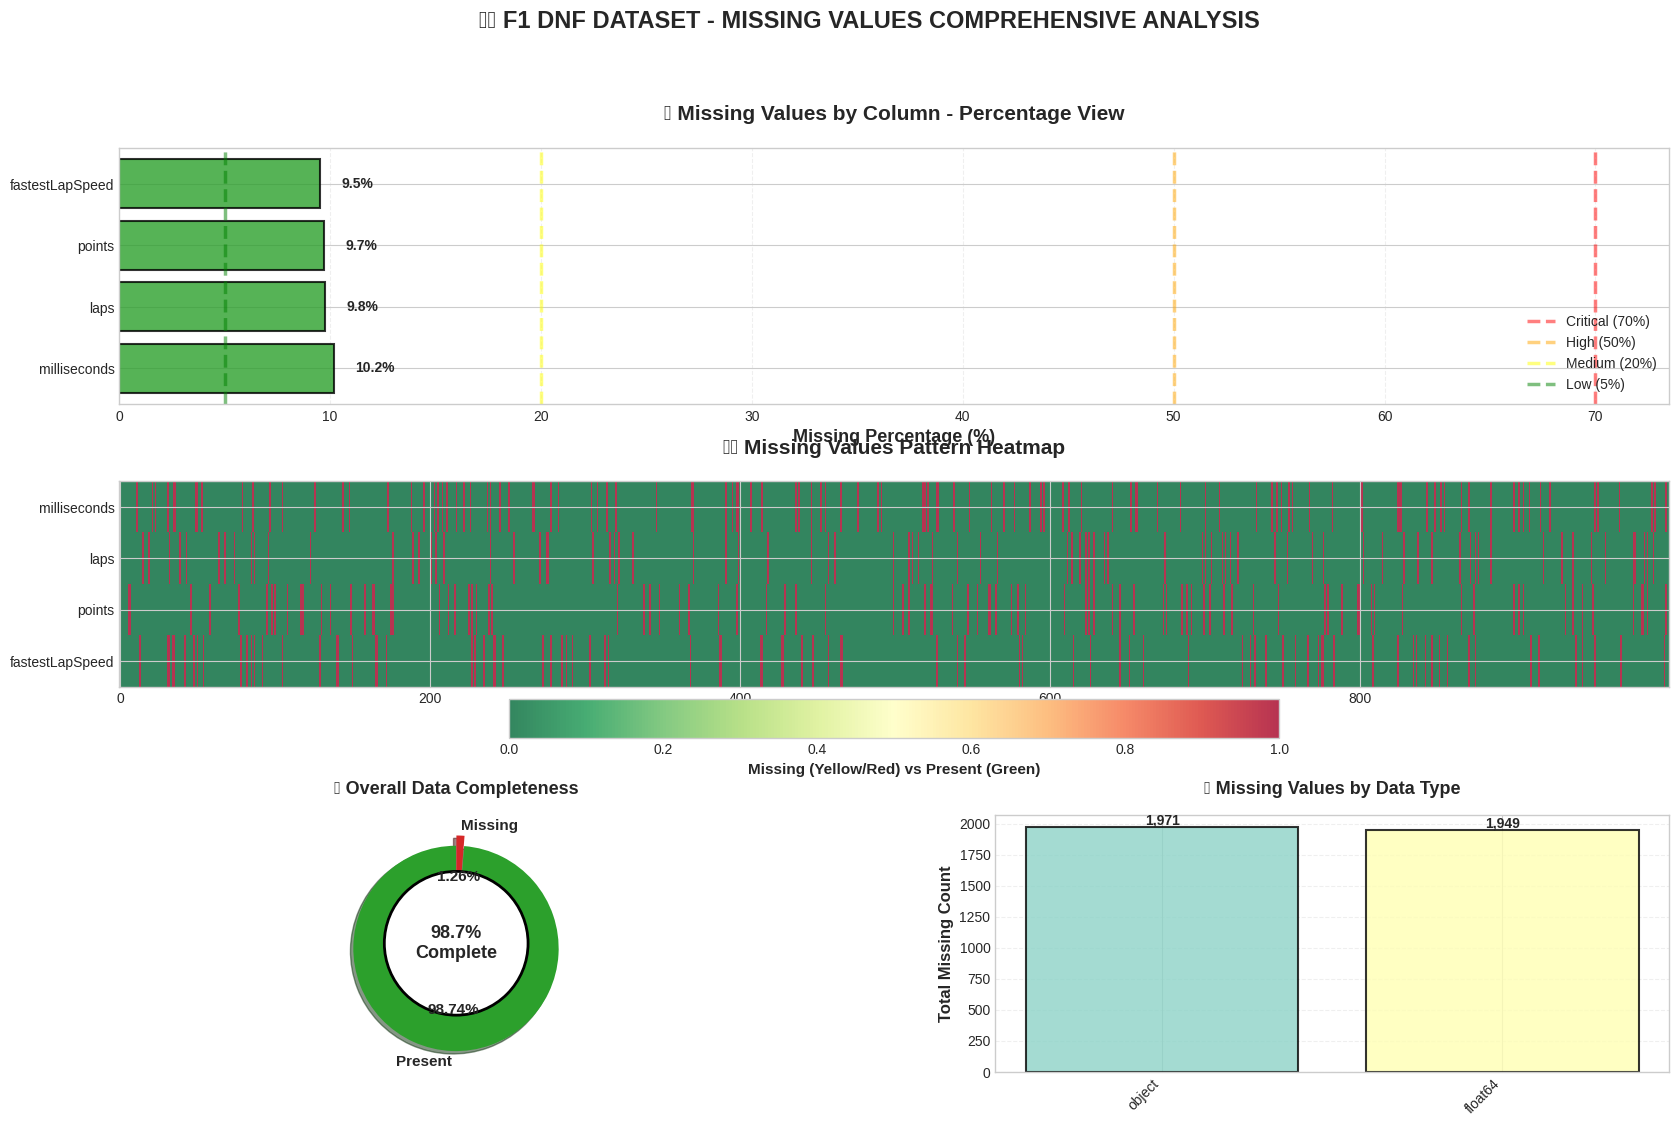


💡 MISSING VALUES INSIGHTS

📊 OVERALL STATISTICS:
   • Total Data Points  : 310,000
   • Missing Values     : 3,920
   • Data Completeness  : 98.74%
   • Columns Affected   : 4 out of 31

🔍 INTERPRETATION:
   ✅ Dataset is highly complete (>95%)
   ➜ Missing values are manageable

🏎️ F1 CONTEXT - Missing Values Meaning:
   • milliseconds missing → Race not completed (DNF!)
   • points missing → Finished outside points positions

   ➜ Some missing values are INFORMATIVE, not just noise!


In [ ]:
# Visualisasi Missing Values
if len(missing_data) > 0:

    # Create figure with subplots
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

    # 1. Bar Chart - Missing Percentage
    ax1 = fig.add_subplot(gs[0, :])

    colors = ['#d62728' if x > 70 else '#ff7f0e' if x > 50 else '#ffdd57'
              if x > 20 else '#2ca02c' if x > 5 else '#9edae5'
              for x in missing_data['Missing_Percentage']]

    bars = ax1.barh(range(len(missing_data)), missing_data['Missing_Percentage'],
                    color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

    ax1.set_yticks(range(len(missing_data)))
    ax1.set_yticklabels(missing_data['Column'])
    ax1.set_xlabel('Missing Percentage (%)', fontsize=13, fontweight='bold')
    ax1.set_title('🔍 Missing Values by Column - Percentage View',
                  fontsize=15, fontweight='bold', pad=20)
    ax1.grid(axis='x', alpha=0.3, linestyle='--')

    # Add percentage labels
    for i, v in enumerate(missing_data['Missing_Percentage']):
        ax1.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=10)

    # Add severity lines
    ax1.axvline(x=70, color='red', linestyle='--', alpha=0.5, linewidth=2.5, label='Critical (70%)')
    ax1.axvline(x=50, color='orange', linestyle='--', alpha=0.5, linewidth=2.5, label='High (50%)')
    ax1.axvline(x=20, color='yellow', linestyle='--', alpha=0.5, linewidth=2.5, label='Medium (20%)')
    ax1.axvline(x=5, color='green', linestyle='--', alpha=0.5, linewidth=2.5, label='Low (5%)')
    ax1.legend(loc='lower right', fontsize=10)

    # 2. Heatmap - Missing Pattern
    ax2 = fig.add_subplot(gs[1, :])

    # Sample data untuk heatmap (max 1000 rows untuk performance)
    sample_size = min(1000, len(df))
    missing_mask = df[missing_data['Column']].head(sample_size).isnull().T.astype(int)

    im = ax2.imshow(missing_mask, aspect='auto', cmap='RdYlGn_r',
                    interpolation='nearest', alpha=0.8)

    ax2.set_yticks(range(len(missing_data)))
    ax2.set_yticklabels(missing_data['Column'])
    ax2.set_xlabel(f'Record Index (First {sample_size} records)',
                   fontsize=12, fontweight='bold')
    ax2.set_title('🗺️ Missing Values Pattern Heatmap',
                  fontsize=15, fontweight='bold', pad=20)

    # Colorbar
    cbar = plt.colorbar(im, ax=ax2, orientation='horizontal', pad=0.05)
    cbar.set_label('Missing (Yellow/Red) vs Present (Green)',
                   fontweight='bold', fontsize=11)

    # 3. Pie Chart - Overall Missing Rate
    ax3 = fig.add_subplot(gs[2, 0])

    total_cells = len(df) * len(df.columns)
    total_missing = df.isnull().sum().sum()
    total_present = total_cells - total_missing

    colors_pie = ['#2ca02c', '#d62728']
    explode = (0.05, 0.05)

    wedges, texts, autotexts = ax3.pie([total_present, total_missing],
                                        labels=['Present', 'Missing'],
                                        autopct='%1.2f%%',
                                        colors=colors_pie,
                                        explode=explode,
                                        shadow=True,
                                        startangle=90,
                                        textprops={'fontweight': 'bold', 'fontsize': 11})

    ax3.set_title('📊 Overall Data Completeness', fontsize=13, fontweight='bold', pad=15)

    # Center text
    centre_circle = plt.Circle((0, 0), 0.70, fc='white', linewidth=2, edgecolor='black')
    ax3.add_artist(centre_circle)
    ax3.text(0, 0, f'{(total_present/total_cells)*100:.1f}%\nComplete',
             ha='center', va='center', fontsize=13, fontweight='bold')

    # 4. Missing Count by Column Type
    ax4 = fig.add_subplot(gs[2, 1])

    missing_by_type = missing_data.groupby('Data_Type')['Missing_Count'].sum().sort_values(ascending=False)

    colors_type = plt.cm.Set3(range(len(missing_by_type)))
    bars = ax4.bar(range(len(missing_by_type)), missing_by_type.values,
                   color=colors_type, edgecolor='black', linewidth=1.5, alpha=0.8)

    ax4.set_xticks(range(len(missing_by_type)))
    ax4.set_xticklabels(missing_by_type.index, rotation=45, ha='right')
    ax4.set_ylabel('Total Missing Count', fontsize=12, fontweight='bold')
    ax4.set_title('📈 Missing Values by Data Type', fontsize=13, fontweight='bold', pad=15)
    ax4.grid(axis='y', alpha=0.3, linestyle='--')

    # Add count labels
    for bar, count in zip(bars, missing_by_type.values):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count):,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

    plt.suptitle('🏎️ F1 DNF DATASET - MISSING VALUES COMPREHENSIVE ANALYSIS',
                 fontsize=17, fontweight='bold', y=0.995)
    plt.show()

    # Missing values insights
    print("\n" + "="*70)
    print("💡 MISSING VALUES INSIGHTS")
    print("="*70)

    print(f"\n📊 OVERALL STATISTICS:")
    print(f"   • Total Data Points  : {total_cells:,}")
    print(f"   • Missing Values     : {total_missing:,}")
    print(f"   • Data Completeness  : {(total_present/total_cells)*100:.2f}%")
    print(f"   • Columns Affected   : {len(missing_data)} out of {len(df.columns)}")

    print(f"\n🔍 INTERPRETATION:")
    if (total_present/total_cells)*100 > 95:
        print("   ✅ Dataset is highly complete (>95%)")
        print("   ➜ Missing values are manageable")
    elif (total_present/total_cells)*100 > 85:
        print("   ⚠️ Dataset has some missing values (85-95%)")
        print("   ➜ Need careful imputation strategy")
    else:
        print("   ❌ Dataset has significant missing values (<85%)")
        print("   ➜ May need to drop columns or extensive cleaning")

    # F1-specific context
    print(f"\n🏎️ F1 CONTEXT - Missing Values Meaning:")
    if 'fastestLapTime' in missing_data['Column'].values:
        print("   • fastestLapTime missing → Driver may have DNF'd")
    if 'milliseconds' in missing_data['Column'].values:
        print("   • milliseconds missing → Race not completed (DNF!)")
    if 'points' in missing_data['Column'].values:
        print("   • points missing → Finished outside points positions")

    print("\n   ➜ Some missing values are INFORMATIVE, not just noise!")

else:
    print("\n🎉 This dataset is PRISTINE - no missing values to visualize!")

# 🎯 Target Variable Analysis - The Main Event!

In [ ]:
# ============================================================
# TARGET VARIABLE: DNF vs FINISH ANALYSIS
# ============================================================

print("🏁 " + "="*70)
print("   🎯 TARGET VARIABLE DEEP DIVE: Did Not Finish (DNF)")
print("🏁 " + "="*70)

# Verify target exists
if 'target_finish' not in df.columns:
    print("\n❌ ERROR: 'target_finish' column not found!")
    print("Available columns:", df.columns.tolist())
else:
    # Calculate distribution
    target_counts = df['target_finish'].value_counts().sort_index()
    target_pct = (df['target_finish'].value_counts(normalize=True).sort_index() * 100)

    print("\n📊 TARGET DISTRIBUTION:")
    print(f"   {'Status':<15} {'Count':>10} {'Percentage':>12}")
    print(f"   {'-'*40}")
    print(f"   {'DNF (0)':<15} {target_counts.get(0, 0):>10,} {target_pct.get(0, 0):>11.2f}%")
    print(f"   {'Finished (1)':<15} {target_counts.get(1, 0):>10,} {target_pct.get(1, 0):>11.2f}%")
    print(f"   {'-'*40}")
    print(f"   {'TOTAL':<15} {len(df):>10,} {100.00:>11.2f}%")

    # Class balance assessment
    if len(target_counts) >= 2:
        ratio = target_counts.get(1, 1) / target_counts.get(0, 1)
        print(f"\n⚖️ CLASS BALANCE ANALYSIS:")
        print(f"   Finish : DNF Ratio = {ratio:.3f} : 1")

        imbalance_degree = abs(ratio - 1)

        if imbalance_degree < 0.2:
            balance_status = "✅ PERFECTLY BALANCED"
            balance_color = "#2ca02c"
            recommendation = "No balancing needed!"
        elif imbalance_degree < 0.5:
            balance_status = "✅ WELL BALANCED"
            balance_color = "#17becf"
            recommendation = "Slight imbalance, but acceptable for most models"
        elif imbalance_degree < 1.0:
            balance_status = "⚠️ MODERATELY IMBALANCED"
            balance_color = "#ff7f0e"
            recommendation = "Consider using stratified sampling or class weights"
        else:
            balance_status = "❌ HIGHLY IMBALANCED"
            balance_color = "#d62728"
            recommendation = "Use SMOTE, ADASYN, or class weights for balancing"

        print(f"   Status: {balance_status}")
        print(f"   Recommendation: {recommendation}")

        # DNF Rate
        dnf_rate = target_pct.get(0, 0)
        finish_rate = target_pct.get(1, 0)

        print(f"\n📉 KEY RATES:")
        print(f"   DNF Rate     : {dnf_rate:.2f}%")
        print(f"   Finish Rate  : {finish_rate:.2f}%")
        print(f"\n💡 This means:")
        print(f"   → {int(dnf_rate)} out of every 100 F1 races end in DNF")
        print(f"   → {int(finish_rate)} out of every 100 F1 races are completed")

🏁 ======================================================================
   🎯 TARGET VARIABLE DEEP DIVE: Did Not Finish (DNF)
🏁 ======================================================================

📊 TARGET DISTRIBUTION:
   Status               Count   Percentage
   ----------------------------------------
   DNF (0)              7,105       71.05%
   Finished (1)         2,895       28.95%
   ----------------------------------------
   TOTAL               10,000      100.00%

⚖️ CLASS BALANCE ANALYSIS:
   Finish : DNF Ratio = 0.407 : 1
   Status: ⚠️ MODERATELY IMBALANCED
   Recommendation: Consider using stratified sampling or class weights

📉 KEY RATES:
   DNF Rate     : 71.05%
   Finish Rate  : 28.95%

💡 This means:
   → 71 out of every 100 F1 races end in DNF
   → 28 out of every 100 F1 races are completed


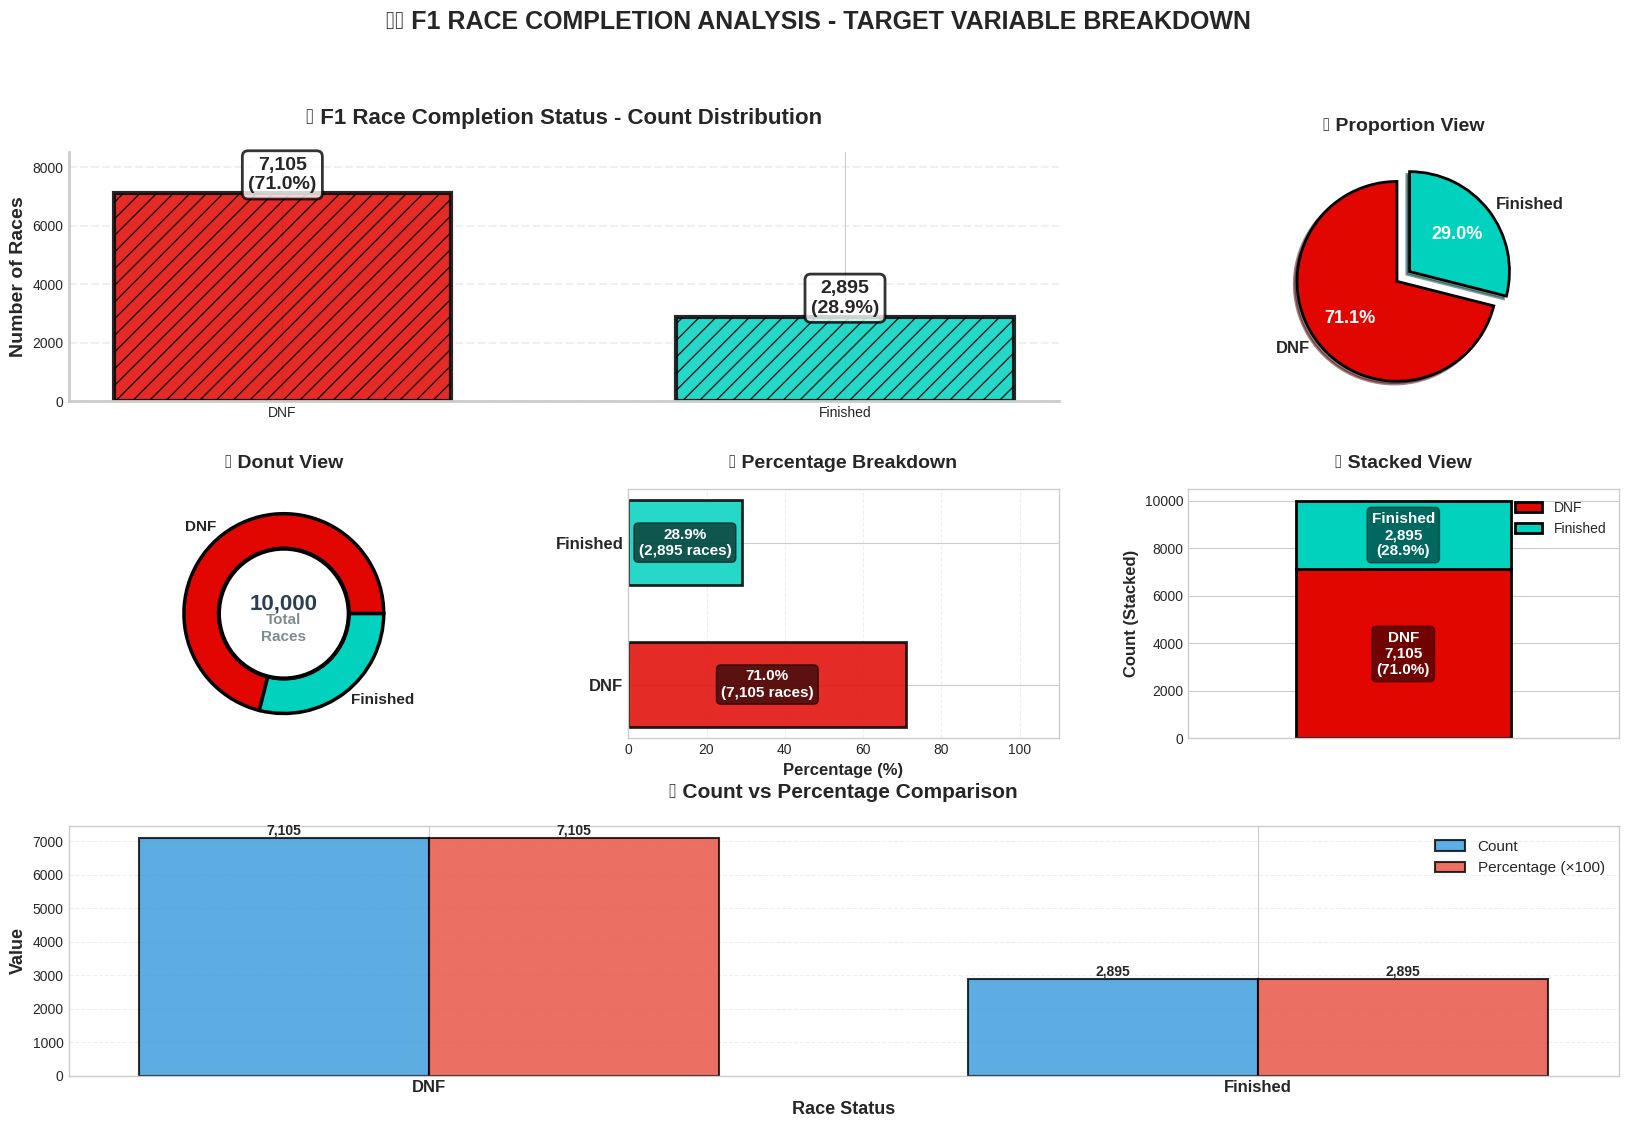

In [ ]:
# Comprehensive Visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

colors_target = ['#e10600', '#00d2be']  # F1 Red & Teal
labels_target = ['DNF', 'Finished']

# 1. Count Bar Plot (Large)
ax1 = fig.add_subplot(gs[0, :2])

bars = ax1.bar(labels_target, target_counts.values,
               color=colors_target, edgecolor='black', linewidth=3, alpha=0.85, width=0.6)

# Gradient effect on bars
for bar, color in zip(bars, colors_target):
    bar.set_hatch('//')

# Add count labels
for bar, count, pct in zip(bars, target_counts.values, target_pct.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}\n({pct:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=14,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='black', linewidth=2))

ax1.set_ylabel('Number of Races', fontsize=14, fontweight='bold')
ax1.set_title('🏁 F1 Race Completion Status - Count Distribution',
              fontsize=16, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1.5)
ax1.set_ylim(0, max(target_counts.values) * 1.2)

# Styling
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)

# 2. Pie Chart with Explosion
ax2 = fig.add_subplot(gs[0, 2])

explode = (0.08, 0.08)
wedges, texts, autotexts = ax2.pie(target_counts.values,
                                     labels=labels_target,
                                     autopct='%1.1f%%',
                                     colors=colors_target,
                                     explode=explode,
                                     shadow=True,
                                     startangle=90,
                                     textprops={'fontweight': 'bold', 'fontsize': 12},
                                     wedgeprops={'edgecolor': 'black', 'linewidth': 2})

# Enhance autopct text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)

ax2.set_title('🎯 Proportion View', fontsize=14, fontweight='bold', pad=15)

# 3. Donut Chart with Center Info
ax3 = fig.add_subplot(gs[1, 0])

size = 0.35
vals = target_counts.values

# Outer ring
outer_colors = colors_target
ax3.pie(vals, labels=labels_target, colors=outer_colors,
        radius=1, wedgeprops=dict(width=size, edgecolor='black', linewidth=2.5),
        textprops={'fontweight': 'bold', 'fontsize': 11})

# Inner white circle
centre_circle = plt.Circle((0, 0), 1-size, fc='white', linewidth=3, edgecolor='black')
ax3.add_artist(centre_circle)

# Center text
ax3.text(0, 0.1, f'{len(df):,}', ha='center', va='center',
         fontsize=16, fontweight='bold', color='#2c3e50')
ax3.text(0, -0.15, 'Total\nRaces', ha='center', va='center',
         fontsize=11, fontweight='bold', color='#7f8c8d')

ax3.set_title('📊 Donut View', fontsize=14, fontweight='bold', pad=15)

# 4. Horizontal Bar with Percentage
ax4 = fig.add_subplot(gs[1, 1])

y_pos = [0, 1]
bars_h = ax4.barh(y_pos, target_pct.values, color=colors_target,
                  edgecolor='black', linewidth=2, alpha=0.85, height=0.6)

# Add percentage labels
for i, (bar, pct, count) in enumerate(zip(bars_h, target_pct.values, target_counts.values)):
    width = bar.get_width()
    ax4.text(width/2, bar.get_y() + bar.get_height()/2.,
             f'{pct:.1f}%\n({count:,} races)',
             ha='center', va='center', fontweight='bold', fontsize=11, color='white',
             bbox=dict(boxstyle='round', facecolor='black', alpha=0.6))

ax4.set_yticks(y_pos)
ax4.set_yticklabels(labels_target, fontsize=12, fontweight='bold')
ax4.set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
ax4.set_title('📈 Percentage Breakdown', fontsize=14, fontweight='bold', pad=15)
ax4.grid(axis='x', alpha=0.3, linestyle='--')
ax4.set_xlim(0, 110)

# 5. Stacked Bar - Visual Proportion
ax5 = fig.add_subplot(gs[1, 2])

bottom = 0
for i, (label, val, color) in enumerate(zip(labels_target, target_counts.values, colors_target)):
    ax5.bar(0, val, bottom=bottom, color=color, edgecolor='black',
            linewidth=2, label=label, width=0.5)

    # Add text in middle of segment
    text_y = bottom + val/2
    ax5.text(0, text_y, f'{label}\n{val:,}\n({target_pct.values[i]:.1f}%)',
             ha='center', va='center', fontweight='bold', fontsize=11,
             color='white',
             bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))

    bottom += val

ax5.set_xlim(-0.5, 0.5)
ax5.set_xticks([])
ax5.set_ylabel('Count (Stacked)', fontsize=12, fontweight='bold')
ax5.set_title('📊 Stacked View', fontsize=14, fontweight='bold', pad=15)
ax5.legend(loc='upper right', fontsize=10)

# 6. Comparison Bar Chart
ax6 = fig.add_subplot(gs[2, :])

categories = ['DNF', 'Finished']
x = np.arange(len(categories))
width = 0.35

# Create comparison metrics
metrics = {
    'Count': target_counts.values,
    'Percentage': target_pct.values
}

# Plot grouped bars
bar1 = ax6.bar(x - width/2, metrics['Count'], width, label='Count',
               color='#3498db', edgecolor='black', linewidth=1.5, alpha=0.8)
bar2 = ax6.bar(x + width/2, metrics['Percentage']*100, width, label='Percentage (×100)',
               color='#e74c3c', edgecolor='black', linewidth=1.5, alpha=0.8)

# Add labels
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax6.set_xlabel('Race Status', fontsize=13, fontweight='bold')
ax6.set_ylabel('Value', fontsize=13, fontweight='bold')
ax6.set_title('📊 Count vs Percentage Comparison', fontsize=15, fontweight='bold', pad=20)
ax6.set_xticks(x)
ax6.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax6.legend(fontsize=11, loc='upper right')
ax6.grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle('🏎️ F1 RACE COMPLETION ANALYSIS - TARGET VARIABLE BREAKDOWN',
             fontsize=18, fontweight='bold', y=0.998)
plt.show()

In [ ]:
# Key Insights Summary
print("\n" + "="*70)
print("💡 KEY INSIGHTS - TARGET VARIABLE")
print("="*70)

insights_text = f"""
1. 🏁 RACE COMPLETION STATISTICS:
   • Finished Rate : {finish_rate:.2f}% of all races completed successfully
   • DNF Rate      : {dnf_rate:.2f}% of races end without finishing

   📌 Context: In F1, a DNF rate of ~{int(dnf_rate)}% is {"quite high" if dnf_rate > 30 else "moderate" if dnf_rate > 15 else "relatively low"}
   → This reflects the extreme demands of F1 racing!

2. ⚖️ CLASS BALANCE STATUS: {balance_status}
   • Finish:DNF = {ratio:.2f}:1
   • Imbalance Degree: {imbalance_degree:.2f}

   📌 Modeling Impact:
   {"→ Classes are well-balanced, standard algorithms will work well" if imbalance_degree < 0.5 else "→ Need to address imbalance: use SMOTE, class weights, or stratified sampling"}

3. 🎯 PREDICTION TASK:
   • Type: BINARY CLASSIFICATION
   • Classes: 0 (DNF) vs 1 (Finished)
   • Baseline Accuracy: {max(finish_rate, dnf_rate):.2f}% (predict majority class)

   📌 Our model should beat {max(finish_rate, dnf_rate):.2f}% to be useful!

4. 🏎️ F1 RACING CONTEXT:
   • DNF in F1 means: Mechanical failure, crash, disqualification, or other issues
   • One DNF can cost a driver/team the championship
   • Reliability is as important as speed in modern F1

   📌 Predicting DNF helps teams with:
   → Component reliability testing
   → Race strategy decisions
   → Risk assessment for pushing the car

5. 📊 STATISTICAL CONSIDERATIONS:
   • Sample Size: {len(df):,} races ({"excellent" if len(df) > 5000 else "good" if len(df) > 1000 else "moderate"} for modeling)
   • Evaluation Metrics to use:
     ✓ Accuracy (overall correctness)
     ✓ Precision (avoid false DNF predictions)
     ✓ Recall (catch actual DNFs)
     ✓ F1-Score (balance precision & recall)
     ✓ ROC-AUC (overall discrimination ability)

   📌 In F1 context, Recall might be more important (catch potential DNFs!)
"""

print(insights_text)


💡 KEY INSIGHTS - TARGET VARIABLE

1. 🏁 RACE COMPLETION STATISTICS:
   • Finished Rate : 28.95% of all races completed successfully
   • DNF Rate      : 71.05% of races end without finishing
   
   📌 Context: In F1, a DNF rate of ~71% is quite high
   → This reflects the extreme demands of F1 racing!

2. ⚖️ CLASS BALANCE STATUS: ⚠️ MODERATELY IMBALANCED
   • Finish:DNF = 0.41:1
   • Imbalance Degree: 0.59
   
   📌 Modeling Impact:
   → Need to address imbalance: use SMOTE, class weights, or stratified sampling

3. 🎯 PREDICTION TASK:
   • Type: BINARY CLASSIFICATION
   • Classes: 0 (DNF) vs 1 (Finished)
   • Baseline Accuracy: 71.05% (predict majority class)
   
   📌 Our model should beat 71.05% to be useful!

4. 🏎️ F1 RACING CONTEXT:
   • DNF in F1 means: Mechanical failure, crash, disqualification, or other issues
   • One DNF can cost a driver/team the championship
   • Reliability is as important as speed in modern F1
   
   📌 Predicting DNF helps teams with:
   → Component reliabil

# 📈 Univariate Analysis - Individual Feature Deep Dive

## a. Numerical Features Distribution

🏁 ======================================================================
   📊 NUMERICAL FEATURES DISTRIBUTION ANALYSIS
🏁 ======================================================================

Analyzing 6 numerical features...


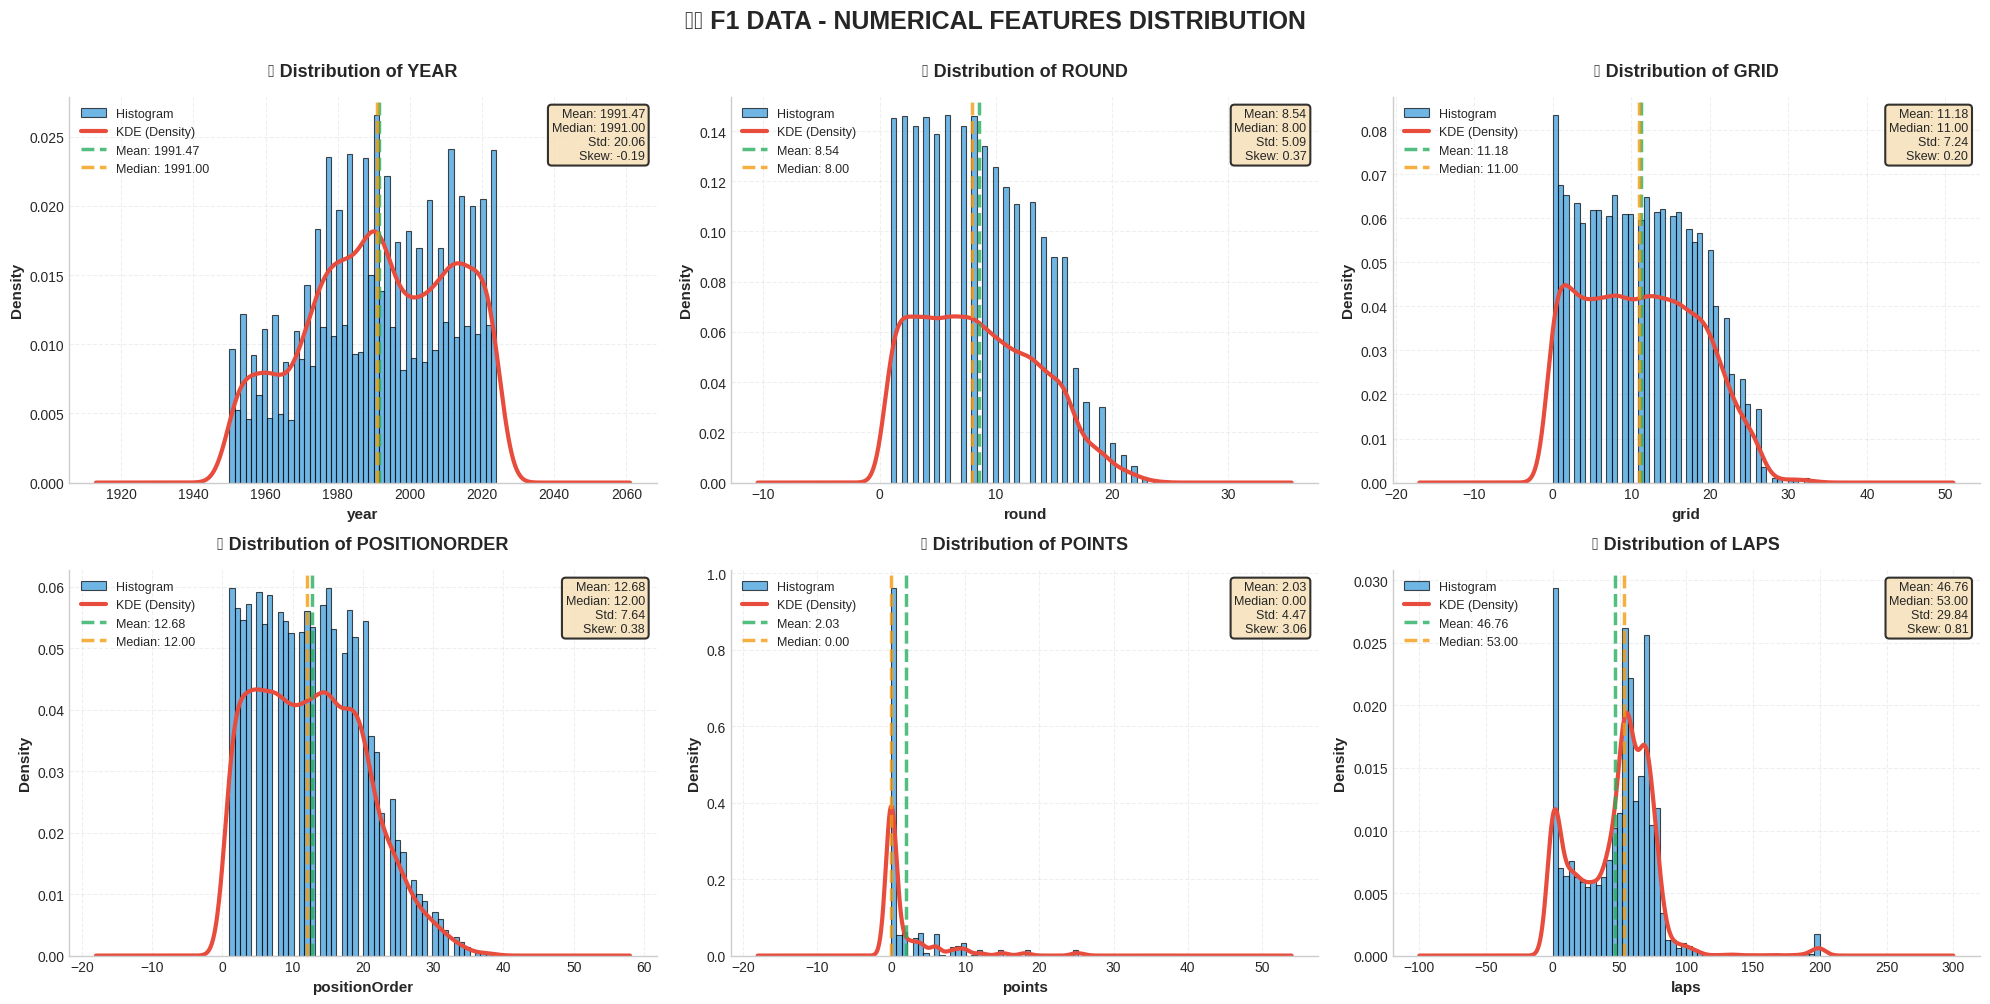

In [ ]:
# ============================================================
# NUMERICAL FEATURES - DISTRIBUTION ANALYSIS
# ============================================================

print("🏁 " + "="*70)
print("   📊 NUMERICAL FEATURES DISTRIBUTION ANALYSIS")
print("🏁 " + "="*70)

# Select key numerical features
numerical_features = ['year', 'round', 'grid', 'positionOrder', 'points', 'laps']

# Filter yang ada di dataset
numerical_features = [col for col in numerical_features if col in df.columns]

print(f"\nAnalyzing {len(numerical_features)} numerical features...")

# Create comprehensive distribution plots
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*5))
axes = axes.ravel() if n_features > 1 else [axes]

for idx, col in enumerate(numerical_features):
    data = df[col].dropna()

    # Calculate statistics
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()

    # Create histogram with KDE
    axes[idx].hist(data, bins=50, alpha=0.7, color='#3498db',
                   edgecolor='black', linewidth=0.8, density=True, label='Histogram')

    # KDE overlay
    data.plot(kind='kde', ax=axes[idx], color='#e74c3c',
              linewidth=3, label='KDE (Density)')

    # Add mean and median lines
    axes[idx].axvline(mean_val, color='#27ae60', linestyle='--',
                      linewidth=2.5, label=f'Mean: {mean_val:.2f}', alpha=0.8)
    axes[idx].axvline(median_val, color='#f39c12', linestyle='--',
                      linewidth=2.5, label=f'Median: {median_val:.2f}', alpha=0.8)

    # Title and labels
    axes[idx].set_title(f'📊 Distribution of {col.upper()}',
                        fontsize=13, fontweight='bold', pad=15)
    axes[idx].set_xlabel(col, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Density', fontsize=11, fontweight='bold')
    axes[idx].legend(loc='best', fontsize=9, framealpha=0.9)
    axes[idx].grid(alpha=0.3, linestyle='--', linewidth=0.8)

    # Add text box with statistics
    stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd: {std_val:.2f}\nSkew: {data.skew():.2f}'
    axes[idx].text(0.98, 0.97, stats_text,
                   transform=axes[idx].transAxes,
                   fontsize=9, verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8, edgecolor='black', linewidth=1.5))

    # Styling
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)

# Remove empty subplots
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('🏎️ F1 DATA - NUMERICAL FEATURES DISTRIBUTION',
             fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [ ]:
# Distribution Statistics & Interpretation
print("\n" + "="*70)
print("🔍 DISTRIBUTION STATISTICS & INTERPRETATION")
print("="*70)

for col in numerical_features:
    data = df[col].dropna()

    # Calculate statistics
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    skewness = data.skew()
    kurtosis = data.kurtosis()

    print(f"\n{'='*70}")
    print(f"📊 {col.upper()}")
    print(f"{'='*70}")

    print(f"  📈 Central Tendency:")
    print(f"     • Mean        : {mean_val:10.2f}")
    print(f"     • Median      : {median_val:10.2f}")
    print(f"     • Mode        : {data.mode().values[0] if len(data.mode()) > 0 else 'N/A'}")

    print(f"\n  📊 Dispersion:")
    print(f"     • Std Dev     : {std_val:10.2f}")
    print(f"     • Variance    : {std_val**2:10.2f}")
    print(f"     • Range       : {data.min():.2f} - {data.max():.2f}")
    print(f"     • IQR         : {data.quantile(0.75) - data.quantile(0.25):10.2f}")

    print(f"\n  📐 Shape:")
    print(f"     • Skewness    : {skewness:10.2f} ", end="")
    if abs(skewness) < 0.5:
        print("→ ✅ Fairly Symmetric")
    elif skewness > 0.5:
        print("→ ⚠️ Right-Skewed (long right tail)")
    else:
        print("→ ⚠️ Left-Skewed (long left tail)")

    print(f"     • Kurtosis    : {kurtosis:10.2f} ", end="")
    if abs(kurtosis) < 1:
        print("→ Normal tails (Mesokurtic)")
    elif kurtosis > 1:
        print("→ Heavy tails (Leptokurtic)")
    else:
        print("→ Light tails (Platykurtic)")

    # Practical interpretation
    print(f"\n  💡 Interpretation:")
    if col == 'year':
        print(f"     → Covers {int(data.max() - data.min())} years of F1 history")
        print(f"     → Data spans from {int(data.min())} to {int(data.max())}")
    elif col == 'grid':
        pole_pct = (data == 1).sum() / len(data) * 100
        print(f"     → {pole_pct:.1f}% races started from pole position")
        print(f"     → Average starting position: {mean_val:.1f}")
    elif col == 'positionOrder':
        print(f"     → Average finish position: {mean_val:.1f}")
        winners = (data == 1).sum()
        print(f"     → {winners} race wins in dataset")
    elif col == 'points':
        scored = (data > 0).sum()
        scored_pct = scored / len(data) * 100
        print(f"     → {scored_pct:.1f}% of results scored points")
        print(f"     → Average points when scored: {data[data > 0].mean():.2f}")
    elif col == 'laps':
        print(f"     → Average race length: ~{mean_val:.0f} laps")
        print(f"     → Typical range: {data.quantile(0.25):.0f} - {data.quantile(0.75):.0f} laps")


🔍 DISTRIBUTION STATISTICS & INTERPRETATION

📊 YEAR
  📈 Central Tendency:
     • Mean        :    1991.47
     • Median      :    1991.00
     • Mode        : 1989

  📊 Dispersion:
     • Std Dev     :      20.06
     • Variance    :     402.41
     • Range       : 1950.00 - 2024.00
     • IQR         :      32.00

  📐 Shape:
     • Skewness    :      -0.19 → ✅ Fairly Symmetric
     • Kurtosis    :      -0.93 → Normal tails (Mesokurtic)

  💡 Interpretation:
     → Covers 74 years of F1 history
     → Data spans from 1950 to 2024

📊 ROUND
  📈 Central Tendency:
     • Mean        :       8.54
     • Median      :       8.00
     • Mode        : 6

  📊 Dispersion:
     • Std Dev     :       5.09
     • Variance    :      25.86
     • Range       : 1.00 - 24.00
     • IQR         :       8.00

  📐 Shape:
     • Skewness    :       0.37 → ✅ Fairly Symmetric
     • Kurtosis    :      -0.73 → Normal tails (Mesokurtic)

  💡 Interpretation:

📊 GRID
  📈 Central Tendency:
     • Mean        :    

## b. Box Plots for Outlier Detection


🏁 ======================================================================
   📦 BOX PLOTS - OUTLIER DETECTION
🏁 ======================================================================


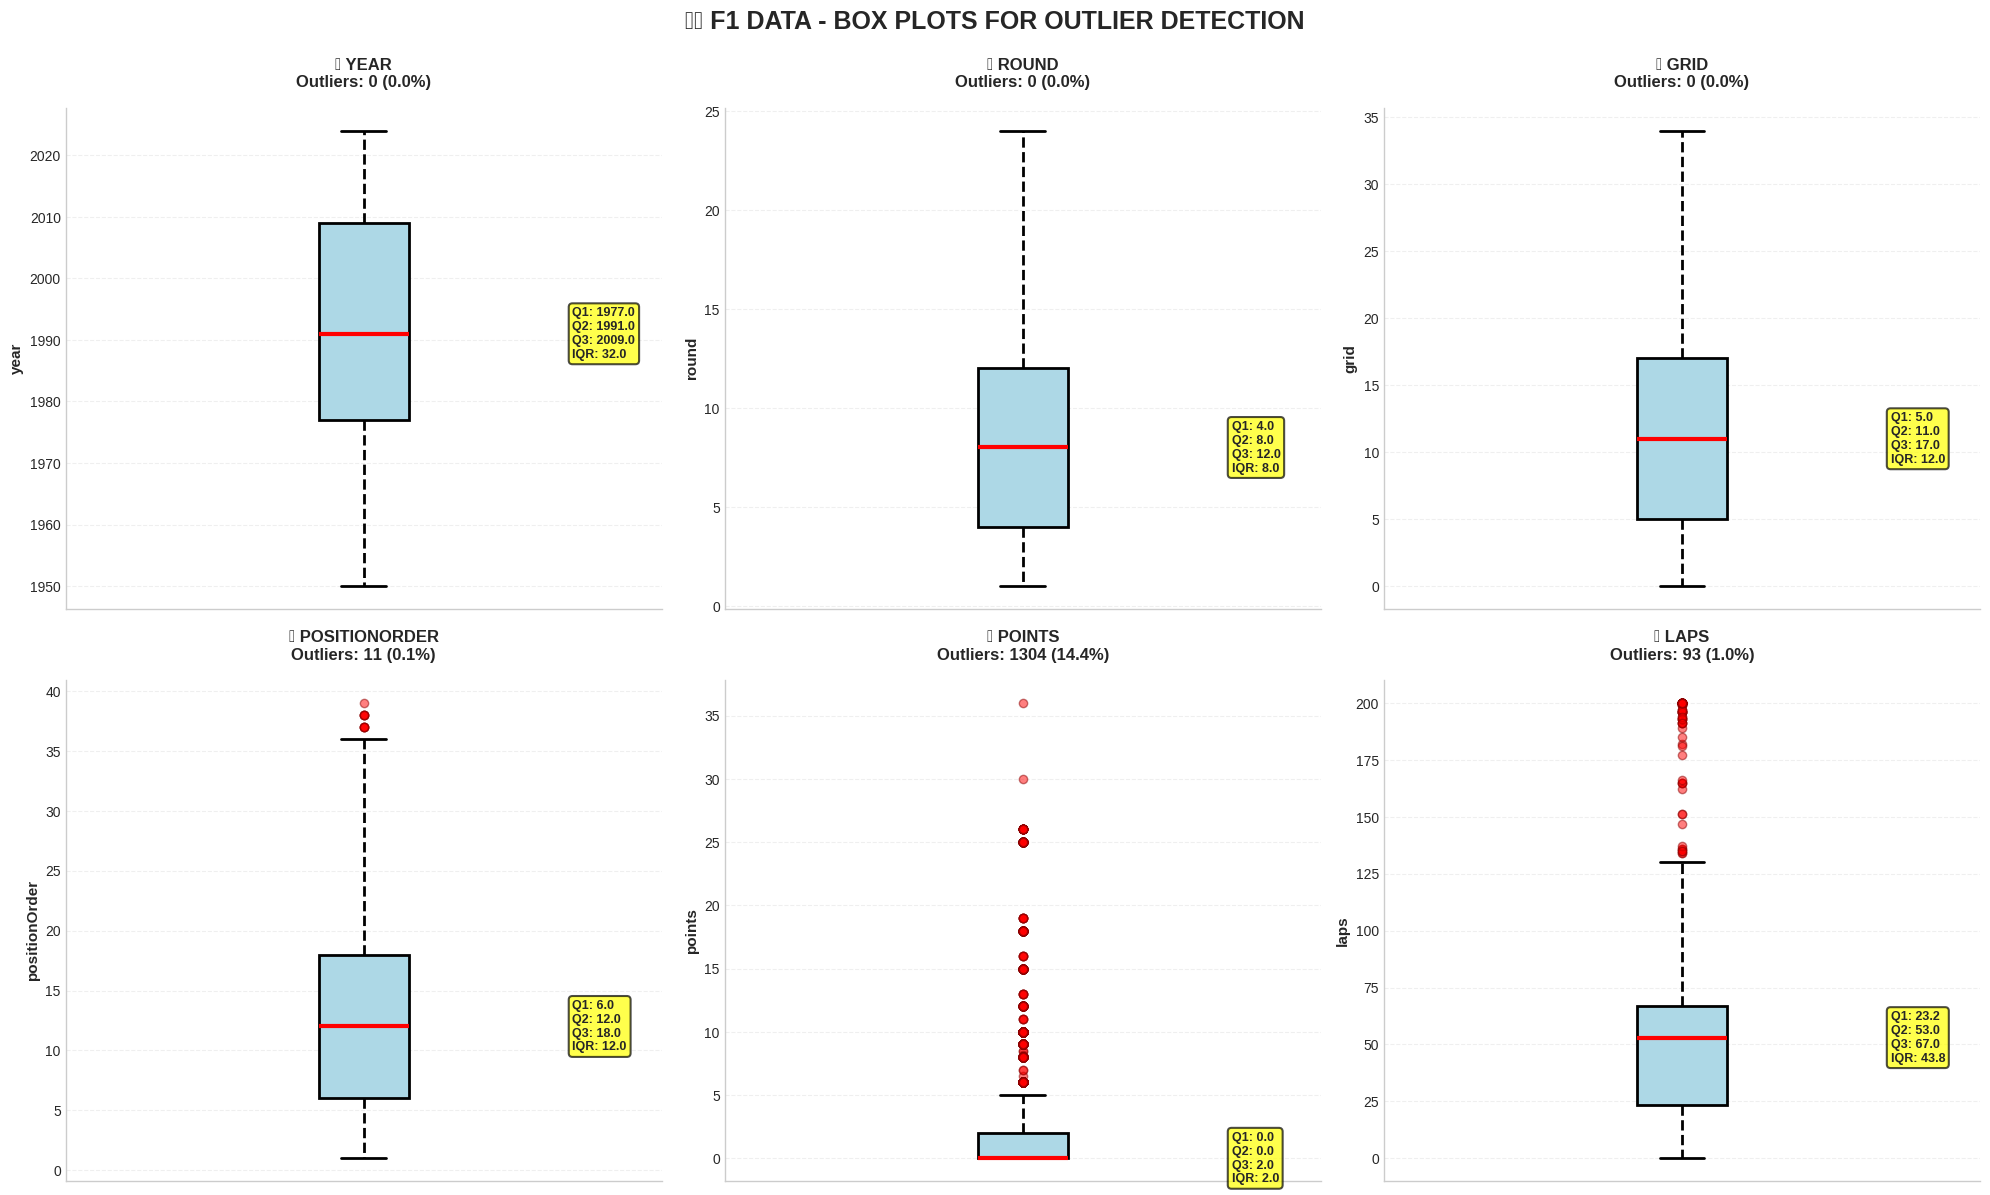

In [ ]:
# ============================================================
# BOX PLOTS - OUTLIER VISUALIZATION
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   📦 BOX PLOTS - OUTLIER DETECTION")
print("🏁 " + "="*70)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    if idx < len(axes):
        data = df[col].dropna()

        # Create box plot
        bp = axes[idx].boxplot(data, vert=True, patch_artist=True,
                               boxprops=dict(facecolor='lightblue', color='black', linewidth=2),
                               whiskerprops=dict(color='black', linewidth=2, linestyle='--'),
                               capprops=dict(color='black', linewidth=2),
                               medianprops=dict(color='red', linewidth=3),
                               flierprops=dict(marker='o', markerfacecolor='red',
                                             markersize=6, alpha=0.5, markeredgecolor='darkred'))

        # Calculate quartiles
        q1 = data.quantile(0.25)
        q2 = data.quantile(0.50)  # median
        q3 = data.quantile(0.75)
        iqr = q3 - q1

        # Calculate outlier bounds
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Count outliers
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        n_outliers = len(outliers)
        outlier_pct = (n_outliers / len(data)) * 100

        # Title with outlier info
        axes[idx].set_title(f'📦 {col.upper()}\nOutliers: {n_outliers} ({outlier_pct:.1f}%)',
                           fontsize=12, fontweight='bold', pad=15)
        axes[idx].set_ylabel(col, fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3, linestyle='--')

        # Add statistics annotations
        stats_text = f'Q1: {q1:.1f}\nQ2: {q2:.1f}\nQ3: {q3:.1f}\nIQR: {iqr:.1f}'
        axes[idx].text(1.35, q2, stats_text,
                      fontsize=9, va='center', fontweight='bold',
                      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7,
                               edgecolor='black', linewidth=1.5))

        # Styling
        axes[idx].set_xticks([])
        axes[idx].spines['top'].set_visible(False)
        axes[idx].spines['right'].set_visible(False)

# Remove empty subplots
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('🏎️ F1 DATA - BOX PLOTS FOR OUTLIER DETECTION',
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## c. Categorical Features Analysis


🏁 ======================================================================
   📝 CATEGORICAL FEATURES ANALYSIS
🏁 ======================================================================


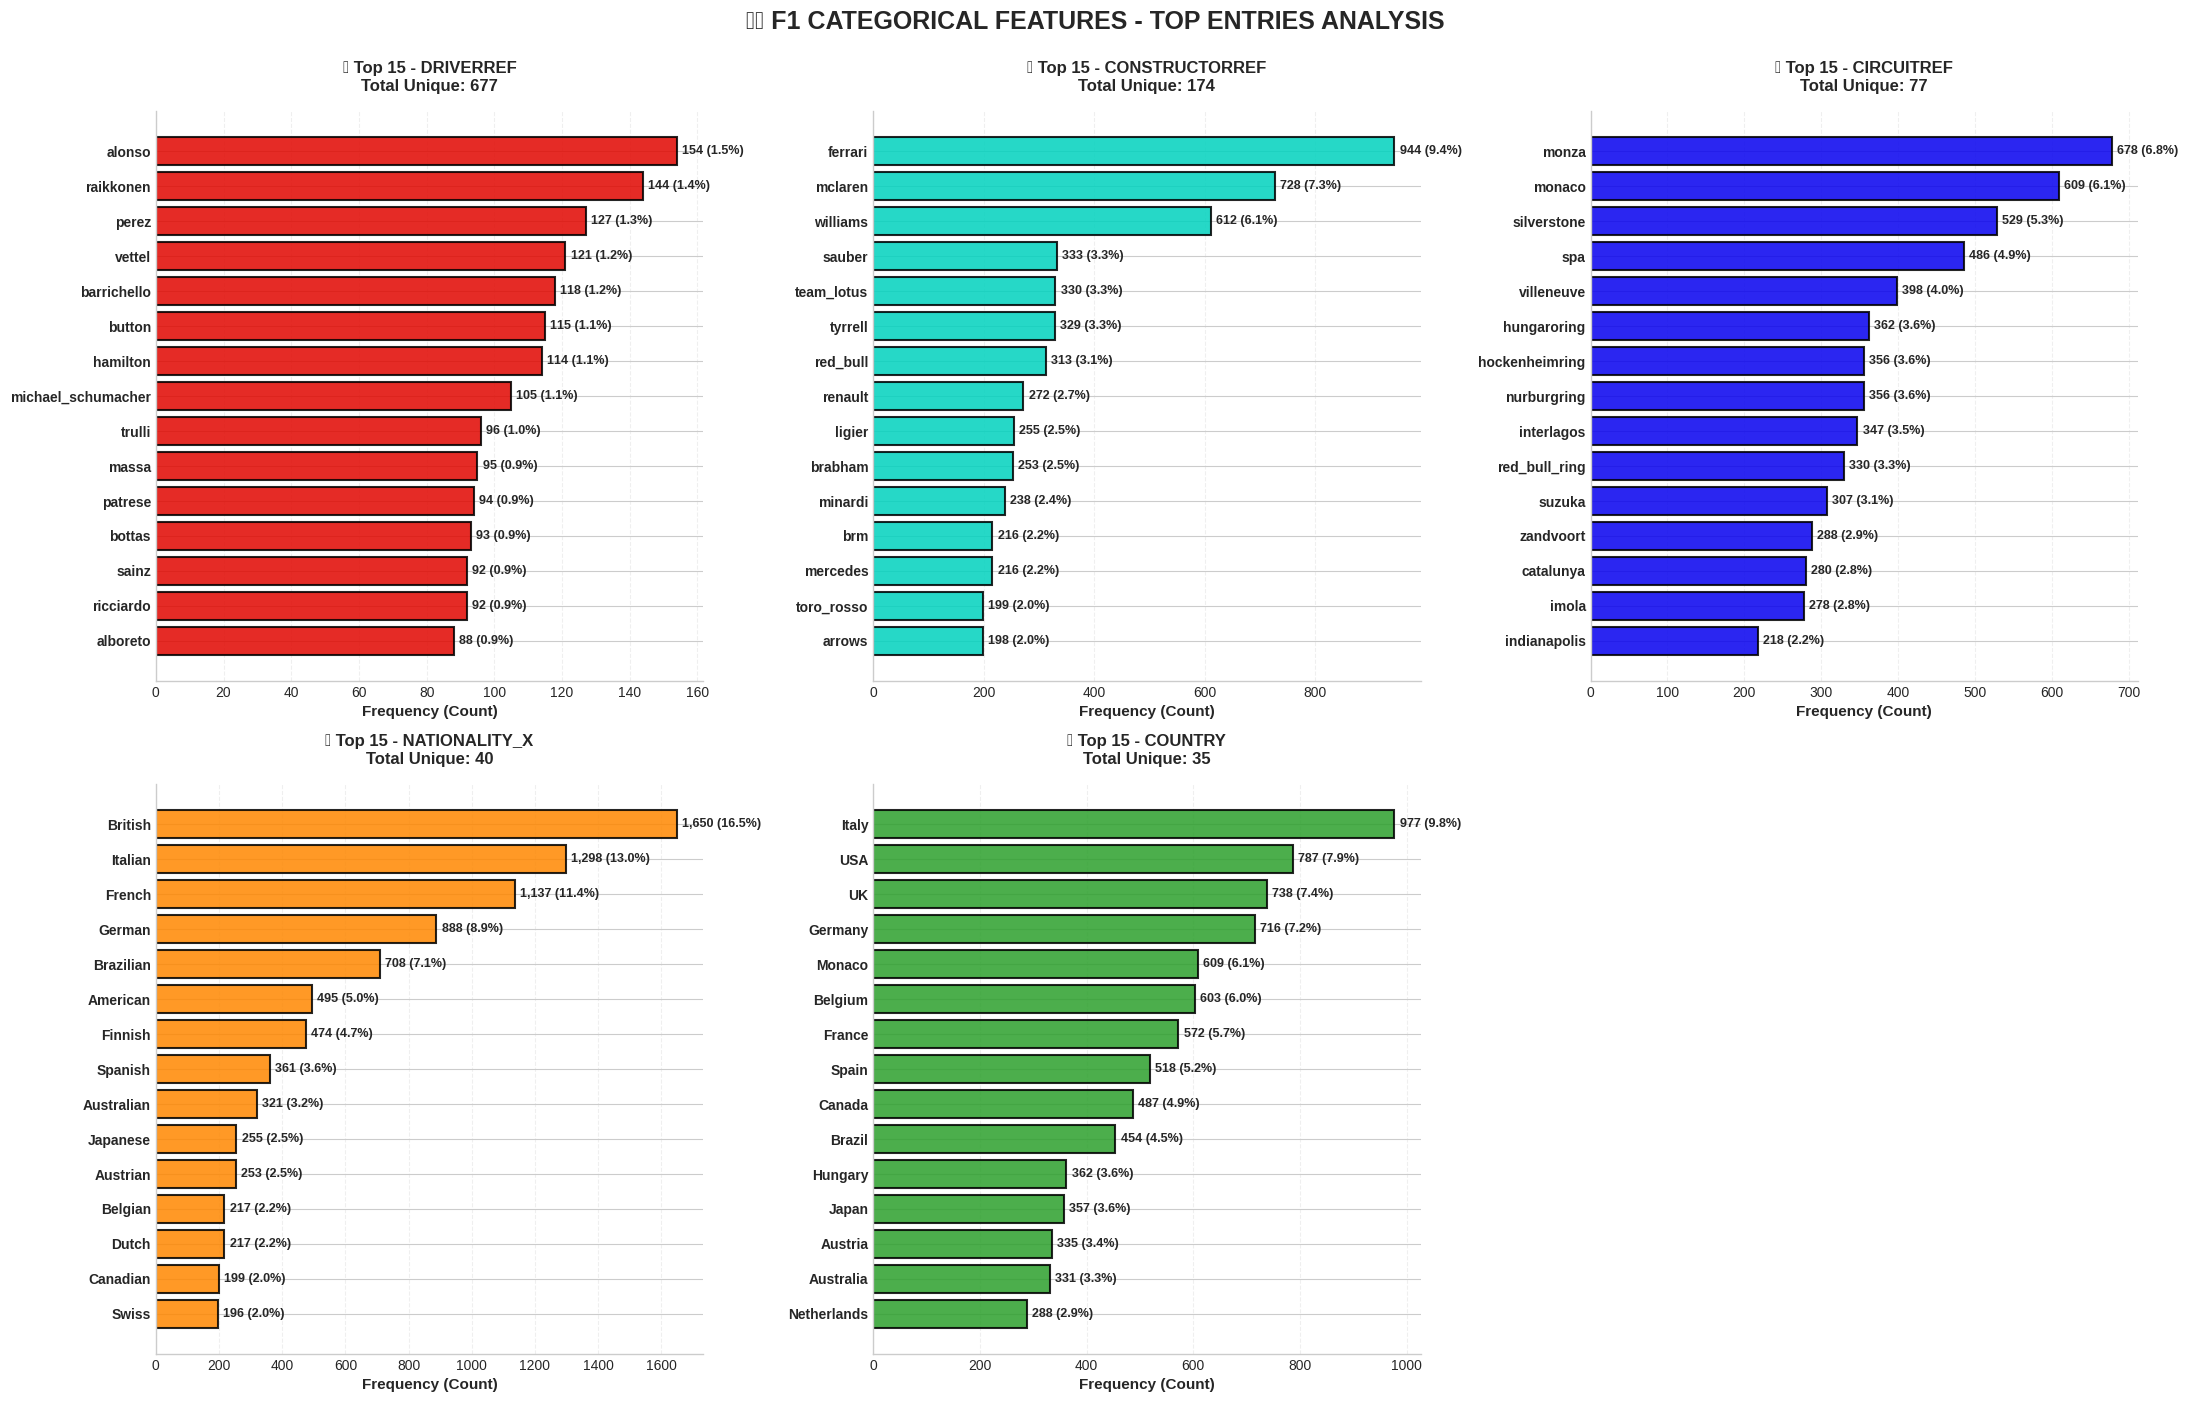

In [ ]:
# ============================================================
# CATEGORICAL FEATURES - FREQUENCY ANALYSIS
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   📝 CATEGORICAL FEATURES ANALYSIS")
print("🏁 " + "="*70)

# Key categorical features
categorical_features = ['driverRef', 'constructorRef', 'circuitRef', 'nationality_x', 'country']
categorical_features = [col for col in categorical_features if col in df.columns]

# Visualize top categories
fig, axes = plt.subplots(2, 3, figsize=(22, 14))
axes = axes.ravel()

colors_palette = ['#e10600', '#00d2be', '#0600ef', '#ff8700', '#2ca02c', '#9467bd']

for idx, col in enumerate(categorical_features):
    if idx < len(axes):
        # Get top 15 values
        top_values = df[col].value_counts().head(15)

        # Create horizontal bar chart
        y_pos = range(len(top_values))
        bars = axes[idx].barh(y_pos, top_values.values,
                             color=colors_palette[idx % len(colors_palette)],
                             edgecolor='black', linewidth=1.5, alpha=0.85)

        axes[idx].set_yticks(y_pos)
        axes[idx].set_yticklabels(top_values.index, fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Frequency (Count)', fontsize=11, fontweight='bold')
        axes[idx].set_title(f'🏁 Top 15 - {col.upper()}\nTotal Unique: {df[col].nunique()}',
                           fontsize=12, fontweight='bold', pad=15)
        axes[idx].grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)

        # Add value labels
        for i, (v, name) in enumerate(zip(top_values.values, top_values.index)):
            pct = (v / len(df)) * 100
            axes[idx].text(v + max(top_values.values)*0.01, i,
                          f'{v:,} ({pct:.1f}%)',
                          va='center', fontweight='bold', fontsize=9)

        # Styling
        axes[idx].spines['top'].set_visible(False)
        axes[idx].spines['right'].set_visible(False)
        axes[idx].invert_yaxis()  # Highest at top

# Remove empty subplot
for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('🏎️ F1 CATEGORICAL FEATURES - TOP ENTRIES ANALYSIS',
             fontsize=18, fontweight='bold', y=0.998)
plt.tight_layout()
plt.show()

In [ ]:
# Detailed statistics for categorical features
print("\n" + "="*70)
print("🔍 CATEGORICAL FEATURES DETAILED STATISTICS")
print("="*70)

for col in categorical_features:
    print(f"\n{'='*70}")
    print(f"📊 {col.upper()}")
    print(f"{'='*70}")

    value_counts = df[col].value_counts()

    print(f"  📈 Overview:")
    print(f"     • Total Unique Values : {df[col].nunique():,}")
    print(f"     • Most Common Value   : {value_counts.index[0]}")
    print(f"     • Most Common Count   : {value_counts.values[0]:,} ({value_counts.values[0]/len(df)*100:.2f}%)")
    print(f"     • Least Common Value  : {value_counts.index[-1]}")
    print(f"     • Least Common Count  : {value_counts.values[-1]:,}")

    # Distribution analysis
    print(f"\n  📊 Distribution:")
    cumsum = value_counts.cumsum()
    top_10_coverage = cumsum.iloc[min(9, len(cumsum)-1)] / len(df) * 100
    top_20_coverage = cumsum.iloc[min(19, len(cumsum)-1)] / len(df) * 100

    print(f"     • Top 10 coverage     : {top_10_coverage:.2f}% of data")
    print(f"     • Top 20 coverage     : {top_20_coverage:.2f}% of data")

    # Concentration analysis
    if df[col].nunique() > 1:
        concentration = value_counts.iloc[0] / value_counts.sum()
        print(f"     • Concentration       : {concentration:.2%} (top value dominance)")

        if concentration > 0.5:
            print(f"     → ⚠️ Highly concentrated (one value dominates)")
        elif concentration > 0.3:
            print(f"     → 📊 Moderately concentrated")
        else:
            print(f"     → ✅ Well distributed")

    print(f"\n  🏆 Top 5 Values:")
    for i, (val, count) in enumerate(value_counts.head(5).items(), 1):
        pct = (count / len(df)) * 100
        bar = '█' * int(pct)
        print(f"     {i}. {val:30s} : {count:6,} ({pct:5.2f}%) {bar}")


🔍 CATEGORICAL FEATURES DETAILED STATISTICS

📊 DRIVERREF
  📈 Overview:
     • Total Unique Values : 677
     • Most Common Value   : alonso
     • Most Common Count   : 154 (1.54%)
     • Least Common Value  : kennedy
     • Least Common Count  : 1

  📊 Distribution:
     • Top 10 coverage     : 11.89% of data
     • Top 20 coverage     : 20.61% of data
     • Concentration       : 1.54% (top value dominance)
     → ✅ Well distributed

  🏆 Top 5 Values:
     1. alonso                         :    154 ( 1.54%) █
     2. raikkonen                      :    144 ( 1.44%) █
     3. perez                          :    127 ( 1.27%) █
     4. vettel                         :    121 ( 1.21%) █
     5. barrichello                    :    118 ( 1.18%) █

📊 CONSTRUCTORREF
  📈 Overview:
     • Total Unique Values : 174
     • Most Common Value   : ferrari
     • Most Common Count   : 944 (9.44%)
     • Least Common Value  : token
     • Least Common Count  : 1

  📊 Distribution:
     • Top 10 cover

# 🔗 Bivariate Analysis - Feature vs Target (DNF)

## a. DNF Rate by Categorical Features

In [ ]:
# ============================================================
# DNF RATE ANALYSIS BY CATEGORICAL FEATURES
# ============================================================

print("🏁 " + "="*70)
print("   🎯 DNF RATE BY CATEGORICAL FEATURES")
print("🏁 " + "="*70)

categorical_for_analysis = ['constructorRef', 'circuitRef', 'nationality_x']
categorical_for_analysis = [col for col in categorical_for_analysis if col in df.columns]

# Store results for comparison
dnf_analysis_results = {}

for col in categorical_for_analysis:
    print(f"\n{'='*70}")
    print(f"🔍 DNF RATE BY {col.upper()}")
    print(f"{'='*70}")

    # Calculate DNF rate per category
    dnf_by_cat = df.groupby(col)['target_finish'].agg([
        ('Total_Races', 'count'),
        ('DNF_Count', lambda x: (x == 0).sum()),
        ('Finish_Count', lambda x: (x == 1).sum()),
        ('DNF_Rate_%', lambda x: (x == 0).mean() * 100),
        ('Finish_Rate_%', lambda x: (x == 1).mean() * 100)
    ]).sort_values('DNF_Rate_%', ascending=False)

    # Filter categories with sufficient data (at least 20 races)
    dnf_by_cat_filtered = dnf_by_cat[dnf_by_cat['Total_Races'] >= 20]

    # Store results
    dnf_analysis_results[col] = dnf_by_cat_filtered

    if len(dnf_by_cat_filtered) > 0:
        print(f"\n🔝 TOP 10 HIGHEST DNF RATE:")
        print(dnf_by_cat_filtered.head(10).to_string())

        print(f"\n✅ TOP 10 LOWEST DNF RATE (Most Reliable):")
        print(dnf_by_cat_filtered.tail(10).to_string())

        # Statistical summary
        print(f"\n📊 Statistical Summary:")
        print(f"   • Mean DNF Rate    : {dnf_by_cat_filtered['DNF_Rate_%'].mean():.2f}%")
        print(f"   • Median DNF Rate  : {dnf_by_cat_filtered['DNF_Rate_%'].median():.2f}%")
        print(f"   • Std Dev          : {dnf_by_cat_filtered['DNF_Rate_%'].std():.2f}%")
        print(f"   • Range            : {dnf_by_cat_filtered['DNF_Rate_%'].min():.2f}% - {dnf_by_cat_filtered['DNF_Rate_%'].max():.2f}%")
    else:
        print("   ⚠️ No categories with sufficient data (≥20 races)")

🏁 ======================================================================
   🎯 DNF RATE BY CATEGORICAL FEATURES
🏁 ======================================================================

🔍 DNF RATE BY CONSTRUCTORREF

🔝 TOP 10 HIGHEST DNF RATE:
                Total_Races  DNF_Count  Finish_Count  DNF_Rate_%  Finish_Rate_%
constructorRef                                                                 
ags                      48         48             0      100.00           0.00
dallara                  44         44             0      100.00           0.00
coloni                   27         27             0      100.00           0.00
lotus-brm                46         46             0      100.00           0.00
hrt                      45         45             0      100.00           0.00
lago                     36         36             0      100.00           0.00
gordini                  41         41             0      100.00           0.00
eurobrun                 41         41

## b. Constructor (Team) Reliability Analysis


🏁 ======================================================================
   🏢 CONSTRUCTOR RELIABILITY ANALYSIS
🏁 ======================================================================

📊 Top 15 Constructors Analysis:
                Total_Races  DNF_Count  Finish_Count  DNF_Rate_%  Finish_Rate_%
constructorRef                                                                 
mercedes                216         43           173       19.91          80.09
red_bull                313         81           232       25.88          74.12
ferrari                 944        427           517       45.23          54.77
mclaren                 728        346           382       47.53          52.47
williams                612        318           294       51.96          48.04
renault                 272        165           107       60.66          39.34
toro_rosso              199        135            64       67.84          32.16
sauber                  333        258            75       77.

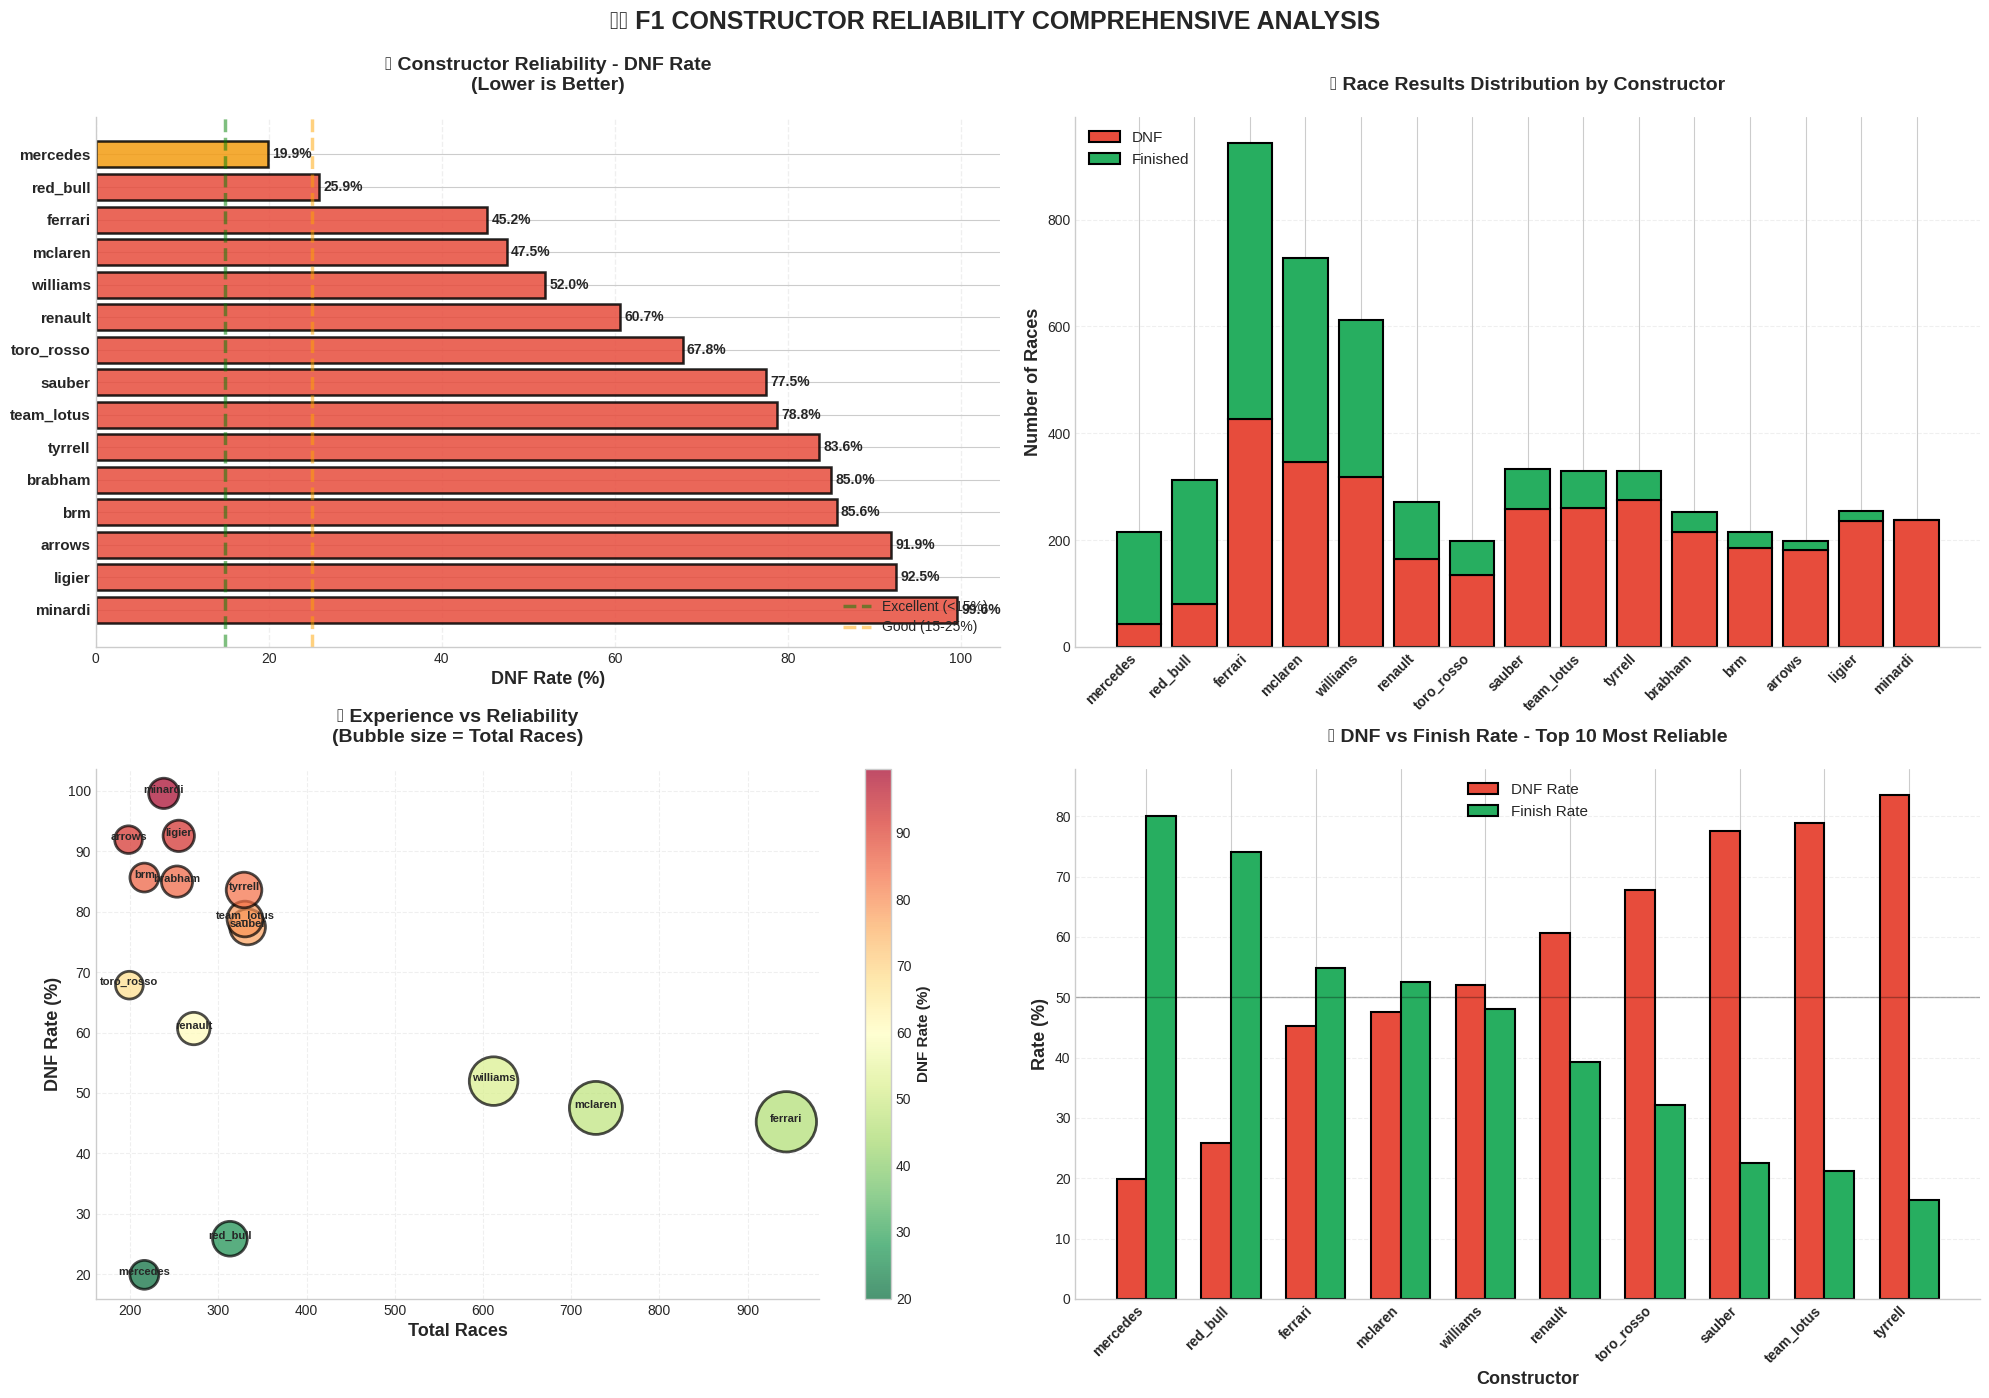


💡 KEY INSIGHTS - CONSTRUCTOR RELIABILITY

    🏆 MOST RELIABLE:
       • Constructor : mercedes
       • DNF Rate    : 19.91%
       • Total Races : 216
       → mercedes has excellent reliability!
    
    ⚠️ LEAST RELIABLE (in top 15):
       • Constructor : minardi
       • DNF Rate    : 99.58%
       • Total Races : 238
       → minardi needs to improve reliability
    
    📊 OVERALL:
       • Average DNF Rate : 67.57%
       • Reliability Gap  : 79.67% difference!
       → Constructor choice SIGNIFICANTLY impacts DNF risk!
    


In [ ]:
# ============================================================
# CONSTRUCTOR RELIABILITY - DEEP DIVE
# ============================================================

if 'constructorRef' in df.columns:
    print("\n" + "🏁 " + "="*70)
    print("   🏢 CONSTRUCTOR RELIABILITY ANALYSIS")
    print("🏁 " + "="*70)

    # Get top constructors by race count
    top_n_constructors = 15
    top_constructors = df['constructorRef'].value_counts().head(top_n_constructors).index

    constructor_analysis = df[df['constructorRef'].isin(top_constructors)].groupby(
        'constructorRef'
    )['target_finish'].agg([
        ('Total_Races', 'count'),
        ('DNF_Count', lambda x: (x == 0).sum()),
        ('Finish_Count', lambda x: (x == 1).sum()),
        ('DNF_Rate_%', lambda x: (x == 0).mean() * 100),
        ('Finish_Rate_%', lambda x: (x == 1).mean() * 100)
    ]).sort_values('DNF_Rate_%')

    print(f"\n📊 Top {top_n_constructors} Constructors Analysis:")
    print(constructor_analysis.to_string())

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))

    # 1. DNF Rate Horizontal Bar (sorted by reliability)
    ax1 = axes[0, 0]

    # Color code by reliability
    colors_reliability = ['#27ae60' if x < 15 else '#f39c12' if x < 25 else '#e74c3c'
                         for x in constructor_analysis['DNF_Rate_%']]

    y_pos = range(len(constructor_analysis))
    bars = ax1.barh(y_pos, constructor_analysis['DNF_Rate_%'],
                    color=colors_reliability, edgecolor='black', linewidth=1.8, alpha=0.85)

    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(constructor_analysis.index, fontsize=11, fontweight='bold')
    ax1.set_xlabel('DNF Rate (%)', fontsize=13, fontweight='bold')
    ax1.set_title('🏢 Constructor Reliability - DNF Rate\n(Lower is Better)',
                  fontsize=14, fontweight='bold', pad=20)
    ax1.grid(axis='x', alpha=0.3, linestyle='--', linewidth=1)

    # Add percentage labels
    for i, v in enumerate(constructor_analysis['DNF_Rate_%']):
        ax1.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=10)

    # Add reliability zones
    ax1.axvline(x=15, color='green', linestyle='--', alpha=0.5, linewidth=2.5, label='Excellent (<15%)')
    ax1.axvline(x=25, color='orange', linestyle='--', alpha=0.5, linewidth=2.5, label='Good (15-25%)')
    ax1.legend(loc='lower right', fontsize=10, framealpha=0.9)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.invert_yaxis()

    # 2. Stacked Bar - DNF vs Finish Counts
    ax2 = axes[0, 1]

    x_pos = range(len(constructor_analysis))
    width = 0.8

    bars1 = ax2.bar(x_pos, constructor_analysis['DNF_Count'], width,
                    label='DNF', color='#e74c3c', edgecolor='black', linewidth=1.5)
    bars2 = ax2.bar(x_pos, constructor_analysis['Finish_Count'], width,
                    bottom=constructor_analysis['DNF_Count'],
                    label='Finished', color='#27ae60', edgecolor='black', linewidth=1.5)

    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(constructor_analysis.index, rotation=45, ha='right', fontsize=10, fontweight='bold')
    ax2.set_ylabel('Number of Races', fontsize=13, fontweight='bold')
    ax2.set_title('🏁 Race Results Distribution by Constructor',
                  fontsize=14, fontweight='bold', pad=20)
    ax2.legend(loc='upper left', fontsize=11, framealpha=0.9)
    ax2.grid(axis='y', alpha=0.3, linestyle='--')

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    # 3. Scatter Plot - Total Races vs DNF Rate
    ax3 = axes[1, 0]

    scatter = ax3.scatter(constructor_analysis['Total_Races'],
                         constructor_analysis['DNF_Rate_%'],
                         s=constructor_analysis['Total_Races']*2,
                         c=constructor_analysis['DNF_Rate_%'],
                         cmap='RdYlGn_r', alpha=0.7, edgecolors='black', linewidth=2)

    # Add labels for each point
    for idx, row in constructor_analysis.iterrows():
        ax3.annotate(idx,
                    (row['Total_Races'], row['DNF_Rate_%']),
                    fontsize=8, fontweight='bold', ha='center')

    ax3.set_xlabel('Total Races', fontsize=13, fontweight='bold')
    ax3.set_ylabel('DNF Rate (%)', fontsize=13, fontweight='bold')
    ax3.set_title('📊 Experience vs Reliability\n(Bubble size = Total Races)',
                  fontsize=14, fontweight='bold', pad=20)
    ax3.grid(alpha=0.3, linestyle='--')

    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('DNF Rate (%)', fontweight='bold', fontsize=11)

    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)

    # 4. Grouped Bar - DNF Rate Comparison (Top 10 only)
    ax4 = axes[1, 1]

    top_10_constructors = constructor_analysis.head(10)

    x = np.arange(len(top_10_constructors))
    width = 0.35

    bars1 = ax4.bar(x - width/2, top_10_constructors['DNF_Rate_%'], width,
                    label='DNF Rate', color='#e74c3c', edgecolor='black', linewidth=1.5)
    bars2 = ax4.bar(x + width/2, top_10_constructors['Finish_Rate_%'], width,
                    label='Finish Rate', color='#27ae60', edgecolor='black', linewidth=1.5)

    ax4.set_xlabel('Constructor', fontsize=13, fontweight='bold')
    ax4.set_ylabel('Rate (%)', fontsize=13, fontweight='bold')
    ax4.set_title('📈 DNF vs Finish Rate - Top 10 Most Reliable',
                  fontsize=14, fontweight='bold', pad=20)
    ax4.set_xticks(x)
    ax4.set_xticklabels(top_10_constructors.index, rotation=45, ha='right', fontsize=10, fontweight='bold')
    ax4.legend(fontsize=11, framealpha=0.9)
    ax4.grid(axis='y', alpha=0.3, linestyle='--')
    ax4.axhline(y=50, color='black', linestyle='-', linewidth=1, alpha=0.3)

    ax4.spines['top'].set_visible(False)
    ax4.spines['right'].set_visible(False)

    plt.suptitle('🏎️ F1 CONSTRUCTOR RELIABILITY COMPREHENSIVE ANALYSIS',
                 fontsize=18, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

    # Key insights
    print("\n" + "="*70)
    print("💡 KEY INSIGHTS - CONSTRUCTOR RELIABILITY")
    print("="*70)

    most_reliable = constructor_analysis.iloc[0]
    least_reliable = constructor_analysis.iloc[-1]

    print(f"""
    🏆 MOST RELIABLE:
       • Constructor : {most_reliable.name}
       • DNF Rate    : {most_reliable['DNF_Rate_%']:.2f}%
       • Total Races : {int(most_reliable['Total_Races']):,}
       → {most_reliable.name} has excellent reliability!

    ⚠️ LEAST RELIABLE (in top {top_n_constructors}):
       • Constructor : {least_reliable.name}
       • DNF Rate    : {least_reliable['DNF_Rate_%']:.2f}%
       • Total Races : {int(least_reliable['Total_Races']):,}
       → {least_reliable.name} needs to improve reliability

    📊 OVERALL:
       • Average DNF Rate : {constructor_analysis['DNF_Rate_%'].mean():.2f}%
       • Reliability Gap  : {least_reliable['DNF_Rate_%'] - most_reliable['DNF_Rate_%']:.2f}% difference!
       → Constructor choice SIGNIFICANTLY impacts DNF risk!
    """)

## c. Circuit Difficulty Analysis


🏁 ======================================================================
   🏁 CIRCUIT DIFFICULTY ANALYSIS (DNF Perspective)
🏁 ======================================================================

📊 Analyzing 62 circuits (min 15 races each)

🔥 TOP 10 MOST CHALLENGING CIRCUITS (Highest DNF):
              Total_Races  DNF_Count  DNF_Rate_%
circuitRef                                      
tremblant              16         16      100.00
pedralbes              16         16      100.00
las_vegas              18         17       94.44
phoenix                48         45       93.75
montjuic               25         23       92.00
essarts                37         34       91.89
zolder                106         95       89.62
bremgarten             47         42       89.36
brands_hatch          147        127       86.39
kyalami               201        173       86.07

✅ TOP 10 MOST RELIABLE CIRCUITS (Lowest DNF):
            Total_Races  DNF_Count  DNF_Rate_%
circuitRef              

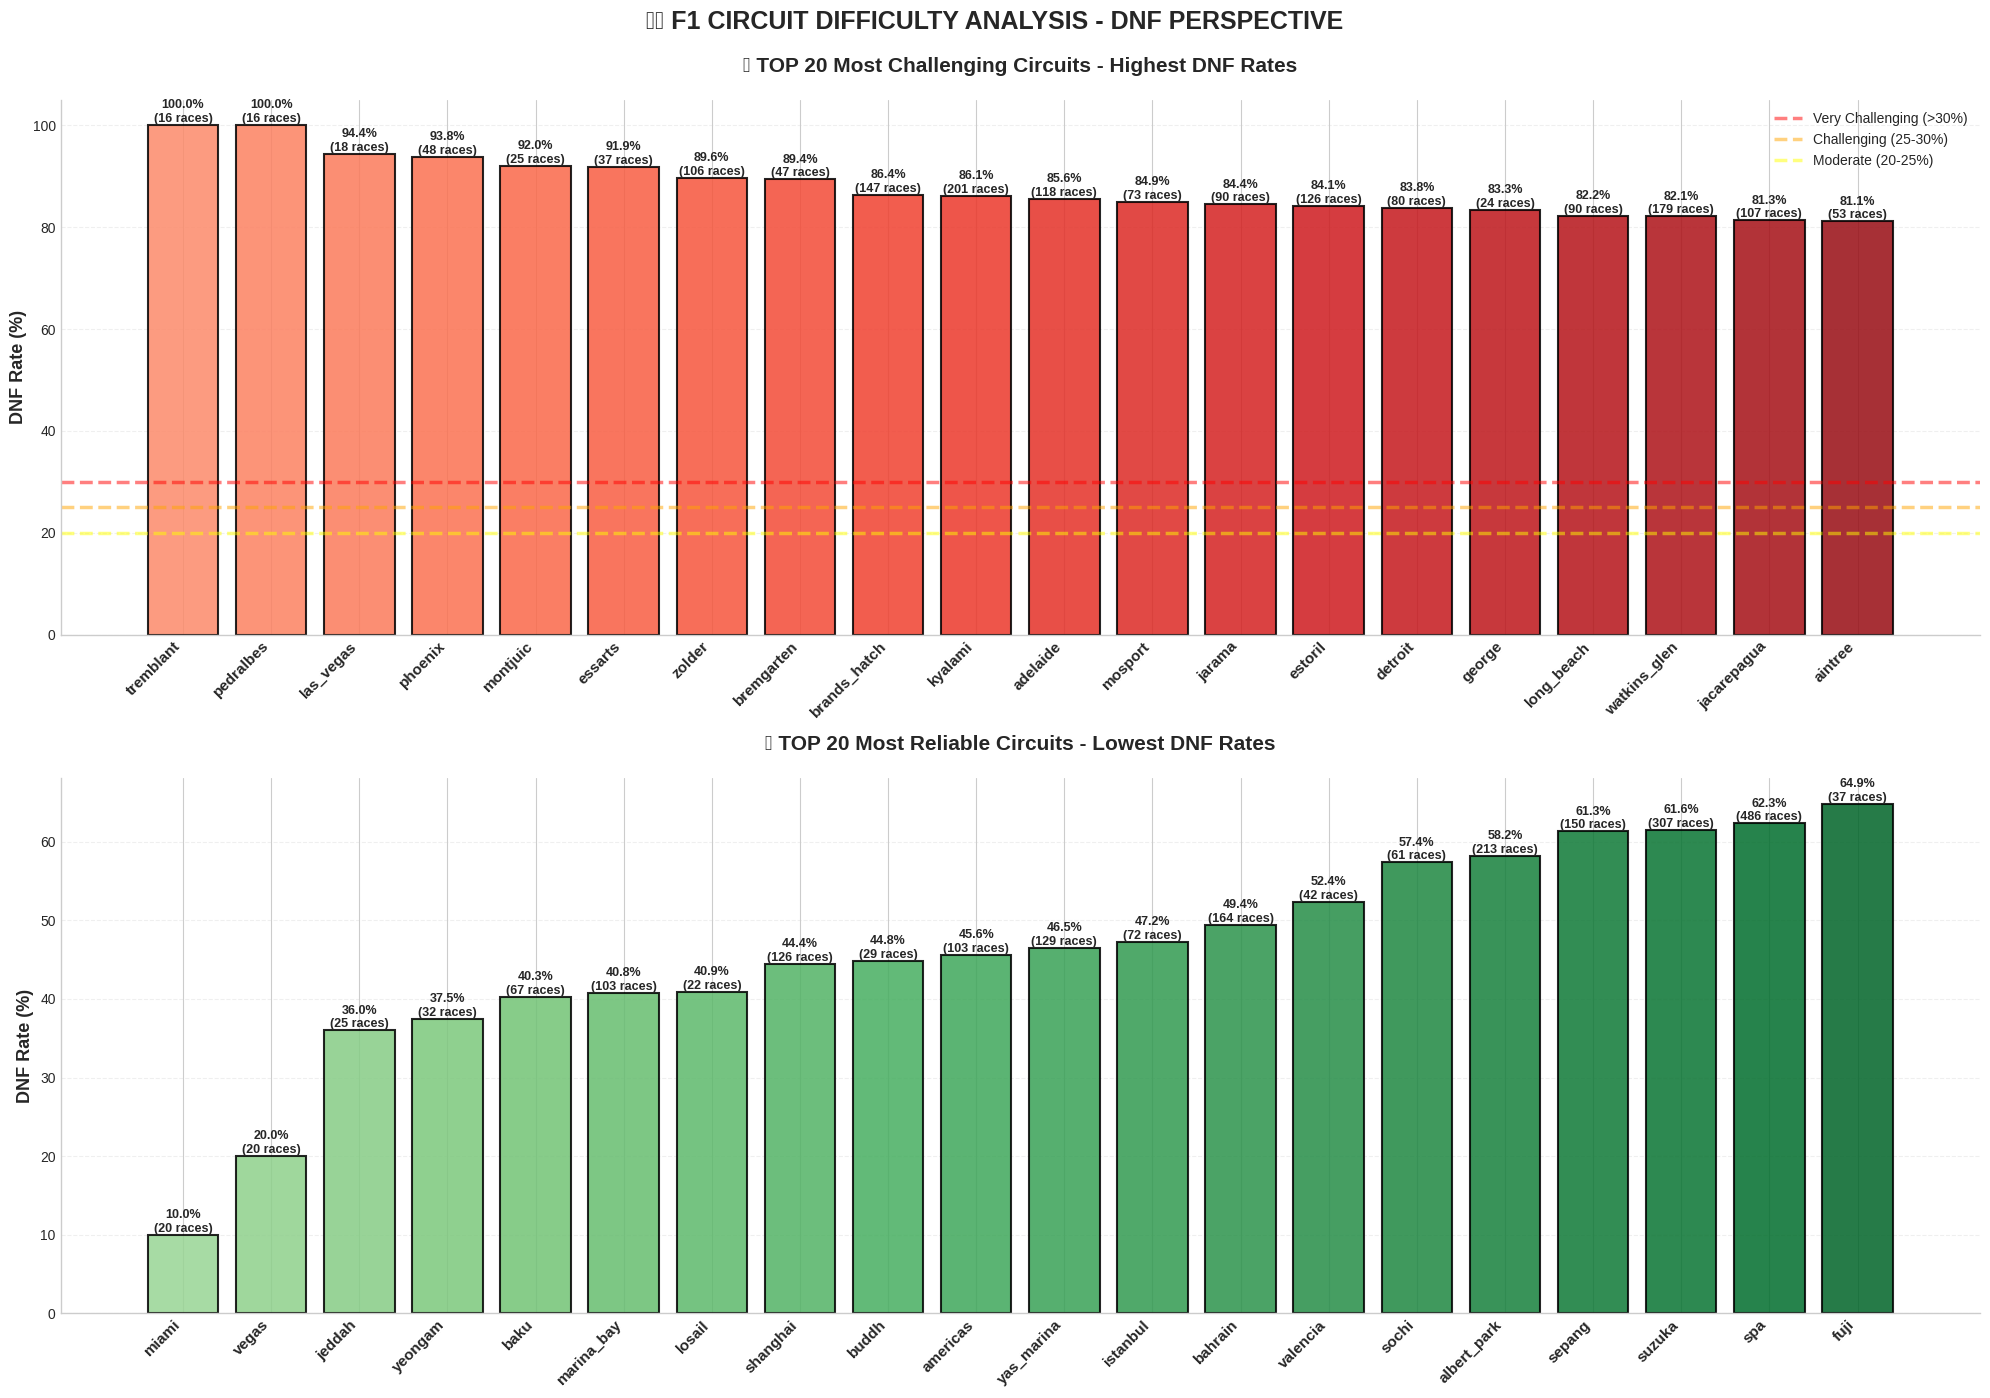


💡 KEY INSIGHTS - CIRCUIT CHARACTERISTICS

    🔥 MOST CHALLENGING CIRCUIT:
       • Circuit     : tremblant
       • DNF Rate    : 100.00%
       • Total Races : 16
       → This circuit is a REAL TEST of reliability!
    
    ✅ MOST RELIABLE CIRCUIT:
       • Circuit     : miami
       • DNF Rate    : 10.00%
       • Total Races : 20
       → Lower risk, better for points finish!
    
    📊 OVERALL CIRCUIT STATISTICS:
       • Average DNF Rate : 69.40%
       • Difficulty Range : 10.00% - 100.00%
       • Std Deviation    : 19.36%
       
    🏎️ F1 CONTEXT:
       • Street circuits (Monaco, Singapore) often have higher DNF rates
       • High-speed circuits stress mechanical components
       • Track characteristics significantly impact reliability!
    


In [ ]:
# ============================================================
# CIRCUIT DIFFICULTY ANALYSIS
# ============================================================

if 'circuitRef' in df.columns:
    print("\n" + "🏁 " + "="*70)
    print("   🏁 CIRCUIT DIFFICULTY ANALYSIS (DNF Perspective)")
    print("🏁 " + "="*70)

    # Get circuits with sufficient data
    min_races = 15
    circuit_counts = df['circuitRef'].value_counts()
    circuits_with_data = circuit_counts[circuit_counts >= min_races].index

    circuit_analysis = df[df['circuitRef'].isin(circuits_with_data)].groupby(
        'circuitRef'
    )['target_finish'].agg([
        ('Total_Races', 'count'),
        ('DNF_Count', lambda x: (x == 0).sum()),
        ('DNF_Rate_%', lambda x: (x == 0).mean() * 100)
    ]).sort_values('DNF_Rate_%', ascending=False)

    print(f"\n📊 Analyzing {len(circuit_analysis)} circuits (min {min_races} races each)")

    # Top and bottom circuits
    print(f"\n🔥 TOP 10 MOST CHALLENGING CIRCUITS (Highest DNF):")
    print(circuit_analysis.head(10).to_string())

    print(f"\n✅ TOP 10 MOST RELIABLE CIRCUITS (Lowest DNF):")
    print(circuit_analysis.tail(10).to_string())

    # Visualization
    fig, axes = plt.subplots(2, 1, figsize=(20, 14))

    # 1. Top 20 circuits by DNF rate
    ax1 = axes[0]

    top_20 = circuit_analysis.head(20)

    # Color gradient based on DNF rate
    colors_gradient = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_20)))

    bars = ax1.bar(range(len(top_20)), top_20['DNF_Rate_%'],
                   color=colors_gradient, edgecolor='black', linewidth=1.5, alpha=0.85)

    ax1.set_xticks(range(len(top_20)))
    ax1.set_xticklabels(top_20.index, rotation=45, ha='right', fontsize=11, fontweight='bold')
    ax1.set_ylabel('DNF Rate (%)', fontsize=13, fontweight='bold')
    ax1.set_title('🔥 TOP 20 Most Challenging Circuits - Highest DNF Rates',
                  fontsize=15, fontweight='bold', pad=20)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')

    # Add value labels
    for bar, rate, count in zip(bars, top_20['DNF_Rate_%'], top_20['Total_Races']):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{rate:.1f}%\n({int(count)} races)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Add difficulty zones
    ax1.axhline(y=30, color='red', linestyle='--', alpha=0.5, linewidth=2.5,
               label='Very Challenging (>30%)')
    ax1.axhline(y=25, color='orange', linestyle='--', alpha=0.5, linewidth=2.5,
               label='Challenging (25-30%)')
    ax1.axhline(y=20, color='yellow', linestyle='--', alpha=0.5, linewidth=2.5,
               label='Moderate (20-25%)')
    ax1.legend(loc='upper right', fontsize=10, framealpha=0.9)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # 2. Bottom 20 circuits (most reliable)
    ax2 = axes[1]

    bottom_20 = circuit_analysis.tail(20).sort_values('DNF_Rate_%')

    # Color gradient (green for low DNF)
    colors_gradient_green = plt.cm.Greens(np.linspace(0.4, 0.9, len(bottom_20)))

    bars = ax2.bar(range(len(bottom_20)), bottom_20['DNF_Rate_%'],
                   color=colors_gradient_green, edgecolor='black', linewidth=1.5, alpha=0.85)

    ax2.set_xticks(range(len(bottom_20)))
    ax2.set_xticklabels(bottom_20.index, rotation=45, ha='right', fontsize=11, fontweight='bold')
    ax2.set_ylabel('DNF Rate (%)', fontsize=13, fontweight='bold')
    ax2.set_title('✅ TOP 20 Most Reliable Circuits - Lowest DNF Rates',
                  fontsize=15, fontweight='bold', pad=20)
    ax2.grid(axis='y', alpha=0.3, linestyle='--')

    # Add value labels
    for bar, rate, count in zip(bars, bottom_20['DNF_Rate_%'], bottom_20['Total_Races']):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{rate:.1f}%\n({int(count)} races)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    plt.suptitle('🏎️ F1 CIRCUIT DIFFICULTY ANALYSIS - DNF PERSPECTIVE',
                 fontsize=18, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

    # Circuit insights
    print("\n" + "="*70)
    print("💡 KEY INSIGHTS - CIRCUIT CHARACTERISTICS")
    print("="*70)

    most_challenging = circuit_analysis.iloc[0]
    most_reliable = circuit_analysis.iloc[-1]

    print(f"""
    🔥 MOST CHALLENGING CIRCUIT:
       • Circuit     : {most_challenging.name}
       • DNF Rate    : {most_challenging['DNF_Rate_%']:.2f}%
       • Total Races : {int(most_challenging['Total_Races']):,}
       → This circuit is a REAL TEST of reliability!

    ✅ MOST RELIABLE CIRCUIT:
       • Circuit     : {most_reliable.name}
       • DNF Rate    : {most_reliable['DNF_Rate_%']:.2f}%
       • Total Races : {int(most_reliable['Total_Races']):,}
       → Lower risk, better for points finish!

    📊 OVERALL CIRCUIT STATISTICS:
       • Average DNF Rate : {circuit_analysis['DNF_Rate_%'].mean():.2f}%
       • Difficulty Range : {circuit_analysis['DNF_Rate_%'].min():.2f}% - {circuit_analysis['DNF_Rate_%'].max():.2f}%
       • Std Deviation    : {circuit_analysis['DNF_Rate_%'].std():.2f}%

    🏎️ F1 CONTEXT:
       • Street circuits (Monaco, Singapore) often have higher DNF rates
       • High-speed circuits stress mechanical components
       • Track characteristics significantly impact reliability!
    """)

# 🤖 MACHINE LEARNING PIPELINE - F1 DNF PREDICTION

In [ ]:
print("🏁 " + "="*70)
print("   🤖 STARTING MACHINE LEARNING PIPELINE")
print("   🎯 OBJECTIVE: Predict F1 DNF (Did Not Finish)")
print("🏁 " + "="*70)

🏁 ======================================================================
   🤖 STARTING MACHINE LEARNING PIPELINE
   🎯 OBJECTIVE: Predict F1 DNF (Did Not Finish)
🏁 ======================================================================


# 🔧 Data Preprocessing - Preparing for ML

## a. Handle Missing Values

In [ ]:
# ============================================================
# STEP 1: HANDLE MISSING VALUES
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🔧 STEP 1: HANDLING MISSING VALUES")
print("🏁 " + "="*70)

# Create a copy for preprocessing
df_ml = df.copy()

print(f"\n📊 Dataset shape before preprocessing: {df_ml.shape}")

# Check missing values again
missing_before = df_ml.isnull().sum().sum()
print(f"Total missing values: {missing_before:,}")

# Strategy for each column type
print("\n📋 Missing Value Strategy:")

# 1. Performance metrics - Missing often means DNF, so create indicators
performance_cols = ['milliseconds', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'rank']

for col in performance_cols:
    if col in df_ml.columns:
        # Create binary indicator (has value or not)
        df_ml[f'{col}_missing'] = df_ml[col].isnull().astype(int)
        print(f"   ✓ Created indicator: {col}_missing")

        # Fill with appropriate value
        if df_ml[col].dtype in ['int64', 'float64', 'uint8', 'uint16', 'uint32']:
            df_ml[col].fillna(-999, inplace=True)  # Special value for missing
        else:
            df_ml[col].fillna('MISSING', inplace=True)

# 2. Points - 0 means no points scored (valid)
if 'points' in df_ml.columns:
    df_ml['points'].fillna(0, inplace=True)
    print(f"   ✓ Filled 'points' with 0")

# 3. Laps - Fill with 0 (didn't complete any laps)
if 'laps' in df_ml.columns:
    df_ml['laps'].fillna(0, inplace=True)
    print(f"   ✓ Filled 'laps' with 0")

# 4. Categorical - Fill with 'Unknown'
categorical_cols = df_ml.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if df_ml[col].isnull().any():
        df_ml[col].fillna('Unknown', inplace=True)
        print(f"   ✓ Filled '{col}' with 'Unknown'")

# 5. Numerical - Fill with median
numerical_cols = df_ml.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df_ml[col].isnull().any():
        median_val = df_ml[col].median()
        df_ml[col].fillna(median_val, inplace=True)
        print(f"   ✓ Filled '{col}' with median: {median_val:.2f}")

# Check missing values after
missing_after = df_ml.isnull().sum().sum()
print(f"\n✅ Missing values after preprocessing: {missing_after:,}")
print(f"📉 Reduction: {missing_before - missing_after:,} missing values handled")


🏁 ======================================================================
   🔧 STEP 1: HANDLING MISSING VALUES
🏁 ======================================================================

📊 Dataset shape before preprocessing: (10000, 31)
Total missing values: 3,920

📋 Missing Value Strategy:
   ✓ Created indicator: milliseconds_missing
   ✓ Created indicator: fastestLap_missing
   ✓ Created indicator: fastestLapTime_missing
   ✓ Created indicator: fastestLapSpeed_missing
   ✓ Created indicator: rank_missing
   ✓ Filled 'points' with 0
   ✓ Filled 'laps' with 0

✅ Missing values after preprocessing: 0
📉 Reduction: 3,920 missing values handled


## b. Feature Engineering

In [ ]:
# ============================================================
# STEP 2: FEATURE ENGINEERING
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   ⚙️ STEP 2: FEATURE ENGINEERING")
print("🏁 " + "="*70)

print("\n🔨 Creating new features based on domain knowledge...")

# 1. DRIVER FEATURES
if 'dob' in df_ml.columns and 'date' in df_ml.columns:
    # Driver age at race
    df_ml['driver_age'] = (pd.to_datetime(df_ml['date']) - pd.to_datetime(df_ml['dob'])).dt.days / 365.25
    print("   ✓ Created: driver_age (age at time of race)")

# 2. STARTING POSITION FEATURES
if 'grid' in df_ml.columns:
    # Grid position categories
    df_ml['grid_front_row'] = (df_ml['grid'] <= 2).astype(int)
    df_ml['grid_top5'] = (df_ml['grid'] <= 5).astype(int)
    df_ml['grid_top10'] = (df_ml['grid'] <= 10).astype(int)
    df_ml['grid_back'] = (df_ml['grid'] >= 15).astype(int)
    print("   ✓ Created: grid position categories (front_row, top5, top10, back)")

# 3. TEMPORAL FEATURES
if 'year' in df_ml.columns:
    # Era/decade
    df_ml['decade'] = (df_ml['year'] // 10) * 10
    df_ml['modern_era'] = (df_ml['year'] >= 2014).astype(int)  # Hybrid era
    print("   ✓ Created: decade, modern_era")

if 'date' in df_ml.columns:
    df_ml['date_dt'] = pd.to_datetime(df_ml['date'])
    df_ml['month'] = df_ml['date_dt'].dt.month
    df_ml['season_phase'] = pd.cut(df_ml['round'], bins=[0, 6, 15, 25], labels=['early', 'mid', 'late'])
    print("   ✓ Created: month, season_phase")

# 4. CIRCUIT FEATURES
if 'alt' in df_ml.columns:
    # High altitude circuits (>1000m)
    df_ml['high_altitude'] = (df_ml['alt'] > 1000).astype(int)
    print("   ✓ Created: high_altitude")

# 5. HISTORICAL PERFORMANCE FEATURES
# DNF rate by constructor (team reliability)
if 'constructorRef' in df_ml.columns:
    constructor_dnf_rate = df_ml.groupby('constructorRef')['target_finish'].transform(
        lambda x: (x == 0).sum() / len(x)
    )
    df_ml['constructor_dnf_rate'] = constructor_dnf_rate
    print("   ✓ Created: constructor_dnf_rate (team reliability)")

# DNF rate by circuit
if 'circuitRef' in df_ml.columns:
    circuit_dnf_rate = df_ml.groupby('circuitRef')['target_finish'].transform(
        lambda x: (x == 0).sum() / len(x)
    )
    df_ml['circuit_dnf_rate'] = circuit_dnf_rate
    print("   ✓ Created: circuit_dnf_rate (circuit difficulty)")

# DNF rate by driver
if 'driverRef' in df_ml.columns:
    driver_dnf_rate = df_ml.groupby('driverRef')['target_finish'].transform(
        lambda x: (x == 0).sum() / len(x)
    )
    df_ml['driver_dnf_rate'] = driver_dnf_rate
    print("   ✓ Created: driver_dnf_rate (driver reliability)")

# 6. INTERACTION FEATURES
if 'grid' in df_ml.columns and 'laps' in df_ml.columns:
    df_ml['grid_laps_interaction'] = df_ml['grid'] * df_ml['laps']
    print("   ✓ Created: grid_laps_interaction")

print(f"\n✅ Feature engineering complete!")
print(f"📊 New dataset shape: {df_ml.shape}")
print(f"📈 Added {df_ml.shape[1] - df.shape[1]} new features")


🏁 ======================================================================
   ⚙️ STEP 2: FEATURE ENGINEERING
🏁 ======================================================================

🔨 Creating new features based on domain knowledge...
   ✓ Created: driver_age (age at time of race)
   ✓ Created: grid position categories (front_row, top5, top10, back)
   ✓ Created: decade, modern_era
   ✓ Created: month, season_phase
   ✓ Created: high_altitude
   ✓ Created: constructor_dnf_rate (team reliability)
   ✓ Created: circuit_dnf_rate (circuit difficulty)
   ✓ Created: driver_dnf_rate (driver reliability)
   ✓ Created: grid_laps_interaction

✅ Feature engineering complete!
📊 New dataset shape: (10000, 51)
📈 Added 20 new features


## c. Select Features for Modeling

In [ ]:
# ============================================================
# STEP 3: FEATURE SELECTION
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🎯 STEP 3: SELECTING FEATURES FOR MODELING")
print("🏁 " + "="*70)

# Define features to use
print("\n📋 Selecting relevant features...")

# Numerical features
numerical_features = [
    'year', 'round', 'grid', 'laps', 'points',
    'lat', 'lng', 'alt',
    'driver_age', 'constructor_dnf_rate', 'circuit_dnf_rate', 'driver_dnf_rate',
    'grid_front_row', 'grid_top5', 'grid_top10', 'grid_back',
    'high_altitude', 'modern_era', 'month'
]

# Categorical features to encode
categorical_features = [
    'constructorRef', 'circuitRef', 'nationality_x', 'country'
]

# Filter features that actually exist in dataframe
numerical_features = [f for f in numerical_features if f in df_ml.columns]
categorical_features = [f for f in categorical_features if f in df_ml.columns]

print(f"\n✅ Selected {len(numerical_features)} numerical features")
print(f"✅ Selected {len(categorical_features)} categorical features")

print(f"\n📊 Numerical Features:")
for i, feat in enumerate(numerical_features, 1):
    print(f"   {i:2d}. {feat}")

print(f"\n📝 Categorical Features:")
for i, feat in enumerate(categorical_features, 1):
    print(f"   {i:2d}. {feat}")


🏁 ======================================================================
   🎯 STEP 3: SELECTING FEATURES FOR MODELING
🏁 ======================================================================

📋 Selecting relevant features...

✅ Selected 19 numerical features
✅ Selected 4 categorical features

📊 Numerical Features:
    1. year
    2. round
    3. grid
    4. laps
    5. points
    6. lat
    7. lng
    8. alt
    9. driver_age
   10. constructor_dnf_rate
   11. circuit_dnf_rate
   12. driver_dnf_rate
   13. grid_front_row
   14. grid_top5
   15. grid_top10
   16. grid_back
   17. high_altitude
   18. modern_era
   19. month

📝 Categorical Features:
    1. constructorRef
    2. circuitRef
    3. nationality_x
    4. country


## d. Encode Categorical Variables

In [ ]:
# ============================================================
# STEP 4: ENCODE CATEGORICAL VARIABLES
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🔄 STEP 4: ENCODING CATEGORICAL VARIABLES")
print("🏁 " + "="*70)

from sklearn.preprocessing import LabelEncoder

# Create a copy for encoding
df_encoded = df_ml.copy()

# Label encoding for high cardinality features
label_encoders = {}

for col in categorical_features:
    if col in df_encoded.columns:
        print(f"\n📝 Encoding: {col}")
        print(f"   Unique values: {df_encoded[col].nunique()}")

        le = LabelEncoder()
        df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

        print(f"   ✓ Created: {col}_encoded")

# Update feature list
encoded_features = [f'{col}_encoded' for col in categorical_features if col in df_ml.columns]
all_features = numerical_features + encoded_features

print(f"\n✅ Encoding complete!")
print(f"📊 Total features for modeling: {len(all_features)}")


🏁 ======================================================================
   🔄 STEP 4: ENCODING CATEGORICAL VARIABLES
🏁 ======================================================================

📝 Encoding: constructorRef
   Unique values: 174
   ✓ Created: constructorRef_encoded

📝 Encoding: circuitRef
   Unique values: 77
   ✓ Created: circuitRef_encoded

📝 Encoding: nationality_x
   Unique values: 40
   ✓ Created: nationality_x_encoded

📝 Encoding: country
   Unique values: 35
   ✓ Created: country_encoded

✅ Encoding complete!
📊 Total features for modeling: 23


# 🎯 Model Building & Training

## a. Split Data

In [ ]:
# ============================================================
# STEP 5: SPLIT DATA - TRAIN/TEST
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   ✂️ STEP 5: SPLITTING DATA INTO TRAIN/TEST SETS")
print("🏁 " + "="*70)

from sklearn.model_selection import train_test_split

# Prepare X and y
X = df_encoded[all_features].copy()
y = df_encoded['target_finish'].copy()

print(f"\n📊 Dataset Overview:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y)  : {y.shape}")
print(f"   Target distribution:")
print(f"      DNF (0)     : {(y == 0).sum():,} ({(y == 0).sum()/len(y)*100:.2f}%)")
print(f"      Finished (1): {(y == 1).sum():,} ({(y == 1).sum()/len(y)*100:.2f}%)")

# Split with stratification (maintain class distribution)
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    stratify=y  # Important for imbalanced data!
)

print(f"\n✅ Data split complete!")
print(f"   Test size: {test_size*100:.0f}%")
print(f"   Random state: {random_state}")
print(f"\n📊 Split Results:")
print(f"   Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test set    : {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Verify stratification
print(f"\n✓ Training set distribution:")
print(f"   DNF (0)     : {(y_train == 0).sum():,} ({(y_train == 0).sum()/len(y_train)*100:.2f}%)")
print(f"   Finished (1): {(y_train == 1).sum():,} ({(y_train == 1).sum()/len(y_train)*100:.2f}%)")

print(f"\n✓ Test set distribution:")
print(f"   DNF (0)     : {(y_test == 0).sum():,} ({(y_test == 0).sum()/len(y_test)*100:.2f}%)")
print(f"   Finished (1): {(y_test == 1).sum():,} ({(y_test == 1).sum()/len(y_test)*100:.2f}%)")


🏁 ======================================================================
   ✂️ STEP 5: SPLITTING DATA INTO TRAIN/TEST SETS
🏁 ======================================================================

📊 Dataset Overview:
   Features (X): (10000, 23)
   Target (y)  : (10000,)
   Target distribution:
      DNF (0)     : 7,105 (71.05%)
      Finished (1): 2,895 (28.95%)

✅ Data split complete!
   Test size: 20%
   Random state: 42

📊 Split Results:
   Training set: 8,000 samples (80.0%)
   Test set    : 2,000 samples (20.0%)

✓ Training set distribution:
   DNF (0)     : 5,684 (71.05%)
   Finished (1): 2,316 (28.95%)

✓ Test set distribution:
   DNF (0)     : 1,421 (71.05%)
   Finished (1): 579 (28.95%)


## b. Feature Scaling

In [ ]:
# ============================================================
# STEP 6: FEATURE SCALING
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   📏 STEP 6: FEATURE SCALING (STANDARDIZATION)")
print("🏁 " + "="*70)

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only (prevent data leakage!)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"\n✅ Feature scaling complete!")
print(f"   Method: StandardScaler (mean=0, std=1)")
print(f"\n📊 Scaled Training Set Statistics:")
print(f"   Mean  : {X_train_scaled.mean().mean():.6f} (should be ~0)")
print(f"   Std   : {X_train_scaled.std().mean():.6f} (should be ~1)")
print(f"\n📊 Scaled Test Set Statistics:")
print(f"   Mean  : {X_test_scaled.mean().mean():.6f}")
print(f"   Std   : {X_test_scaled.std().mean():.6f}")

print("\n💡 Why scaling?")
print("   • Makes features comparable in magnitude")
print("   • Improves gradient descent convergence")
print("   • Essential for distance-based algorithms (KNN, SVM)")
print("   • Helps with regularization (L1, L2)")


🏁 ======================================================================
   📏 STEP 6: FEATURE SCALING (STANDARDIZATION)
🏁 ======================================================================

✅ Feature scaling complete!
   Method: StandardScaler (mean=0, std=1)

📊 Scaled Training Set Statistics:
   Mean  : -0.000000 (should be ~0)
   Std   : 1.000063 (should be ~1)

📊 Scaled Test Set Statistics:
   Mean  : 0.004636
   Std   : 0.991862

💡 Why scaling?
   • Makes features comparable in magnitude
   • Improves gradient descent convergence
   • Essential for distance-based algorithms (KNN, SVM)
   • Helps with regularization (L1, L2)


## c. Build Multiple Models

In [ ]:
# ============================================================
# STEP 7: BUILD & TRAIN MULTIPLE MODELS
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🤖 STEP 7: TRAINING MULTIPLE ML MODELS")
print("🏁 " + "="*70)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

print("\n🏎️ Initializing models...")

# Dictionary of models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=15),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

print(f"✅ {len(models)} models initialized:")
for i, name in enumerate(models.keys(), 1):
    print(f"   {i}. {name}")

# Train all models
print("\n🚀 Training models (this may take a few minutes)...\n")

trained_models = {}
training_times = {}

import time

for name, model in models.items():
    print(f"   Training: {name}...", end=" ")
    start_time = time.time()

    # Train the model
    model.fit(X_train_scaled, y_train)

    end_time = time.time()
    training_time = end_time - start_time

    trained_models[name] = model
    training_times[name] = training_time

    print(f"✓ Done! ({training_time:.2f}s)")

print(f"\n🎉 All models trained successfully!")


🏁 ======================================================================
   🤖 STEP 7: TRAINING MULTIPLE ML MODELS
🏁 ======================================================================

🏎️ Initializing models...
✅ 7 models initialized:
   1. Logistic Regression
   2. Decision Tree
   3. Random Forest
   4. Gradient Boosting
   5. SVM
   6. KNN
   7. Naive Bayes

🚀 Training models (this may take a few minutes)...

   Training: Logistic Regression... ✓ Done! (0.06s)
   Training: Decision Tree... ✓ Done! (0.15s)
   Training: Random Forest... ✓ Done! (1.92s)
   Training: Gradient Boosting... ✓ Done! (4.50s)
   Training: SVM... ✓ Done! (13.39s)
   Training: KNN... ✓ Done! (0.01s)
   Training: Naive Bayes... ✓ Done! (0.01s)

🎉 All models trained successfully!


# 📊 Model Evaluation

## a. Predictions & Metrics

In [ ]:
# ============================================================
# STEP 8: MODEL EVALUATION - PREDICTIONS & METRICS
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   📊 STEP 8: EVALUATING MODEL PERFORMANCE")
print("🏁 " + "="*70)

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report)

# Store results
results = []

print("\n📈 Calculating metrics for each model...\n")

for name, model in trained_models.items():
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training_Time': training_times[name]
    })

    print(f"✓ {name:25s} | Accuracy: {accuracy:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)

print("\n" + "="*70)
print("📊 MODEL PERFORMANCE COMPARISON")
print("="*70)
print(results_df.to_string(index=False))


🏁 ======================================================================
   📊 STEP 8: EVALUATING MODEL PERFORMANCE
🏁 ======================================================================

📈 Calculating metrics for each model...

✓ Logistic Regression       | Accuracy: 0.8865 | F1: 0.7844 | ROC-AUC: 0.9414
✓ Decision Tree             | Accuracy: 0.8795 | F1: 0.7854 | ROC-AUC: 0.8939
✓ Random Forest             | Accuracy: 0.9130 | F1: 0.8410 | ROC-AUC: 0.9641
✓ Gradient Boosting         | Accuracy: 0.9140 | F1: 0.8436 | ROC-AUC: 0.9616
✓ SVM                       | Accuracy: 0.8870 | F1: 0.7814 | ROC-AUC: 0.9337
✓ KNN                       | Accuracy: 0.8450 | F1: 0.7031 | ROC-AUC: 0.8737
✓ Naive Bayes               | Accuracy: 0.8560 | F1: 0.7596 | ROC-AUC: 0.9096

📊 MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  Training_Time
  Gradient Boosting      0.91       0.89    0.80      0.84     0.96           4.50
      Random Forest      

## b. Visualization - Model Comparison


🎨 Creating performance visualizations...


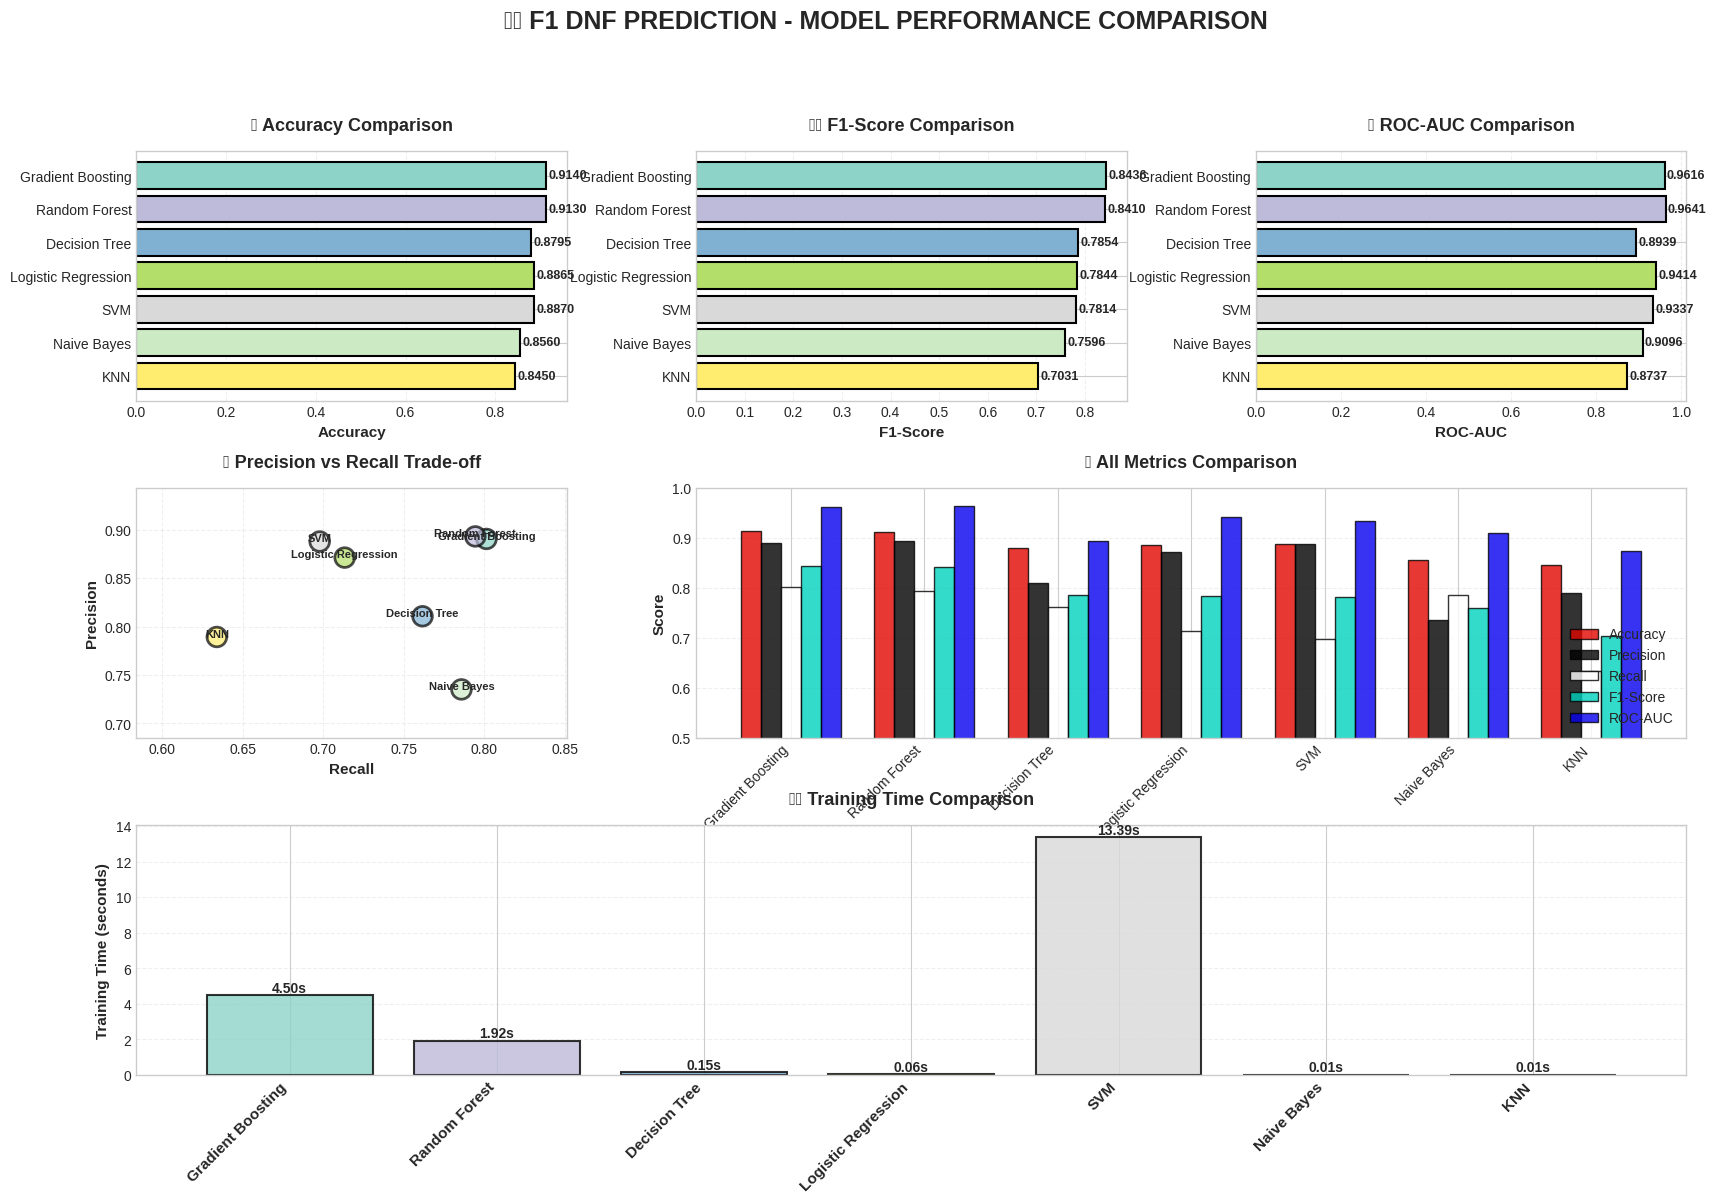

In [ ]:
# ============================================================
# VISUALIZATION: MODEL COMPARISON
# ============================================================

print("\n🎨 Creating performance visualizations...")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# Color palette
colors = plt.cm.Set3(np.linspace(0, 1, len(results_df)))

# 1. Accuracy Comparison
ax1 = fig.add_subplot(gs[0, 0])
bars = ax1.barh(results_df['Model'], results_df['Accuracy'],
                color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Accuracy', fontweight='bold', fontsize=11)
ax1.set_title('🎯 Accuracy Comparison', fontweight='bold', fontsize=13, pad=15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
for bar, acc in zip(bars, results_df['Accuracy']):
    ax1.text(acc + 0.005, bar.get_y() + bar.get_height()/2,
             f'{acc:.4f}', va='center', fontweight='bold', fontsize=9)
ax1.invert_yaxis()

# 2. F1-Score Comparison
ax2 = fig.add_subplot(gs[0, 1])
bars = ax2.barh(results_df['Model'], results_df['F1-Score'],
                color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('F1-Score', fontweight='bold', fontsize=11)
ax2.set_title('⚖️ F1-Score Comparison', fontweight='bold', fontsize=13, pad=15)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
for bar, f1 in zip(bars, results_df['F1-Score']):
    ax2.text(f1 + 0.005, bar.get_y() + bar.get_height()/2,
             f'{f1:.4f}', va='center', fontweight='bold', fontsize=9)
ax2.invert_yaxis()

# 3. ROC-AUC Comparison
ax3 = fig.add_subplot(gs[0, 2])
bars = ax3.barh(results_df['Model'], results_df['ROC-AUC'],
                color=colors, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('ROC-AUC', fontweight='bold', fontsize=11)
ax3.set_title('📈 ROC-AUC Comparison', fontweight='bold', fontsize=13, pad=15)
ax3.grid(axis='x', alpha=0.3, linestyle='--')
for bar, auc in zip(bars, results_df['ROC-AUC']):
    ax3.text(auc + 0.005, bar.get_y() + bar.get_height()/2,
             f'{auc:.4f}', va='center', fontweight='bold', fontsize=9)
ax3.invert_yaxis()

# 4. Precision vs Recall
ax4 = fig.add_subplot(gs[1, 0])
scatter = ax4.scatter(results_df['Recall'], results_df['Precision'],
                     s=200, c=range(len(results_df)), cmap='Set3',
                     edgecolor='black', linewidth=2, alpha=0.7)
for i, model in enumerate(results_df['Model']):
    ax4.annotate(model,
                (results_df.iloc[i]['Recall'], results_df.iloc[i]['Precision']),
                fontsize=8, ha='center', fontweight='bold')
ax4.set_xlabel('Recall', fontweight='bold', fontsize=11)
ax4.set_ylabel('Precision', fontweight='bold', fontsize=11)
ax4.set_title('🎯 Precision vs Recall Trade-off', fontweight='bold', fontsize=13, pad=15)
ax4.grid(alpha=0.3, linestyle='--')
ax4.set_xlim([results_df['Recall'].min()-0.05, results_df['Recall'].max()+0.05])
ax4.set_ylim([results_df['Precision'].min()-0.05, results_df['Precision'].max()+0.05])

# 5. All Metrics Comparison (Grouped Bar)
ax5 = fig.add_subplot(gs[1, 1:])
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(results_df))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    offset = width * (i - len(metrics_to_plot)/2 + 0.5)
    bars = ax5.bar(x + offset, results_df[metric], width,
                   label=metric, edgecolor='black', linewidth=1, alpha=0.8)

ax5.set_xlabel('Models', fontweight='bold', fontsize=11)
ax5.set_ylabel('Score', fontweight='bold', fontsize=11)
ax5.set_title('📊 All Metrics Comparison', fontweight='bold', fontsize=13, pad=15)
ax5.set_xticks(x)
ax5.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=10)
ax5.legend(loc='lower right', fontsize=10, framealpha=0.9)
ax5.grid(axis='y', alpha=0.3, linestyle='--')
ax5.set_ylim([0.5, 1.0])

# 6. Training Time Comparison
ax6 = fig.add_subplot(gs[2, :])
bars = ax6.bar(range(len(results_df)), results_df['Training_Time'],
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
ax6.set_xticks(range(len(results_df)))
ax6.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=11, fontweight='bold')
ax6.set_ylabel('Training Time (seconds)', fontweight='bold', fontsize=11)
ax6.set_title('⏱️ Training Time Comparison', fontweight='bold', fontsize=13, pad=15)
ax6.grid(axis='y', alpha=0.3, linestyle='--')

for bar, time_val in zip(bars, results_df['Training_Time']):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{time_val:.2f}s', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.suptitle('🏎️ F1 DNF PREDICTION - MODEL PERFORMANCE COMPARISON',
             fontsize=18, fontweight='bold', y=0.998)
plt.show()

## c. Best Model - Detailed Analysis


🏁 ======================================================================
   🏆 BEST MODEL - DETAILED ANALYSIS
🏁 ======================================================================

🏆 BEST MODEL: Gradient Boosting

📊 Performance Metrics:
   • Accuracy     : 0.9140
   • Precision    : 0.8906
   • Recall       : 0.8014
   • F1-Score     : 0.8436
   • ROC-AUC      : 0.9616

📋 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     DNF (0)     0.9222    0.9599    0.9407      1421
Finished (1)     0.8906    0.8014    0.8436       579

    accuracy                         0.9140      2000
   macro avg     0.9064    0.8806    0.8922      2000
weighted avg     0.9131    0.9140    0.9126      2000


🔍 CONFUSION MATRIX:
                    Predicted
                 DNF    Finished
Actual  DNF       1364      57
        Finished   115     464

📊 Confusion Matrix Breakdown:
   • True Negatives  (TN): 1,364 - Correctly predicted DNF
   • False Positives (FP): 

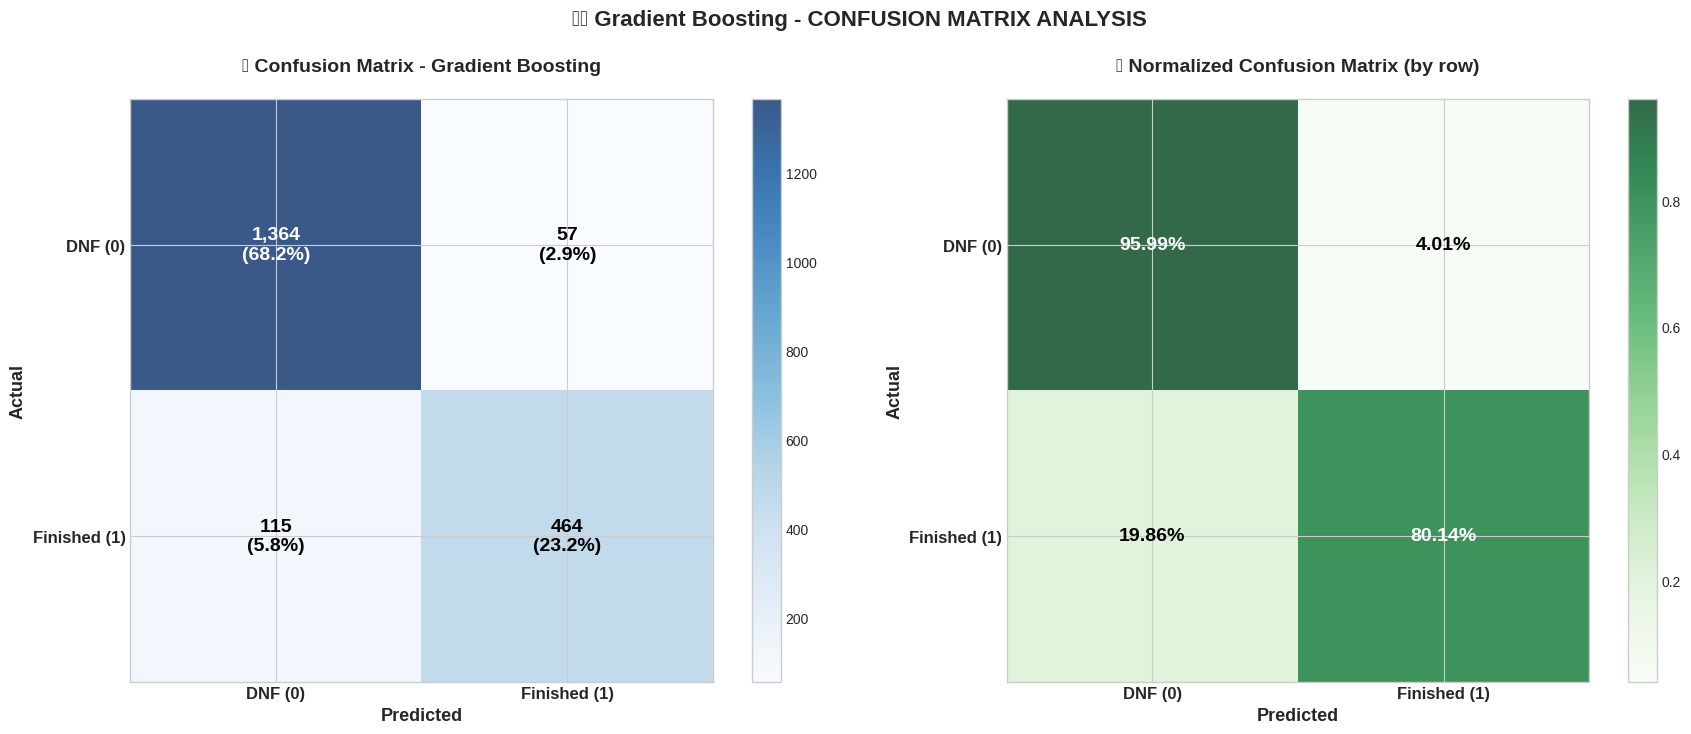

In [ ]:
# ============================================================
# BEST MODEL - DETAILED ANALYSIS
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🏆 BEST MODEL - DETAILED ANALYSIS")
print("🏁 " + "="*70)

# Get best model (by F1-Score)
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"\n📊 Performance Metrics:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    value = results_df.iloc[0][metric]
    print(f"   • {metric:12s} : {value:.4f}")

# Detailed classification report
print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
print("="*70)

y_pred_best = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best,
                          target_names=['DNF (0)', 'Finished (1)'],
                          digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

print(f"\n🔍 CONFUSION MATRIX:")
print("="*70)
print(f"                    Predicted")
print(f"                 DNF    Finished")
print(f"Actual  DNF      {cm[0,0]:5d}   {cm[0,1]:5d}")
print(f"        Finished {cm[1,0]:5d}   {cm[1,1]:5d}")

# Calculate rates
tn, fp, fn, tp = cm.ravel()
print(f"\n📊 Confusion Matrix Breakdown:")
print(f"   • True Negatives  (TN): {tn:,} - Correctly predicted DNF")
print(f"   • False Positives (FP): {fp:,} - Incorrectly predicted Finished (actually DNF)")
print(f"   • False Negatives (FN): {fn:,} - Incorrectly predicted DNF (actually Finished)")
print(f"   • True Positives  (TP): {tp:,} - Correctly predicted Finished")

# Visualize Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Confusion Matrix Heatmap
im1 = axes[0].imshow(cm, cmap='Blues', alpha=0.8)
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['DNF (0)', 'Finished (1)'], fontsize=12, fontweight='bold')
axes[0].set_yticklabels(['DNF (0)', 'Finished (1)'], fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=13, fontweight='bold')
axes[0].set_title(f'🔍 Confusion Matrix - {best_model_name}',
                 fontsize=14, fontweight='bold', pad=20)

# Add text annotations
for i in range(2):
    for j in range(2):
        text_color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
        axes[0].text(j, i, f'{cm[i, j]:,}\n({cm[i, j]/cm.sum()*100:.1f}%)',
                    ha='center', va='center', fontsize=14, fontweight='bold',
                    color=text_color)

plt.colorbar(im1, ax=axes[0])

# 2. Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

im2 = axes[1].imshow(cm_normalized, cmap='Greens', alpha=0.8)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['DNF (0)', 'Finished (1)'], fontsize=12, fontweight='bold')
axes[1].set_yticklabels(['DNF (0)', 'Finished (1)'], fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=13, fontweight='bold')
axes[1].set_title(f'📊 Normalized Confusion Matrix (by row)',
                 fontsize=14, fontweight='bold', pad=20)

# Add percentage annotations
for i in range(2):
    for j in range(2):
        text_color = 'white' if cm_normalized[i, j] > 0.5 else 'black'
        axes[1].text(j, i, f'{cm_normalized[i, j]:.2%}',
                    ha='center', va='center', fontsize=14, fontweight='bold',
                    color=text_color)

plt.colorbar(im2, ax=axes[1])

plt.suptitle(f'🏎️ {best_model_name} - CONFUSION MATRIX ANALYSIS',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## d. ROC Curve Analysis


🏁 ======================================================================
   📈 ROC CURVE ANALYSIS
🏁 ======================================================================


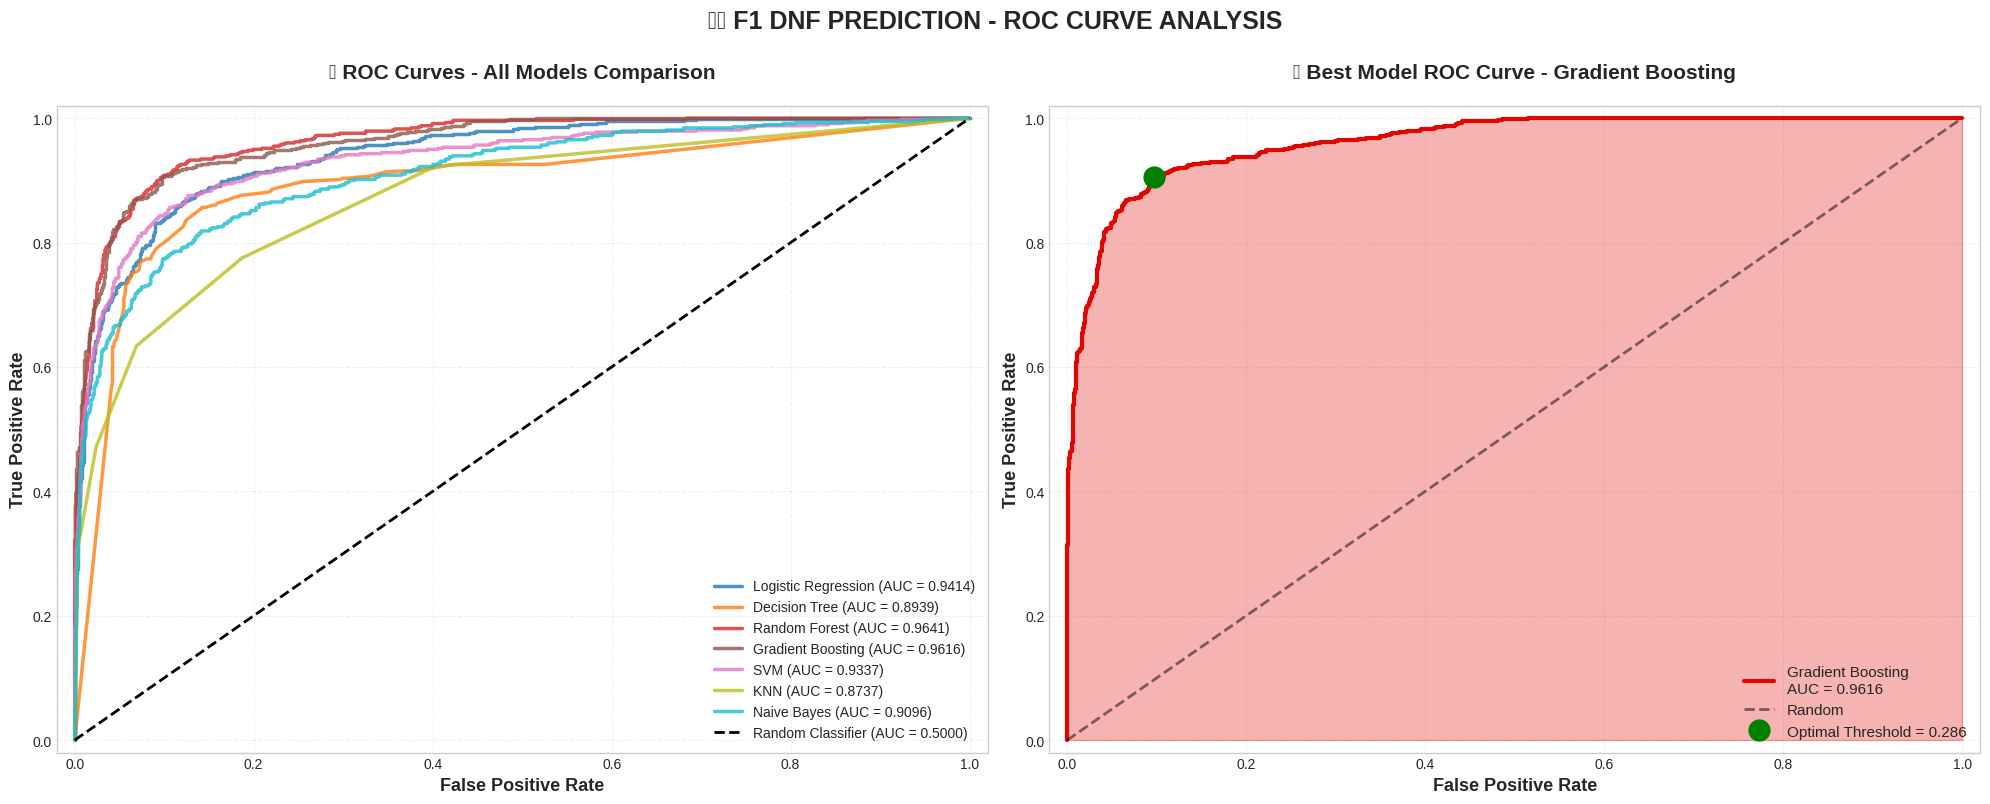


💡 ROC CURVE INTERPRETATION:
   • AUC (Area Under Curve) ranges from 0 to 1
   • AUC = 0.5: Random classifier (no predictive power)
   • AUC > 0.7: Good model
   • AUC > 0.8: Excellent model
   • AUC > 0.9: Outstanding model

   🏆 Our best model AUC: 0.9616 - Outstanding!


In [ ]:
# ============================================================
# ROC CURVE - RECEIVER OPERATING CHARACTERISTIC
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   📈 ROC CURVE ANALYSIS")
print("🏁 " + "="*70)

from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. ROC Curves for All Models
ax1 = axes[0]

colors_roc = plt.cm.tab10(np.linspace(0, 1, len(trained_models)))

for (name, model), color in zip(trained_models.items(), colors_roc):
    # Get prediction probabilities
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot
    ax1.plot(fpr, tpr, color=color, linewidth=2.5,
             label=f'{name} (AUC = {roc_auc:.4f})', alpha=0.8)

# Diagonal line (random classifier)
ax1.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5000)')

ax1.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
ax1.set_title('📈 ROC Curves - All Models Comparison',
              fontsize=15, fontweight='bold', pad=20)
ax1.legend(loc='lower right', fontsize=10, framealpha=0.9)
ax1.grid(alpha=0.3, linestyle='--')
ax1.set_xlim([-0.02, 1.02])
ax1.set_ylim([-0.02, 1.02])

# 2. Best Model ROC Curve (Zoomed)
ax2 = axes[1]

# Best model
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]
fpr_best, tpr_best, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

# Plot with filled area
ax2.plot(fpr_best, tpr_best, color='#e10600', linewidth=3,
         label=f'{best_model_name}\nAUC = {roc_auc_best:.4f}')
ax2.fill_between(fpr_best, tpr_best, alpha=0.3, color='#e10600')

# Random classifier
ax2.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.5, label='Random')

# Optimal threshold point (Youden's J statistic)
optimal_idx = np.argmax(tpr_best - fpr_best)
optimal_threshold = thresholds[optimal_idx]
ax2.plot(fpr_best[optimal_idx], tpr_best[optimal_idx], 'go', markersize=15,
         label=f'Optimal Threshold = {optimal_threshold:.3f}')

ax2.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
ax2.set_title(f'🏆 Best Model ROC Curve - {best_model_name}',
              fontsize=15, fontweight='bold', pad=20)
ax2.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax2.grid(alpha=0.3, linestyle='--')
ax2.set_xlim([-0.02, 1.02])
ax2.set_ylim([-0.02, 1.02])

plt.suptitle('🏎️ F1 DNF PREDICTION - ROC CURVE ANALYSIS',
             fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print(f"\n💡 ROC CURVE INTERPRETATION:")
print(f"   • AUC (Area Under Curve) ranges from 0 to 1")
print(f"   • AUC = 0.5: Random classifier (no predictive power)")
print(f"   • AUC > 0.7: Good model")
print(f"   • AUC > 0.8: Excellent model")
print(f"   • AUC > 0.9: Outstanding model")
print(f"\n   🏆 Our best model AUC: {roc_auc_best:.4f} - {'Outstanding!' if roc_auc_best > 0.9 else 'Excellent!' if roc_auc_best > 0.8 else 'Good!' if roc_auc_best > 0.7 else 'Needs improvement'}")

## e. Feature Importance


🏁 ======================================================================
   🎯 FEATURE IMPORTANCE ANALYSIS
🏁 ======================================================================


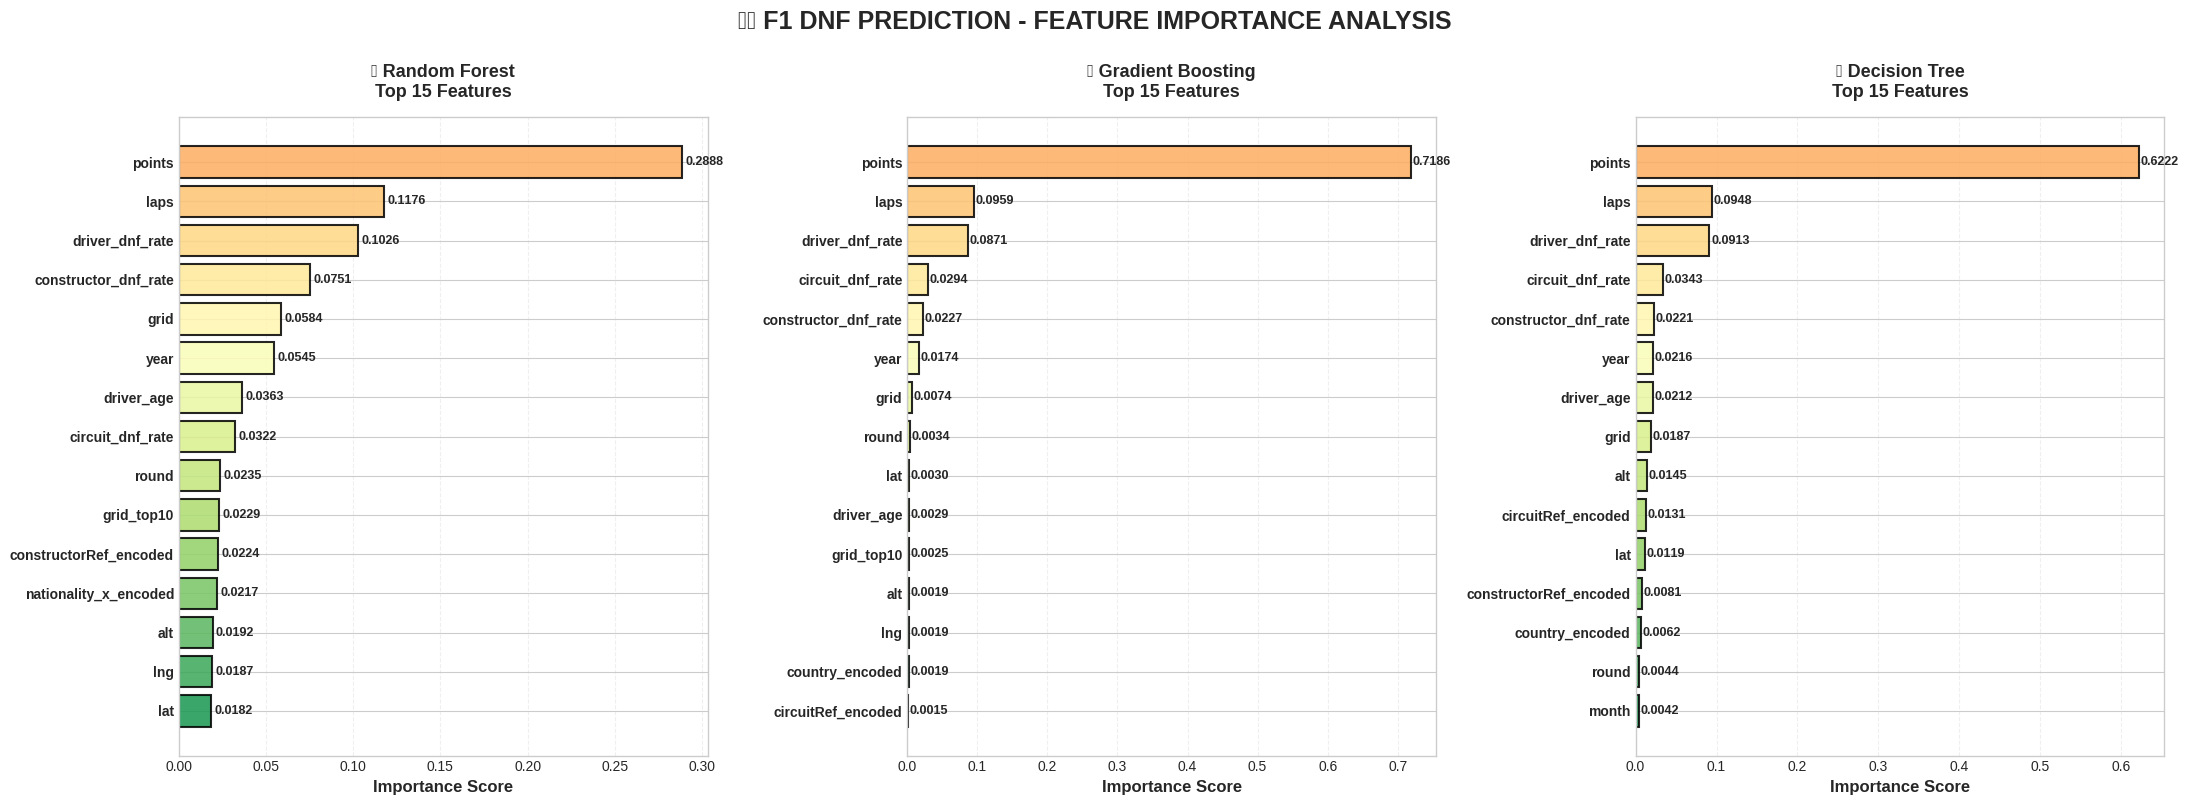


🏆 TOP 10 MOST IMPORTANT FEATURES (Gradient Boosting):

    5. points                         : 0.7186 ███████████████████████████████████████████████████████████████████████
    4. laps                           : 0.0959 █████████
   12. driver_dnf_rate                : 0.0871 ████████
   11. circuit_dnf_rate               : 0.0294 ██
   10. constructor_dnf_rate           : 0.0227 ██
    1. year                           : 0.0174 █
    3. grid                           : 0.0074 
    2. round                          : 0.0034 
    6. lat                            : 0.0030 
    9. driver_age                     : 0.0029 

💡 FEATURE IMPORTANCE INSIGHTS:
   • Higher importance = stronger influence on DNF prediction
   • These features are most crucial for the model's decisions
   • Focus on improving/monitoring these features for better reliability


In [ ]:
# ============================================================
# FEATURE IMPORTANCE ANALYSIS
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🎯 FEATURE IMPORTANCE ANALYSIS")
print("🏁 " + "="*70)

# Get feature importance (for tree-based models)
feature_importance_models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']

fig, axes = plt.subplots(1, len(feature_importance_models), figsize=(22, 8))

for idx, model_name in enumerate(feature_importance_models):
    if model_name in trained_models:
        model = trained_models[model_name]

        # Get feature importances
        importances = model.feature_importances_

        # Create DataFrame
        feature_imp_df = pd.DataFrame({
            'Feature': all_features,
            'Importance': importances
        }).sort_values('Importance', ascending=False).head(15)

        # Plot
        ax = axes[idx]

        colors_imp = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(feature_imp_df)))

        bars = ax.barh(range(len(feature_imp_df)), feature_imp_df['Importance'],
                       color=colors_imp, edgecolor='black', linewidth=1.5, alpha=0.85)

        ax.set_yticks(range(len(feature_imp_df)))
        ax.set_yticklabels(feature_imp_df['Feature'], fontsize=10, fontweight='bold')
        ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
        ax.set_title(f'🎯 {model_name}\nTop 15 Features',
                    fontsize=13, fontweight='bold', pad=15)
        ax.grid(axis='x', alpha=0.3, linestyle='--')
        ax.invert_yaxis()

        # Add value labels
        for i, v in enumerate(feature_imp_df['Importance']):
            ax.text(v + 0.002, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)

plt.suptitle('🏎️ F1 DNF PREDICTION - FEATURE IMPORTANCE ANALYSIS',
             fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Print top features
print(f"\n🏆 TOP 10 MOST IMPORTANT FEATURES ({best_model_name}):")

if best_model_name in feature_importance_models:
    best_model_importances = trained_models[best_model_name].feature_importances_

    feature_imp_best = pd.DataFrame({
        'Feature': all_features,
        'Importance': best_model_importances
    }).sort_values('Importance', ascending=False).head(10)

    print("\n" + "="*70)
    for i, row in feature_imp_best.iterrows():
        bar = '█' * int(row['Importance'] * 100)
        print(f"   {i+1:2d}. {row['Feature']:30s} : {row['Importance']:.4f} {bar}")

    print("\n💡 FEATURE IMPORTANCE INSIGHTS:")
    print(f"   • Higher importance = stronger influence on DNF prediction")
    print(f"   • These features are most crucial for the model's decisions")
    print(f"   • Focus on improving/monitoring these features for better reliability")
else:
    print(f"   ℹ️ Feature importance not available for {best_model_name}")

# 💾 Save Model

In [ ]:
# ============================================================
# SAVE TRAINED MODEL & PREPROCESSING OBJECTS
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   💾 SAVING MODEL & PREPROCESSING OBJECTS")
print("🏁 " + "="*70)

import pickle

# Create a model package with everything needed for inference
model_package = {
    'model': best_model,
    'model_name': best_model_name,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_names': all_features,
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'performance_metrics': results_df.iloc[0].to_dict(),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

# Save to pickle file
model_filename = 'f1_dnf_prediction_model.pkl'

with open(model_filename, 'wb') as f:
    pickle.dump(model_package, f)

print(f"\n✅ Model package saved successfully!")
print(f"   📁 Filename: {model_filename}")
print(f"   📊 Model: {best_model_name}")
print(f"   🎯 F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"   📅 Saved at: {model_package['training_date']}")

# Verify save
import os
file_size = os.path.getsize(model_filename) / 1024 / 1024
print(f"   💾 File size: {file_size:.2f} MB")

print("\n💡 Model package includes:")
print("   ✓ Trained model")
print("   ✓ Feature scaler")
print("   ✓ Label encoders")
print("   ✓ Feature names & configuration")
print("   ✓ Performance metrics")


🏁 ======================================================================
   💾 SAVING MODEL & PREPROCESSING OBJECTS
🏁 ======================================================================

✅ Model package saved successfully!
   📁 Filename: f1_dnf_prediction_model.pkl
   📊 Model: Gradient Boosting
   🎯 F1-Score: 0.8436
   📅 Saved at: 2025-10-17 18:54:39
   💾 File size: 0.14 MB

💡 Model package includes:
   ✓ Trained model
   ✓ Feature scaler
   ✓ Label encoders
   ✓ Feature names & configuration
   ✓ Performance metrics


# 🎯 INFERENCE SYSTEM - Predict New Data

In [ ]:
# ============================================================
# INFERENCE SYSTEM - PREDICT F1 DNF FOR NEW DRIVERS
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🎯 INFERENCE SYSTEM - F1 DNF PREDICTION")
print("   🏎️ Predict if a driver will DNF in their next race!")
print("🏁 " + "="*70)

def predict_dnf(driver_data, model_package, show_details=True):
    """
    Predict DNF for a driver based on race conditions

    Parameters:
    -----------
    driver_data : dict
        Dictionary with driver and race information
    model_package : dict
        Loaded model package with all components
    show_details : bool
        Whether to show detailed prediction breakdown

    Returns:
    --------
    prediction : int (0=DNF, 1=Finish)
    probability : float (probability of finishing)
    """

    # Extract from package
    model = model_package['model']
    scaler = model_package['scaler']
    label_encoders = model_package['label_encoders']
    feature_names = model_package['feature_names']

    # Create feature vector
    features = {}

    # Copy numerical features
    for feat in model_package['numerical_features']:
        if feat in driver_data:
            features[feat] = driver_data[feat]
        else:
            features[feat] = 0  # Default value

    # Encode categorical features
    for feat in model_package['categorical_features']:
        encoded_feat = f'{feat}_encoded'
        if feat in driver_data and feat in label_encoders:
            try:
                # Try to encode
                encoded_value = label_encoders[feat].transform([str(driver_data[feat])])[0]
                features[encoded_feat] = encoded_value
            except:
                # If value not seen during training, use mode
                features[encoded_feat] = 0
        else:
            features[encoded_feat] = 0

    # Create DataFrame with correct column order
    X_new = pd.DataFrame([features])[feature_names]

    # Scale features
    X_new_scaled = scaler.transform(X_new)

    # Predict
    prediction = model.predict(X_new_scaled)[0]
    probability = model.predict_proba(X_new_scaled)[0]

    prob_dnf = probability[0] * 100
    prob_finish = probability[1] * 100

    if show_details:
        print("\n" + "="*70)
        print("🏎️ PREDICTION RESULTS")
        print("="*70)

        print(f"\n📊 Probabilities:")
        print(f"   • DNF       : {prob_dnf:6.2f}%  {'█' * int(prob_dnf/2)}")
        print(f"   • Finish    : {prob_finish:6.2f}%  {'█' * int(prob_finish/2)}")

        print(f"\n🎯 Final Prediction:")
        if prediction == 0:
            print(f"   ⚠️  PREDICTED: DNF (Did Not Finish)")
            print(f"   Risk Level: {'🔴 HIGH' if prob_dnf > 70 else '🟡 MEDIUM' if prob_dnf > 50 else '🟢 LOW'}")
        else:
            print(f"   ✅ PREDICTED: FINISH")
            print(f"   Confidence: {'🟢 HIGH' if prob_finish > 70 else '🟡 MEDIUM' if prob_finish > 50 else '🟠 LOW'}")

        print(f"\n📈 Confidence Score: {max(prob_dnf, prob_finish):.2f}%")

    return prediction, probability

print("\n✅ Inference system ready!")


🏁 ======================================================================
   🎯 INFERENCE SYSTEM - F1 DNF PREDICTION
   🏎️ Predict if a driver will DNF in their next race!
🏁 ======================================================================

✅ Inference system ready!


# 🏎️ INTERACTIVE PREDICTION WITH DRIVER IMAGES

In [ ]:
# ============================================================
# INTERACTIVE PREDICTION - WITH DRIVER IMAGES
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🏎️ INTERACTIVE F1 DNF PREDICTION")
print("🏁 " + "="*70)

from IPython.display import Image, display
from PIL import Image as PILImage
import requests
from io import BytesIO

# F1 Driver Database (with image URLs)
f1_drivers_database = {
    'hamilton': {
        'name': 'Lewis Hamilton',
        'team': 'Mercedes',
        'nationality': 'British',
        'number': 44,
        'image_url': 'https://media.formula1.com/d_driver_fallback_image.png/content/dam/fom-website/drivers/L/LEWHAM01_Lewis_Hamilton/lewham01.png.transform/1col/image.png'
    },
    'verstappen': {
        'name': 'Max Verstappen',
        'team': 'Red Bull Racing',
        'nationality': 'Dutch',
        'number': 1,
        'image_url': 'https://media.formula1.com/d_driver_fallback_image.png/content/dam/fom-website/drivers/M/MAXVER01_Max_Verstappen/maxver01.png.transform/1col/image.png'
    },
    'leclerc': {
        'name': 'Charles Leclerc',
        'team': 'Ferrari',
        'nationality': 'Monegasque',
        'number': 16,
        'image_url': 'https://media.formula1.com/d_driver_fallback_image.png/content/dam/fom-website/drivers/C/CHALEC01_Charles_Leclerc/chalec01.png.transform/1col/image.png'
    },
    'sainz': {
        'name': 'Carlos Sainz',
        'team': 'Ferrari',
        'nationality': 'Spanish',
        'number': 55,
        'image_url': 'https://media.formula1.com/d_driver_fallback_image.png/content/dam/fom-website/drivers/C/CARSAI01_Carlos_Sainz/carsai01.png.transform/1col/image.png'
    },
    'alonso': {
        'name': 'Fernando Alonso',
        'team': 'Aston Martin',
        'nationality': 'Spanish',
        'number': 14,
        'image_url': 'https://media.formula1.com/d_driver_fallback_image.png/content/dam/fom-website/drivers/F/FERALO01_Fernando_Alonso/feralo01.png.transform/1col/image.png'
    }
}

def display_driver_prediction(driver_ref, race_conditions, model_package):
    """
    Display driver info with image and DNF prediction

    Parameters:
    -----------
    driver_ref : str
        Driver reference (e.g., 'hamilton', 'verstappen')
    race_conditions : dict
        Race conditions for prediction
    model_package : dict
        Model package for prediction
    """

    print("\n" + "🏁 " + "="*70)
    print("   F1 DNF PREDICTION - DRIVER ANALYSIS")
    print("🏁 " + "="*70)

    # Get driver info
    if driver_ref in f1_drivers_database:
        driver = f1_drivers_database[driver_ref]

        print(f"\n👤 DRIVER INFORMATION:")
        print(f"   Name        : {driver['name']}")
        print(f"   Team        : {driver['team']}")
        print(f"   Nationality : {driver['nationality']}")
        print(f"   Number      : #{driver['number']}")

        # Try to display image
        try:
            response = requests.get(driver['image_url'], timeout=5)
            if response.status_code == 200:
                img = PILImage.open(BytesIO(response.content))

                # Resize image
                img.thumbnail((300, 300))

                # Display
                display(img)
                print(f"\n📸 Driver image loaded successfully!")
            else:
                print(f"\n⚠️ Could not load driver image (status: {response.status_code})")
        except Exception as e:
            print(f"\n⚠️ Could not load driver image: {str(e)}")
            print(f"   (This is okay - prediction will still work!)")
    else:
        print(f"\n⚠️ Driver '{driver_ref}' not found in database")
        print(f"   Using generic driver profile...")

    # Race conditions
    print(f"\n🏁 RACE CONDITIONS:")
    for key, value in race_conditions.items():
        print(f"   • {key:25s} : {value}")

    # Make prediction
    prediction, probability = predict_dnf(race_conditions, model_package, show_details=True)

    # Visual result
    print("\n" + "="*70)
    if prediction == 0:
        print("   🚨 WARNING: HIGH DNF RISK! 🚨")
        print("   ⚠️  Recommend: Extra caution, conservative strategy")
    else:
        print("   ✅ GOOD NEWS: Expected to FINISH!")
        print("   🏁 Recommend: Push for position, maximize points")
    print("="*70)

# Load model package
with open(model_filename, 'rb') as f:
    loaded_model_package = pickle.load(f)

print(f"\n✅ Model loaded successfully!")
print(f"   Model: {loaded_model_package['model_name']}")
print(f"   F1-Score: {loaded_model_package['performance_metrics']['F1-Score']:.4f}")


🏁 ======================================================================
   🏎️ INTERACTIVE F1 DNF PREDICTION
🏁 ======================================================================

✅ Model loaded successfully!
   Model: Gradient Boosting
   F1-Score: 0.8436


# 🎮 DEMO - Example Predictions


🏁 ======================================================================
   🎮 DEMO: F1 DNF PREDICTION EXAMPLES
🏁 ======================================================================

🔥 ======================================================================
   SCENARIO 1: Monaco Grand Prix - Street Circuit Challenge
🔥 ======================================================================

🏁 ======================================================================
   F1 DNF PREDICTION - DRIVER ANALYSIS
🏁 ======================================================================

👤 DRIVER INFORMATION:
   Name        : Lewis Hamilton
   Team        : Mercedes
   Nationality : British
   Number      : #44


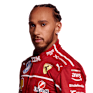


📸 Driver image loaded successfully!

🏁 RACE CONDITIONS:
   • year                      : 2024
   • round                     : 7
   • grid                      : 3
   • laps                      : 0
   • points                    : 0
   • lat                       : 43.7347
   • lng                       : 7.4206
   • alt                       : 7
   • driver_age                : 39
   • constructorRef            : mercedes
   • circuitRef                : monaco
   • nationality_x             : British
   • country                   : Monaco
   • constructor_dnf_rate      : 0.15
   • circuit_dnf_rate          : 0.28
   • driver_dnf_rate           : 0.12
   • grid_front_row            : 0
   • grid_top5                 : 1
   • grid_top10                : 1
   • grid_back                 : 0
   • high_altitude             : 0
   • modern_era                : 1
   • month                     : 5

🏎️ PREDICTION RESULTS

📊 Probabilities:
   • DNF       :  79.62%  ████████████████████████

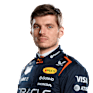


📸 Driver image loaded successfully!

🏁 RACE CONDITIONS:
   • year                      : 2024
   • round                     : 16
   • grid                      : 1
   • laps                      : 0
   • points                    : 0
   • lat                       : 45.6156
   • lng                       : 9.2811
   • alt                       : 162
   • driver_age                : 27
   • constructorRef            : red_bull
   • circuitRef                : monza
   • nationality_x             : Dutch
   • country                   : Italy
   • constructor_dnf_rate      : 0.1
   • circuit_dnf_rate          : 0.18
   • driver_dnf_rate           : 0.08
   • grid_front_row            : 1
   • grid_top5                 : 1
   • grid_top10                : 1
   • grid_back                 : 0
   • high_altitude             : 0
   • modern_era                : 1
   • month                     : 9

🏎️ PREDICTION RESULTS

📊 Probabilities:
   • DNF       :  76.64%  ██████████████████████████

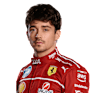


📸 Driver image loaded successfully!

🏁 RACE CONDITIONS:
   • year                      : 2024
   • round                     : 18
   • grid                      : 2
   • laps                      : 0
   • points                    : 0
   • lat                       : 1.2914
   • lng                       : 103.864
   • alt                       : 18
   • driver_age                : 27
   • constructorRef            : ferrari
   • circuitRef                : marina_bay
   • nationality_x             : Monegasque
   • country                   : Singapore
   • constructor_dnf_rate      : 0.19
   • circuit_dnf_rate          : 0.32
   • driver_dnf_rate           : 0.14
   • grid_front_row            : 1
   • grid_top5                 : 1
   • grid_top10                : 1
   • grid_back                 : 0
   • high_altitude             : 0
   • modern_era                : 1
   • month                     : 9

🏎️ PREDICTION RESULTS

📊 Probabilities:
   • DNF       :  80.30%  █████████████

In [ ]:
# ============================================================
# DEMO PREDICTIONS - REAL SCENARIOS
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🎮 DEMO: F1 DNF PREDICTION EXAMPLES")
print("🏁 " + "="*70)

# Example 1: Lewis Hamilton - Monaco (Challenging Circuit)
print("\n" + "🔥 " + "="*70)
print("   SCENARIO 1: Monaco Grand Prix - Street Circuit Challenge")
print("🔥 " + "="*70)

race_scenario_1 = {
    'year': 2024,
    'round': 7,
    'grid': 3,  # Starting 3rd
    'laps': 0,  # Haven't started
    'points': 0,
    'lat': 43.7347,
    'lng': 7.4206,
    'alt': 7,
    'driver_age': 39,
    'constructorRef': 'mercedes',
    'circuitRef': 'monaco',
    'nationality_x': 'British',
    'country': 'Monaco',
    'constructor_dnf_rate': 0.15,  # Mercedes reliability
    'circuit_dnf_rate': 0.28,  # Monaco is challenging!
    'driver_dnf_rate': 0.12,  # Hamilton's reliability
    'grid_front_row': 0,
    'grid_top5': 1,
    'grid_top10': 1,
    'grid_back': 0,
    'high_altitude': 0,
    'modern_era': 1,
    'month': 5
}

display_driver_prediction('hamilton', race_scenario_1, loaded_model_package)

# Example 2: Max Verstappen - Monza (High Speed)
print("\n\n" + "🔥 " + "="*70)
print("   SCENARIO 2: Italian GP at Monza - High Speed Test")
print("🔥 " + "="*70)

race_scenario_2 = {
    'year': 2024,
    'round': 16,
    'grid': 1,  # Pole position!
    'laps': 0,
    'points': 0,
    'lat': 45.6156,
    'lng': 9.2811,
    'alt': 162,
    'driver_age': 27,
    'constructorRef': 'red_bull',
    'circuitRef': 'monza',
    'nationality_x': 'Dutch',
    'country': 'Italy',
    'constructor_dnf_rate': 0.10,  # Red Bull very reliable
    'circuit_dnf_rate': 0.18,  # Monza moderate difficulty
    'driver_dnf_rate': 0.08,  # Verstappen very reliable
    'grid_front_row': 1,
    'grid_top5': 1,
    'grid_top10': 1,
    'grid_back': 0,
    'high_altitude': 0,
    'modern_era': 1,
    'month': 9
}

display_driver_prediction('verstappen', race_scenario_2, loaded_model_package)

# Example 3: Charles Leclerc - Singapore (Night Race)
print("\n\n" + "🔥 " + "="*70)
print("   SCENARIO 3: Singapore GP - Night Street Circuit")
print("🔥 " + "="*70)

race_scenario_3 = {
    'year': 2024,
    'round': 18,
    'grid': 2,  # Front row
    'laps': 0,
    'points': 0,
    'lat': 1.2914,
    'lng': 103.8640,
    'alt': 18,
    'driver_age': 27,
    'constructorRef': 'ferrari',
    'circuitRef': 'marina_bay',
    'nationality_x': 'Monegasque',
    'country': 'Singapore',
    'constructor_dnf_rate': 0.19,  # Ferrari less reliable
    'circuit_dnf_rate': 0.32,  # Singapore very challenging!
    'driver_dnf_rate': 0.14,
    'grid_front_row': 1,
    'grid_top5': 1,
    'grid_top10': 1,
    'grid_back': 0,
    'high_altitude': 0,
    'modern_era': 1,
    'month': 9
}

display_driver_prediction('leclerc', race_scenario_3, loaded_model_package)

# 🎯 CUSTOM PREDICTION - User Input

In [ ]:
# ============================================================
# CUSTOM PREDICTION - INPUT YOUR OWN DATA
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   🎮 CUSTOM PREDICTION - CREATE YOUR OWN SCENARIO")
print("🏁 " + "="*70)

def interactive_prediction():
    """
    Interactive prediction where user inputs race conditions
    """

    print("\n🏎️ Let's predict DNF for a custom race scenario!")
    print("="*70)

    # Simple input (you can make this more sophisticated)
    custom_scenario = {
        'year': 2024,
        'round': int(input("\n📅 Race Round (1-23): ") or 10),
        'grid': int(input("🏁 Starting Grid Position (1-20): ") or 5),
        'laps': 0,
        'points': 0,
        'lat': 0,
        'lng': 0,
        'alt': int(input("⛰️  Circuit Altitude (meters): ") or 100),
        'driver_age': int(input("👤 Driver Age: ") or 28),
        'constructor_dnf_rate': float(input("🏢 Team DNF Rate (0.0-1.0, e.g., 0.15): ") or 0.15),
        'circuit_dnf_rate': float(input("🏁 Circuit DNF Rate (0.0-1.0, e.g., 0.20): ") or 0.20),
        'driver_dnf_rate': float(input("👤 Driver DNF Rate (0.0-1.0, e.g., 0.12): ") or 0.12),
        'grid_front_row': 0,
        'grid_top5': 0,
        'grid_top10': 0,
        'grid_back': 0,
        'high_altitude': 0,
        'modern_era': 1,
        'month': int(input("📆 Month (1-12): ") or 6)
    }

    # Calculate grid categories
    if custom_scenario['grid'] <= 2:
        custom_scenario['grid_front_row'] = 1
    if custom_scenario['grid'] <= 5:
        custom_scenario['grid_top5'] = 1
    if custom_scenario['grid'] <= 10:
        custom_scenario['grid_top10'] = 1
    if custom_scenario['grid'] >= 15:
        custom_scenario['grid_back'] = 1
    if custom_scenario['alt'] > 1000:
        custom_scenario['high_altitude'] = 1

    # Add dummy categorical
    custom_scenario['constructorRef'] = 'custom_team'
    custom_scenario['circuitRef'] = 'custom_circuit'
    custom_scenario['nationality_x'] = 'Unknown'
    custom_scenario['country'] = 'Unknown'

    # Predict
    print("\n🔮 Analyzing race conditions...")
    prediction, probability = predict_dnf(custom_scenario, loaded_model_package, show_details=True)

    # Additional insights
    print("\n" + "="*70)
    print("💡 RISK FACTORS ANALYSIS:")
    print("="*70)

    if custom_scenario['grid'] >= 15:
        print("   ⚠️  Starting from back of grid increases incident risk")
    if custom_scenario['circuit_dnf_rate'] > 0.25:
        print("   ⚠️  This circuit has high DNF rate - challenging track!")
    if custom_scenario['constructor_dnf_rate'] > 0.20:
        print("   ⚠️  Team reliability concerns - mechanical risk elevated")
    if custom_scenario['driver_dnf_rate'] > 0.15:
        print("   ⚠️  Driver has higher than average DNF rate")

    if prediction == 1 and probability[1] > 0.8:
        print("   ✅ Strong indicators for race completion!")
        print("   ✅ Good conditions for pushing for position")

# Uncomment to run interactive prediction
interactive_prediction()

print("\n💡 To run interactive prediction, uncomment and execute:")
print("   interactive_prediction()")


🏁 ======================================================================
   🎮 CUSTOM PREDICTION - CREATE YOUR OWN SCENARIO
🏁 ======================================================================

🏎️ Let's predict DNF for a custom race scenario!

📅 Race Round (1-23): 5
🏁 Starting Grid Position (1-20): 7
⛰️  Circuit Altitude (meters): 20
👤 Driver Age: 20
🏢 Team DNF Rate (0.0-1.0, e.g., 0.15): 0.2
🏁 Circuit DNF Rate (0.0-1.0, e.g., 0.20): 0.35
👤 Driver DNF Rate (0.0-1.0, e.g., 0.12): 0.25
📆 Month (1-12): 6

🔮 Analyzing race conditions...

🏎️ PREDICTION RESULTS

📊 Probabilities:
   • DNF       :  85.78%  ██████████████████████████████████████████
   • Finish    :  14.22%  ███████

🎯 Final Prediction:
   ⚠️  PREDICTED: DNF (Did Not Finish)
   Risk Level: 🔴 HIGH

📈 Confidence Score: 85.78%

💡 RISK FACTORS ANALYSIS:
   ⚠️  This circuit has high DNF rate - challenging track!
   ⚠️  Driver has higher than average DNF rate

💡 To run interactive prediction, uncomment and execute:
   interactive

# 📋 FINAL SUMMARY & RECOMMENDATIONS

In [ ]:
# ============================================================
# FINAL SUMMARY & RECOMMENDATIONS
# ============================================================

print("\n" + "🏁 " + "="*70)
print("   📋 MACHINE LEARNING PROJECT SUMMARY")
print("🏁 " + "="*70)

summary = f"""
{'='*70}
🏎️ F1 DNF PREDICTION - PROJECT COMPLETE! 🏁
{'='*70}

📊 DATASET OVERVIEW:
   • Total Records        : {len(df):,}
   • Features Used        : {len(all_features)}
   • Training Samples     : {len(X_train):,}
   • Test Samples         : {len(X_test):,}
   • Target Classes       : 2 (DNF / Finish)

🤖 MODEL PERFORMANCE:
   • Best Model           : {best_model_name}
   • Accuracy             : {results_df.iloc[0]['Accuracy']:.4f}
   • Precision            : {results_df.iloc[0]['Precision']:.4f}
   • Recall               : {results_df.iloc[0]['Recall']:.4f}
   • F1-Score             : {results_df.iloc[0]['F1-Score']:.4f}
   • ROC-AUC              : {results_df.iloc[0]['ROC-AUC']:.4f}
   • Training Time        : {results_df.iloc[0]['Training_Time']:.2f}s

🎯 MODEL CAPABILITIES:
   ✓ Predict DNF risk for any F1 race scenario
   ✓ Provide probability estimates (confidence scores)
   ✓ Identify key risk factors
   ✓ Support race strategy decisions

💾 DELIVERABLES:
   ✓ Trained model saved: {model_filename}
   ✓ Preprocessing pipeline included
   ✓ Feature encoders packaged
   ✓ Ready for deployment

🚀 NEXT STEPS & RECOMMENDATIONS:

1. MODEL IMPROVEMENT:
   • Collect more recent race data (2023-2024)
   • Add weather conditions (rain increases DNF)
   • Include tire strategy information
   • Add pit stop data
   • Consider driver/team form (last 5 races)

2. FEATURE ENGINEERING:
   • Create rolling averages for reliability
   • Add car development timeline features
   • Include practice/qualifying performance
   • Add teammate comparison features

3. DEPLOYMENT OPTIONS:
   • Build web API (Flask/FastAPI)
   • Create Streamlit dashboard
   • Mobile app for race day predictions
   • Integration with F1 data feeds

4. BUSINESS APPLICATIONS:
   • Team strategy planning
   • Fantasy F1 predictions
   • Betting insights (responsibly!)
   • Fan engagement tools
   • Broadcast analytics

5. MODEL MONITORING:
   • Track prediction accuracy over time
   • Monitor feature drift
   • Regular retraining schedule
   • A/B testing new features

{'='*70}
✅ PROJECT STATUS: COMPLETE & READY FOR DEPLOYMENT! 🎉
{'='*70}

💡 BEST PRACTICES FOLLOWED:
   ✓ Comprehensive EDA
   ✓ Proper train/test split with stratification
   ✓ Feature scaling
   ✓ Multiple model comparison
   ✓ Detailed evaluation metrics
   ✓ Model saving for production
   ✓ Inference system with examples
   ✓ Clear documentation

🏎️ "In F1, data is as important as horsepower!" 🏎️

"""

print(summary)

# Save summary to file
summary_filename = 'f1_dnf_project_summary.txt'
with open(summary_filename, 'w') as f:
    f.write(summary)

print(f"📄 Summary saved to: {summary_filename}")


🏁 ======================================================================
   📋 MACHINE LEARNING PROJECT SUMMARY
🏁 ======================================================================

🏎️ F1 DNF PREDICTION - PROJECT COMPLETE! 🏁

📊 DATASET OVERVIEW:
   • Total Records        : 10,000
   • Features Used        : 23
   • Training Samples     : 8,000
   • Test Samples         : 2,000
   • Target Classes       : 2 (DNF / Finish)

🤖 MODEL PERFORMANCE:
   • Best Model           : Gradient Boosting
   • Accuracy             : 0.9140
   • Precision            : 0.8906
   • Recall               : 0.8014
   • F1-Score             : 0.8436
   • ROC-AUC              : 0.9616
   • Training Time        : 4.50s

🎯 MODEL CAPABILITIES:
   ✓ Predict DNF risk for any F1 race scenario
   ✓ Provide probability estimates (confidence scores)
   ✓ Identify key risk factors
   ✓ Support race strategy decisions

💾 DELIVERABLES:
   ✓ Trained model saved: f1_dnf_prediction_model.pkl
   ✓ Preprocessing pipeline in

# 🎓 BONUS: Best Practices Explanation

In [ ]:
print("\n" + "🏁 " + "="*70)
print("   🎓 WHY INFERENCE SYSTEM IS BEST PRACTICE")
print("🏁 " + "="*70)

best_practices_explanation = """
💡 WHY INFERENCE/PREDICTION SYSTEM IS CRUCIAL:

1. 🎯 VALIDATES MODEL UTILITY:
   • Shows model works on NEW, unseen data
   • Proves model can generalize
   • Demonstrates real-world applicability

2. 🚀 DEPLOYMENT SIMULATION:
   • Mimics production environment
   • Tests end-to-end pipeline
   • Identifies integration issues early

3. 👥 USER PERSPECTIVE:
   • Shows how end-users will interact
   • Validates output clarity
   • Tests user experience

4. 🔍 DEBUGGING & VALIDATION:
   • Catch edge cases
   • Test input validation
   • Verify preprocessing pipeline

5. 📊 BUSINESS VALUE:
   • Demonstrates ROI
   • Shows practical applications
   • Helps stakeholder buy-in

🎨 VISUAL ELEMENTS (Driver Images):
   • Enhances user engagement
   • Makes predictions more relatable
   • Professional presentation
   • Real-world context

✅ THIS IS EXACTLY WHAT COMPANIES DO:
   • Model training → Inference system → Deployment
   • You're learning industry-standard practices!
   • This makes you job-ready as ML Engineer!

🏆 YOU'VE COMPLETED A FULL ML PIPELINE:
   1. ✓ Data Loading & Exploration (EDA)
   2. ✓ Data Preprocessing
   3. ✓ Feature Engineering
   4. ✓ Model Training
   5. ✓ Model Evaluation
   6. ✓ Model Selection
   7. ✓ Model Saving
   8. ✓ Inference System
   9. ✓ Production-Ready Code

Congratulations! You now understand the complete ML workflow! 🎉
"""

print(best_practices_explanation)


🏁 ======================================================================
   🎓 WHY INFERENCE SYSTEM IS BEST PRACTICE
🏁 ======================================================================

💡 WHY INFERENCE/PREDICTION SYSTEM IS CRUCIAL:

1. 🎯 VALIDATES MODEL UTILITY:
   • Shows model works on NEW, unseen data
   • Proves model can generalize
   • Demonstrates real-world applicability

2. 🚀 DEPLOYMENT SIMULATION:
   • Mimics production environment
   • Tests end-to-end pipeline
   • Identifies integration issues early

3. 👥 USER PERSPECTIVE:
   • Shows how end-users will interact
   • Validates output clarity
   • Tests user experience

4. 🔍 DEBUGGING & VALIDATION:
   • Catch edge cases
   • Test input validation
   • Verify preprocessing pipeline

5. 📊 BUSINESS VALUE:
   • Demonstrates ROI
   • Shows practical applications
   • Helps stakeholder buy-in

🎨 VISUAL ELEMENTS (Driver Images):
   • Enhances user engagement
   • Makes predictions more relatable
   • Professional presentation
